In [1]:
cd C:\Users\abc09\Desktop\master\蒙特婁理工大學實習\Poly_Project

C:\Users\abc09\Desktop\master\蒙特婁理工大學實習\Poly_Project


In [48]:
# === 1. 安裝需要的套件 ===
!pip install torch torchvision ipywidgets


# === 2. 匯入套件 ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import models

# === 3. Dataset (CIFAR-10) ===
transform = transforms.Compose([
    transforms.ToTensor(),
])

cifar10_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

CIFAR10_CLASSES = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# === 4. Normalize / Denormalize (ImageNet stats for pretrained models) ===
__imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                   'std': [0.229, 0.224, 0.225]}

def normalize(img):
    mean = torch.tensor(__imagenet_stats['mean']).view(3,1,1)
    std = torch.tensor(__imagenet_stats['std']).view(3,1,1)
    return (img - mean) / std

def tensor_to_img(t):
    t = t.cpu().detach().numpy()
    if t.ndim == 3:
        t = np.transpose(t, (1, 2, 0))
    return np.clip(t, 0, 1)


# === 5. 載入模型 (用預訓練 ResNet18 for demo) ===
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.__dict__["resnet_binary"]
model_config = {'input_size': 32, 'dataset': "cifar10"}
model = model(**model_config)
checkpoint_bin = torch.load(
    "C:/Users/abc09/Desktop/master/蒙特婁理工大學實習/Poly_Project/model_best_cifar10_bin_w_bn.pth.tar"
)
model.load_state_dict(checkpoint_bin['state_dict'])
model.eval()
model.to(device)

# === 6. 抓取 activations ===
def get_activations(model, x):
    activations = {}
    activations_inp = {}
    hooks = []

    def save_output(name):
        def hook(module, inp, out):
            activations[name] = out.detach().cpu()
            activations_inp[name] = inp[0].detach().cpu()
        return hook

    for name, module in model.named_modules():
        if isinstance(module, (nn.Hardtanh)):
            hooks.append(module.register_forward_hook(save_output(name)))
        if name == "bn3":
            hooks.append(module.register_forward_hook(save_output(name)))
    with torch.no_grad():
        _ = model(x)

    for h in hooks:
        h.remove()

    return activations, activations_inp

# === 7. baseline (挑一張測試圖) ===
img_raw, label = cifar10_test[123]
x_orig = normalize(img_raw).unsqueeze(0).to(device)

acts_orig, acts_orig_inp = get_activations(model, x_orig)

layer_names = list(acts_orig.keys())
layer_names_inp = list(acts_orig_inp.keys())

print(f"原始圖標籤: {CIFAR10_CLASSES[label]}")


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\abc09\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


找不到檔案 - C:\Users\abc09\AppData\Local\Temp\doskey-macros.txt
Defaulting to user installation because normal site-packages is not writeable
原始圖標籤: deer


In [37]:
print(layer_names)

['tanh1', 'layer1.0.tanh1', 'layer1.0.tanh2', 'layer1.1.tanh1', 'layer1.1.tanh2', 'layer2.0.tanh1', 'layer2.0.tanh2', 'layer2.1.tanh1', 'layer2.1.tanh2', 'layer3.0.tanh1', 'layer3.0.tanh2', 'layer3.1.tanh1', 'tanh2', 'bn3']


In [ ]:
## BNN analyze

In [8]:
import ipywidgets as widgets
from IPython.display import display

# === 2. 匯入套件 ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import models

# === 3. Dataset (CIFAR-10) ===
transform = transforms.Compose([
    transforms.ToTensor(),
])

cifar10_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

CIFAR10_CLASSES = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]




# === 4. Normalize / Denormalize (ImageNet stats for pretrained models) ===
__imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                   'std': [0.229, 0.224, 0.225]}

def normalize(img):
    mean = torch.tensor(__imagenet_stats['mean']).view(3,1,1)
    std = torch.tensor(__imagenet_stats['std']).view(3,1,1)
    return (img - mean) / std

def tensor_to_img(t):
    t = t.cpu().detach().numpy()
    if t.ndim == 3:
        t = np.transpose(t, (1, 2, 0))
    return np.clip(t, 0, 1)


# === 5. 載入模型 (用預訓練 ResNet18 for demo) ===
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.__dict__["resnet_binary"]
model_config = {'input_size': 32, 'dataset': "cifar10"}
model = model(**model_config)
checkpoint_bin = torch.load(
    "C:/Users/abc09/Desktop/master/蒙特婁理工大學實習/Poly_Project/model_best_cifar10_bin_w_bn.pth.tar"
)
model.load_state_dict(checkpoint_bin['state_dict'])
model.eval()
model.to(device)

# === 6. 抓取 activations ===
def get_activations(model, x):
    activations = {}
    activations_inp = {}
    hooks = []

    def save_output(name):
        def hook(module, inp, out):
            activations[name] = out.detach().cpu()
            activations_inp[name] = inp[0].detach().cpu()
        return hook

    for name, module in model.named_modules():
        if isinstance(module, (nn.Hardtanh)):
            hooks.append(module.register_forward_hook(save_output(name)))
        if name == "bn3":
            hooks.append(module.register_forward_hook(save_output(name)))
    with torch.no_grad():
        _ = model(x)

    for h in hooks:
        h.remove()

    return activations, activations_inp


# === 你的原始函數 ===

def analyze_pixel_influence(channel=0, row=0, col=0, delta=0.05, index=123):

    # === 7. baseline (挑一張測試圖) ===
    img_raw, label = cifar10_test[index]
    x_orig = normalize(img_raw).unsqueeze(0).to(device)
    
    acts_orig, acts_orig_inp = get_activations(model, x_orig)
    
    layer_names = list(acts_orig.keys())
    layer_names_inp = list(acts_orig_inp.keys())
    
    print(f"原始圖標籤: {CIFAR10_CLASSES[label]}")
    
    img_mod = img_raw.clone()
    img_mod[channel, row, col] += delta
    img_mod = torch.clamp(img_mod, 0, 1)  # 保證還在 [0,1]

    fig, ax = plt.subplots(1, 2, figsize=(6,3)) 
    ax[0].imshow(tensor_to_img(img_raw)) 
    ax[0].set_title("Original") 
    ax[0].axis("off") 
    ax[1].imshow(tensor_to_img(img_mod)) 
    ax[1].set_title("Modified") 
    ax[1].axis("off") 
    plt.show()

    
    x_orig = normalize(img_raw).unsqueeze(0).to(device)
    x_mod  = normalize(img_mod).unsqueeze(0).to(device)

    
    acts_orig, _ = get_activations(model, x_orig)
    acts_mod , _ = get_activations(model, x_mod)
    print("modified pred:", CIFAR10_CLASSES[acts_mod["bn3"][0].argmax()])
    print("original pred:", CIFAR10_CLASSES[acts_orig["bn3"][0].argmax()])
    
    results = {}
    for layer in acts_orig.keys():
        if layer != "fc" and layer != "bn3" and layer !="bn2" and layer !="tanh2":
            a0 = acts_orig[layer][0]  # baseline
            a1 = acts_mod[layer][0]   # perturbed
            dy = a1 - a0               # shape: (C,H,W)
            dx = delta
            sensitivity = dy
            # sensitivity = dy / dx   # shape: (C,H,W)
            print("sensitivity shape:", sensitivity.shape)
            print(layer)
            # across channels 取最大 (絕對值)
            sensitivity_map = sensitivity.abs().max(dim=0)[0]  # shape: (H,W)
            results[layer] = sensitivity_map
            
            # ===== 新增部分 =====
            # 設定一個閾值，判斷 channel 是否「有被改動」
            threshold = 1e-5  # 你可以依實際尺度調整
            change_per_channel = sensitivity.abs().mean(dim=(1,2))  # 每個 channel 的平均變化量 (C,)
            changed_channels = (change_per_channel > threshold).nonzero(as_tuple=True)[0]
            num_changed = len(changed_channels)
            
            print(f"Layer {layer}: {num_changed} / {sensitivity.shape[0]} channels changed")
            # ===== 主 heatmap =====
            plt.figure(figsize=(4, 4))
            plt.title(f"Layer={layer} | Pixel=({row},{col},{channel}) Δ={delta}, max across channels")
            plt.imshow(sensitivity_map.numpy(), cmap="gray")
            plt.colorbar(fraction=0.046, pad=0.04)
            plt.axis("off")
            plt.show()
            # 隨機抽出 6 個有改變的 channel (若不足 6 個就全畫)
            num_to_plot = min(6, num_changed)
            if num_changed > 0:
                import random
                selected = random.sample(changed_channels.tolist(), num_to_plot)
            else:
                selected = []
            
            if len(selected) > 0:
                fig, axes = plt.subplots(1, len(selected), figsize=(3 * len(selected), 3))
                fig.suptitle(f"Layer={layer} | {len(selected)} changed channels (Δ={delta})", fontsize=12)
            
                if len(selected) == 1:
                    axes = [axes]
            
                for i, ch in enumerate(selected):
                    im = axes[i].imshow(sensitivity[ch].numpy(), cmap="gray")
                    axes[i].set_title(f"Ch {ch}")
                    axes[i].axis("off")
            
                    # 為每個子圖單獨加 colorbar
                    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
                    cbar.ax.tick_params(labelsize=8)
            
                plt.tight_layout()
                plt.show()

            print("After Binarized")
            a0 = torch.sign(acts_orig[layer][0])  # baseline
            a1 = torch.sign(acts_mod[layer][0])   # perturbed
            dy = a1 - a0               # shape: (C,H,W)
            dx = delta
            sensitivity = dy
            # sensitivity = dy / dx   # shape: (C,H,W)
            print("sensitivity shape:", sensitivity.shape)
            print(layer,"after binarized")
            # across channels 取最大 (絕對值)
            sensitivity_map = sensitivity.abs().max(dim=0)[0]  # shape: (H,W)
            results[layer] = sensitivity_map
            
            # ===== 新增部分 =====
            # 設定一個閾值，判斷 channel 是否「有被改動」
            threshold = 1e-5  # 你可以依實際尺度調整
            change_per_channel = sensitivity.abs().mean(dim=(1,2))  # 每個 channel 的平均變化量 (C,)
            changed_channels = (change_per_channel > threshold).nonzero(as_tuple=True)[0]
            num_changed = len(changed_channels)
            
            print(f"Layer {layer}: {num_changed} / {sensitivity.shape[0]} channels changed after binarized")
            # ===== 主 heatmap =====
            plt.figure(figsize=(4, 4))
            plt.title(f"Layer={layer} | Pixel=({row},{col},{channel}) Δ={delta}, max across channels after binarized")
            plt.imshow(sensitivity_map.numpy(), cmap="gray")
            plt.colorbar(fraction=0.046, pad=0.04)
            plt.axis("off")
            plt.show()
            # 隨機抽出 6 個有改變的 channel (若不足 6 個就全畫)
            num_to_plot = min(6, num_changed)
            if num_changed > 0:
                import random
                selected = random.sample(changed_channels.tolist(), num_to_plot)
            else:
                selected = []
            
            if len(selected) > 0:
                fig, axes = plt.subplots(1, len(selected), figsize=(3 * len(selected), 3))
                fig.suptitle(f"Layer={layer} | {len(selected)} changed channels (Δ={delta}), after binarized", fontsize=12)
            
                if len(selected) == 1:
                    axes = [axes]
            
                for i, ch in enumerate(selected):
                    im = axes[i].imshow(sensitivity[ch].numpy(), cmap="gray")
                    axes[i].set_title(f"Ch {ch}")
                    axes[i].axis("off")
            
                    # 為每個子圖單獨加 colorbar
                    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
                    cbar.ax.tick_params(labelsize=8)
            
                plt.tight_layout()
                plt.show()
        elif layer == "fc" or layer =="bn2" or layer =="tanh2":
            # print(acts_mod[layer][0])
            # print(acts_orig[layer][0])
            # final_dy = (acts_mod["fc"][0] - acts_orig["fc"][0]) / delta
            final_dy = (acts_mod[layer][0] - acts_orig[layer][0])
            
            threshold = 1e-5  # 你可以依實際尺度調整
            change_per_channel = final_dy.abs()  
            changed_channels = (change_per_channel > threshold).nonzero(as_tuple=True)[0]
            num_changed = len(changed_channels)
            
            print(f"Layer {layer}: {num_changed} / {len(final_dy)} channels changed")
            final_dy = final_dy.cpu().numpy()
            # print(final_dy)
            plt.figure(figsize=(8,4))
            plt.bar(range(320), final_dy)
            # plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
            plt.ylabel("Difference")
            plt.title(f"Layer={layer} | (Pixel=({row},{col},{channel}), Δ={delta})")
            plt.show()
            if layer == "tanh2":
                print("After Binarized")
                # print(torch.sign(acts_mod[layer][0]))
                # print(torch.sign(acts_orig[layer][0]))
                # final_dy = (acts_mod["fc"][0] - acts_orig["fc"][0]) / delta
                final_dy = (torch.sign(acts_mod[layer][0]) - torch.sign(acts_orig[layer][0]))

                threshold = 1e-5  # 你可以依實際尺度調整
                change_per_channel = final_dy.abs()
                changed_channels = (change_per_channel > threshold).nonzero(as_tuple=True)[0]
                num_changed = len(changed_channels)
                
                print(f"Layer {layer}: {num_changed} / {len(final_dy)} channels changed after binarized")
                
                final_dy = final_dy.cpu().numpy()
                # print(final_dy)
                plt.figure(figsize=(8,4))
                plt.bar(range(320), final_dy)
                # plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
                plt.ylabel("Difference after binarized")
                plt.title(f"Layer={layer} | (Pixel=({row},{col},{channel}), Δ={delta}) after binarized")
                plt.show()
        else:
            print("Orig:", acts_orig["bn3"][0])
            print("After adding delta:", acts_mod["bn3"][0])
            dy = acts_mod["bn3"][0] - acts_orig["bn3"][0]
            plt.figure(figsize=(8,4))
            plt.bar(range(len(CIFAR10_CLASSES)), dy)
            plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
            plt.ylabel("y_difference")
            plt.title(f"Final Output Sensitivity(Pixel=({row},{col},{channel}), Δ={delta})")
            plt.show()
            

            print("Orig with softmax:", torch.softmax(acts_orig["bn3"][0],dim=0))
            print("After adding delta with softmax", torch.softmax(acts_mod["bn3"][0],dim=0))
            after_softmax_dy = torch.softmax(acts_mod["bn3"][0],dim=0) - torch.softmax(acts_orig["bn3"][0],dim=0)
            plt.figure(figsize=(8,4))
            plt.bar(range(len(CIFAR10_CLASSES)), after_softmax_dy)
            plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
            plt.ylabel("after_softmax_difference")
            plt.title(f"Final Output Sensitivity after softmax (Pixel=({row},{col},{channel}), Δ={delta})")
            plt.show()
        
    return results



    # # === input feature maps ===
    # num_channels = min(6, a_orig_inp.shape[0])
    # fig, axes = plt.subplots(3, num_channels, figsize=(15, 7))
    # fig.suptitle(f"Layer_input: {layer} | Pixel=({row},{col}) val={val:.2f}", fontsize=14)
    
    # for ch in range(num_channels):
    #     im0 = axes[0, ch].imshow(a_orig_inp[ch].numpy(), cmap="viridis")
    #     fig.colorbar(im0, ax=axes[0, ch], fraction=0.046, pad=0.04)
    #     axes[0, ch].set_title(f"Orig ch{ch}")
    #     axes[0, ch].axis("off")

    #     im1 = axes[1, ch].imshow(a_mod_inp[ch].numpy(), cmap="viridis")
    #     fig.colorbar(im1, ax=axes[1, ch], fraction=0.046, pad=0.04)
    #     axes[1, ch].set_title(f"Mod ch{ch}")
    #     axes[1, ch].axis("off")

    #     diff = a_mod_inp[ch] - a_orig_inp[ch]
    #     print(diff)
    #     im2 = axes[2, ch].imshow(diff.numpy(), cmap="bwr", vmin=-diff.abs().max(), vmax=diff.abs().max())
    #     fig.colorbar(im2, ax=axes[2, ch], fraction=0.046, pad=0.04)
    #     axes[2, ch].set_title("Diff")
    #     axes[2, ch].axis("off")

    # plt.show()


channel = widgets.IntSlider(min=0, max=2, step=1, value=0, description="channel")
row     = widgets.IntSlider(min=0, max=31, step=1, value=0, description="row")
col     = widgets.IntSlider(min=0, max=31, step=1, value=0, description="col")
delta   = widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.05, description="delta")
index = widgets.BoundedIntText(value=123, min=0, max=9999, step=1,description='Data Index:',disabled=False)
button = widgets.Button(description="BNN Analyze")
out = widgets.Output()

def on_button_click(b):
    with out:
        out.clear_output()
        analyze_pixel_influence(
            channel=channel.value,
            row=row.value,
            col=col.value,
            delta=delta.value,
            index=index.value
        )
button.on_click(on_button_click)
display(channel, row, col, delta, index, button, out)



IntSlider(value=0, description='channel', max=2)

IntSlider(value=0, description='row', max=31)

IntSlider(value=0, description='col', max=31)

FloatSlider(value=0.05, description='delta', max=0.5, min=0.01, step=0.01)

BoundedIntText(value=123, description='Data Index:', max=9999)

Button(description='BNN Analyze', style=ButtonStyle())

Output()

In [9]:
## Real Model
# === 2. 匯入套件 ===
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import models

# === 3. Dataset (CIFAR-10) ===
transform = transforms.Compose([
    transforms.ToTensor(),
])

cifar10_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

CIFAR10_CLASSES = [
    "airplane","automobile","bird","cat","deer",
    "dog","frog","horse","ship","truck"
]

# === 4. Normalize / Denormalize (ImageNet stats for pretrained models) ===
__imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                   'std': [0.229, 0.224, 0.225]}

def normalize(img):
    mean = torch.tensor(__imagenet_stats['mean']).view(3,1,1)
    std = torch.tensor(__imagenet_stats['std']).view(3,1,1)
    return (img - mean) / std

def tensor_to_img(t):
    t = t.cpu().detach().numpy()
    if t.ndim == 3:
        t = np.transpose(t, (1, 2, 0))
    return np.clip(t, 0, 1)


# === 5. 載入模型 (用預訓練 ResNet18 for demo) ===
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.__dict__["resnet"]
model_config = {'input_size': 32, 'dataset': "cifar10"}
model = model(**model_config)
checkpoint_bin = torch.load(
    "C:/Users/abc09/Desktop/master/蒙特婁理工大學實習/Poly_Project/model_best_cifar10_real.pth (1).tar"
)
model.load_state_dict(checkpoint_bin['state_dict'])
model.eval()
model.to(device)

def get_activations(model, x):
    activations = {}
    activations_inp = {}
    hooks = []

    def save_output(name):
        def hook(module, inp, out):
            activations[name] = out.detach().cpu()
            activations_inp[name] = inp[0].detach().cpu()
        return hook

    for name, module in model.named_modules():
        if isinstance(module, (nn.ReLU)):
            hooks.append(module.register_forward_hook(save_output(name)))
        if name == "fc":
            hooks.append(module.register_forward_hook(save_output(name)))
    with torch.no_grad():
        _ = model(x)

    for h in hooks:
        h.remove()

    return activations, activations_inp


# === 你的原始函數 ===

def analyze_pixel_influence(channel=0, row=0, col=0, delta=0.05, index=123):

    # === 7. baseline (挑一張測試圖) ===
    img_raw, label = cifar10_test[index]
    x_orig = normalize(img_raw).unsqueeze(0).to(device)
    
    acts_orig, acts_orig_inp = get_activations(model, x_orig)
    
    layer_names = list(acts_orig.keys())
    layer_names_inp = list(acts_orig_inp.keys())
    
    print(f"原始圖標籤: {CIFAR10_CLASSES[label]}")
    
    img_mod = img_raw.clone()
    img_mod[channel, row, col] += delta
    img_mod = torch.clamp(img_mod, 0, 1)  # 保證還在 [0,1]

    fig, ax = plt.subplots(1, 2, figsize=(6,3)) 
    ax[0].imshow(tensor_to_img(img_raw)) 
    ax[0].set_title("Original") 
    ax[0].axis("off") 
    ax[1].imshow(tensor_to_img(img_mod)) 
    ax[1].set_title("Modified") 
    ax[1].axis("off") 
    plt.show()

    
    x_orig = normalize(img_raw).unsqueeze(0).to(device)
    x_mod  = normalize(img_mod).unsqueeze(0).to(device)

    
    acts_orig, _ = get_activations(model, x_orig)
    acts_mod , _ = get_activations(model, x_mod)
    print("modified pred:", CIFAR10_CLASSES[acts_mod["fc"][0].argmax()])
    print("original pred:", CIFAR10_CLASSES[acts_orig["fc"][0].argmax()])
    
    results = {}
    for layer in acts_orig.keys():
        if layer != "fc":
            a0 = acts_orig[layer][0]  # baseline
            a1 = acts_mod[layer][0]   # perturbed
            dy = a1 - a0               # shape: (C,H,W)
            dx = delta
            sensitivity = dy
            # sensitivity = dy / dx   # shape: (C,H,W)
            print("sensitivity shape:", sensitivity.shape)
            print(layer)
            # across channels 取最大 (絕對值)
            sensitivity_map = sensitivity.abs().max(dim=0)[0]  # shape: (H,W)
            results[layer] = sensitivity_map
            
            # ===== 新增部分 =====
            # 設定一個閾值，判斷 channel 是否「有被改動」
            threshold = 1e-5  # 你可以依實際尺度調整
            change_per_channel = sensitivity.abs().mean(dim=(1,2))  # 每個 channel 的平均變化量 (C,)
            changed_channels = (change_per_channel > threshold).nonzero(as_tuple=True)[0]
            num_changed = len(changed_channels)
            
            print(f"Layer {layer}: {num_changed} / {sensitivity.shape[0]} channels changed")
            # ===== 主 heatmap =====
            plt.figure(figsize=(4, 4))
            plt.title(f"Layer={layer} | Pixel=({row},{col},{channel}) Δ={delta}, max across channels")
            plt.imshow(sensitivity_map.numpy(), cmap="gray")
            plt.colorbar(fraction=0.046, pad=0.04)
            plt.axis("off")
            plt.show()
            # 隨機抽出 6 個有改變的 channel (若不足 6 個就全畫)
            num_to_plot = min(6, num_changed)
            if num_changed > 0:
                import random
                selected = random.sample(changed_channels.tolist(), num_to_plot)
            else:
                selected = []
            
            if len(selected) > 0:
                fig, axes = plt.subplots(1, len(selected), figsize=(3 * len(selected), 3))
                fig.suptitle(f"Layer={layer} | {len(selected)} changed channels (Δ={delta})", fontsize=12)
            
                if len(selected) == 1:
                    axes = [axes]
            
                for i, ch in enumerate(selected):
                    im = axes[i].imshow(sensitivity[ch].numpy(), cmap="gray")
                    axes[i].set_title(f"Ch {ch}")
                    axes[i].axis("off")
            
                    # 為每個子圖單獨加 colorbar
                    cbar = fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
                    cbar.ax.tick_params(labelsize=8)
            
                plt.tight_layout()
                plt.show()
        else:
            print("Orig:", acts_orig["fc"][0])
            print("After adding delta:", acts_mod["fc"][0])
            dy = acts_mod["fc"][0] - acts_orig["fc"][0]
            plt.figure(figsize=(8,4))
            plt.bar(range(len(CIFAR10_CLASSES)), dy)
            plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
            plt.ylabel("y_difference")
            plt.title(f"Final Output Sensitivity(Pixel=({row},{col},{channel}), Δ={delta})")
            plt.show()
            

            print("Orig with softmax:", torch.softmax(acts_orig["fc"][0],dim=0))
            print("After adding delta with softmax", torch.softmax(acts_mod["fc"][0],dim=0))
            after_softmax_dy = torch.softmax(acts_mod["fc"][0],dim=0) - torch.softmax(acts_orig["fc"][0],dim=0)
            plt.figure(figsize=(8,4))
            plt.bar(range(len(CIFAR10_CLASSES)), after_softmax_dy)
            plt.xticks(range(len(CIFAR10_CLASSES)), CIFAR10_CLASSES, rotation=45)
            plt.ylabel("after_softmax_difference")
            plt.title(f"Final Output Sensitivity after softmax (Pixel=({row},{col},{channel}), Δ={delta})")
            plt.show()
        
    return results




channel = widgets.IntSlider(min=0, max=2, step=1, value=0, description="channel")
row     = widgets.IntSlider(min=0, max=31, step=1, value=0, description="row")
col     = widgets.IntSlider(min=0, max=31, step=1, value=0, description="col")
delta   = widgets.FloatSlider(min=0.01, max=0.5, step=0.01, value=0.05, description="delta")
index = widgets.BoundedIntText(value=123, min=0, max=9999, step=1,description='Data Index:',disabled=False)
button = widgets.Button(description="Real Model Analyze")
out = widgets.Output()

def on_button_click(b):
    with out:
        out.clear_output()
        analyze_pixel_influence(
            channel=channel.value,
            row=row.value,
            col=col.value,
            delta=delta.value,
            index=index.value
        )
button.on_click(on_button_click)
display(channel, row, col, delta, index, button, out)

IntSlider(value=0, description='channel', max=2)

IntSlider(value=0, description='row', max=31)

IntSlider(value=0, description='col', max=31)

FloatSlider(value=0.05, description='delta', max=0.5, min=0.01, step=0.01)

BoundedIntText(value=123, description='Data Index:', max=9999)

Button(description='Real Model Analyze', style=ButtonStyle())

Output()

0.0001


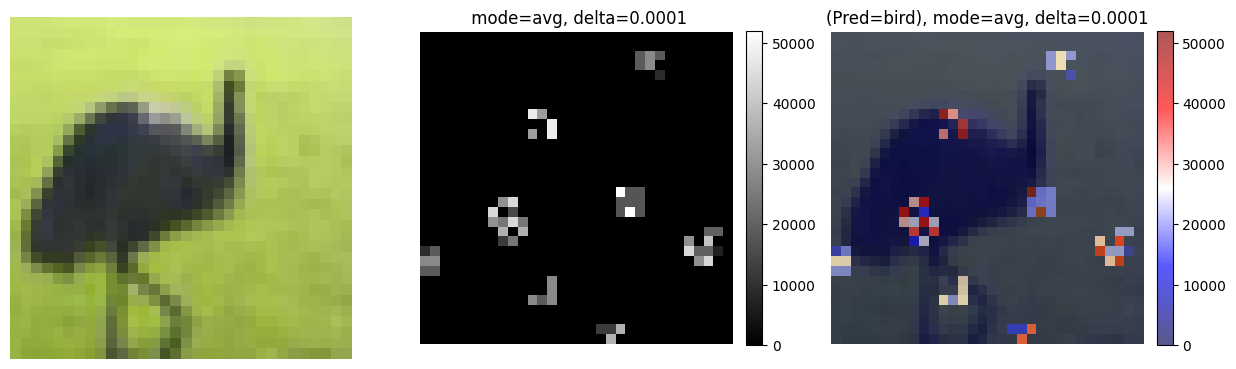

0.0005


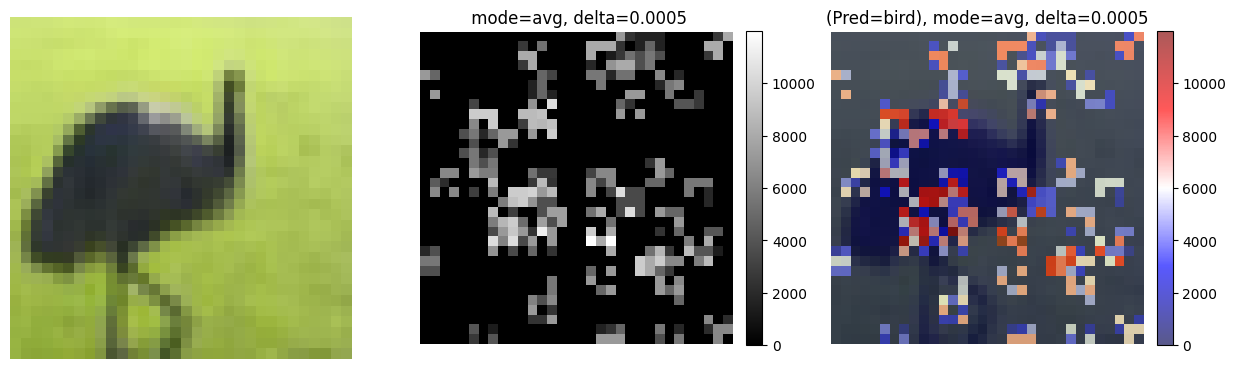

0.0007


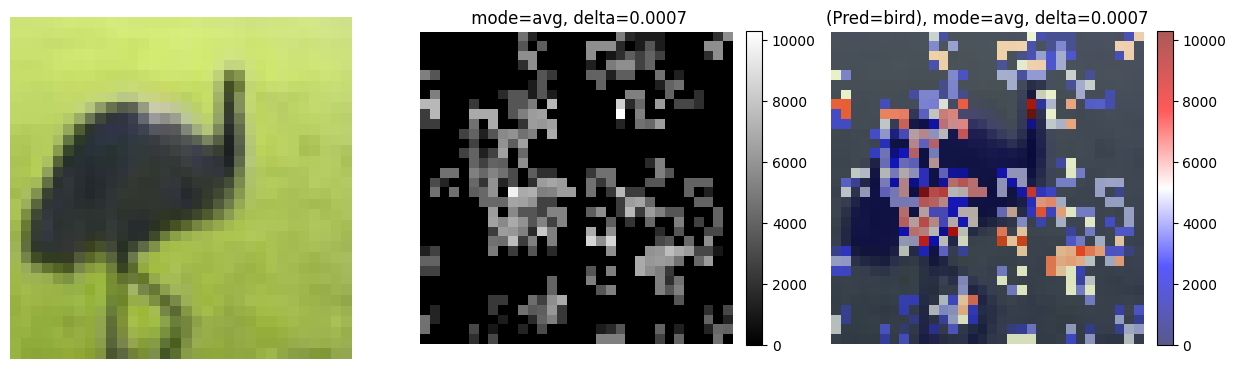

0.001


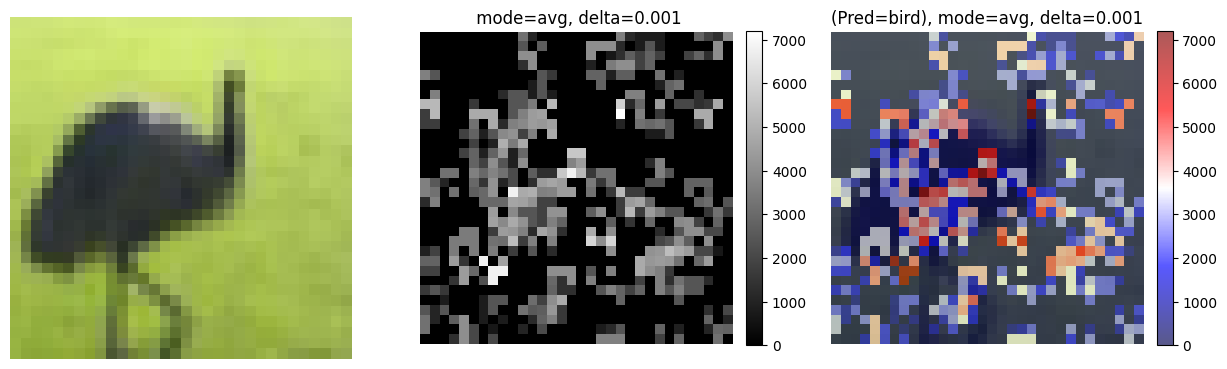

0.005


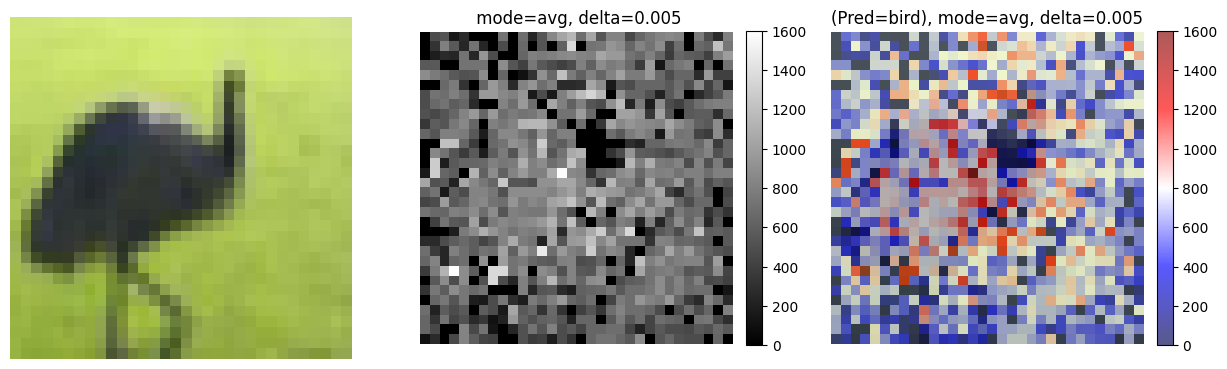

0.01


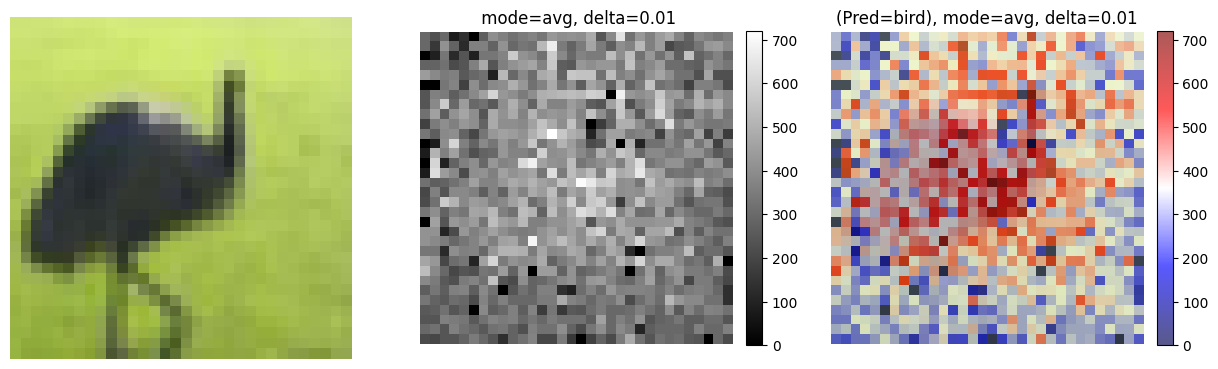

0.015


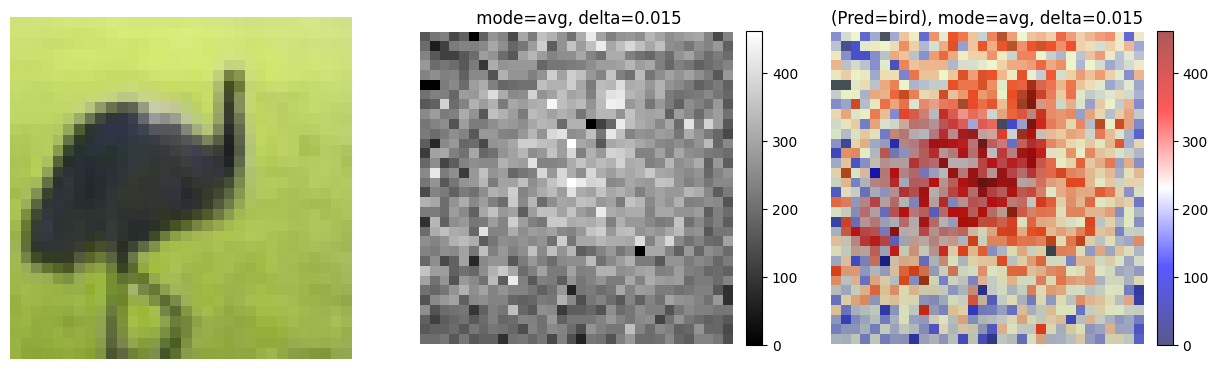

0.02


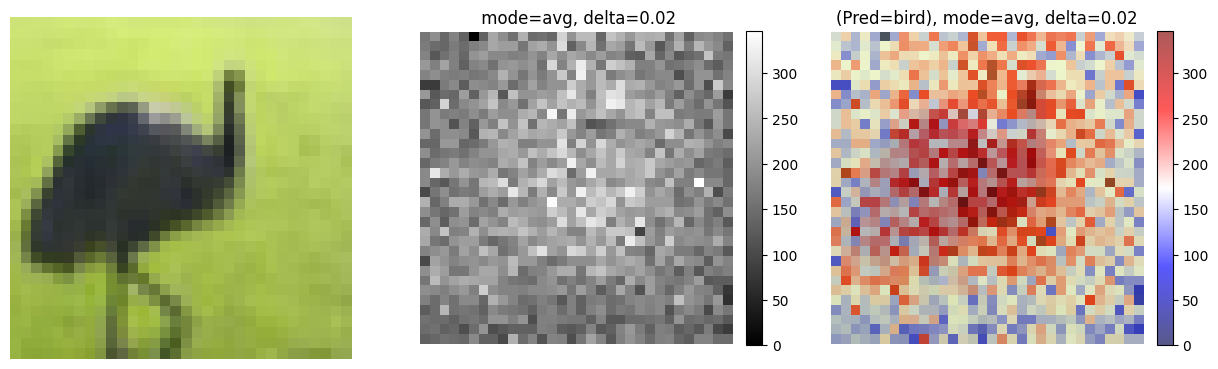

0.03


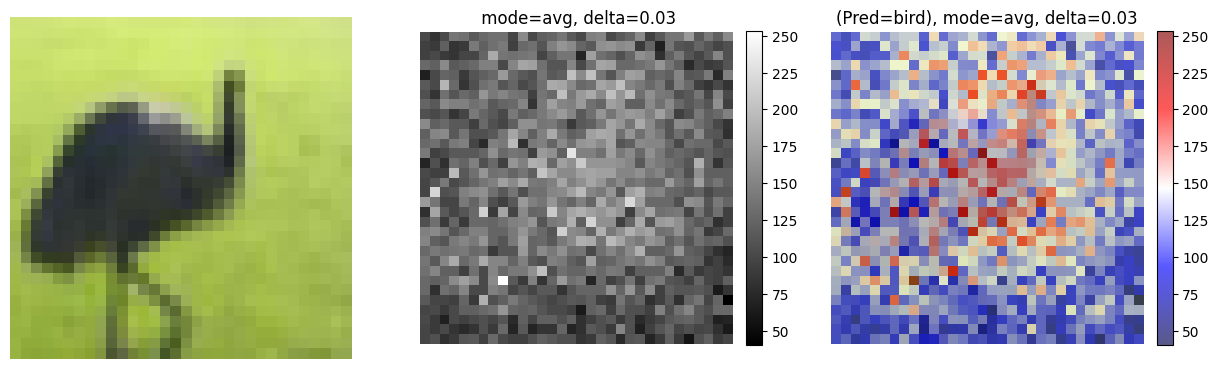

0.05


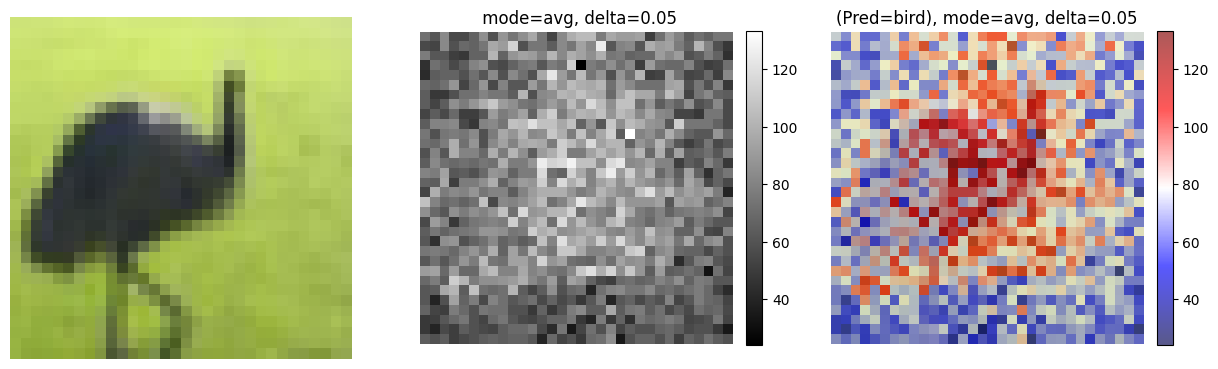

0.1


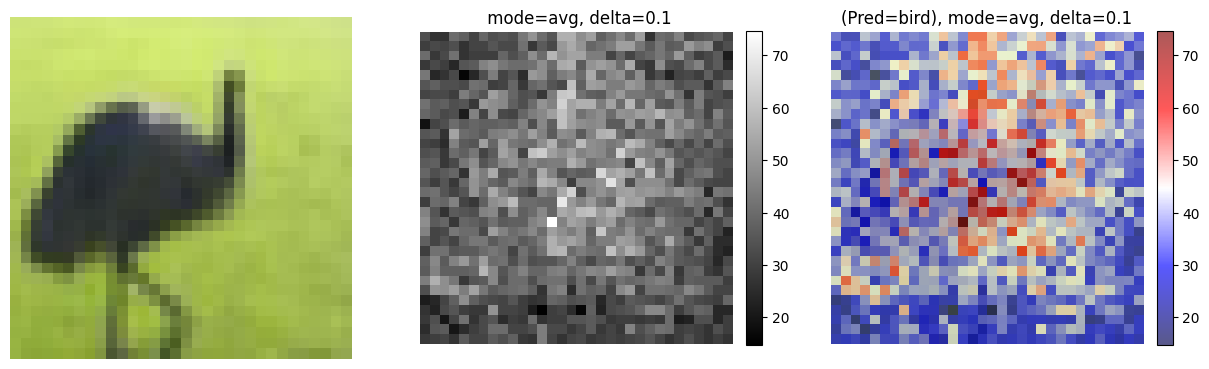

0.3


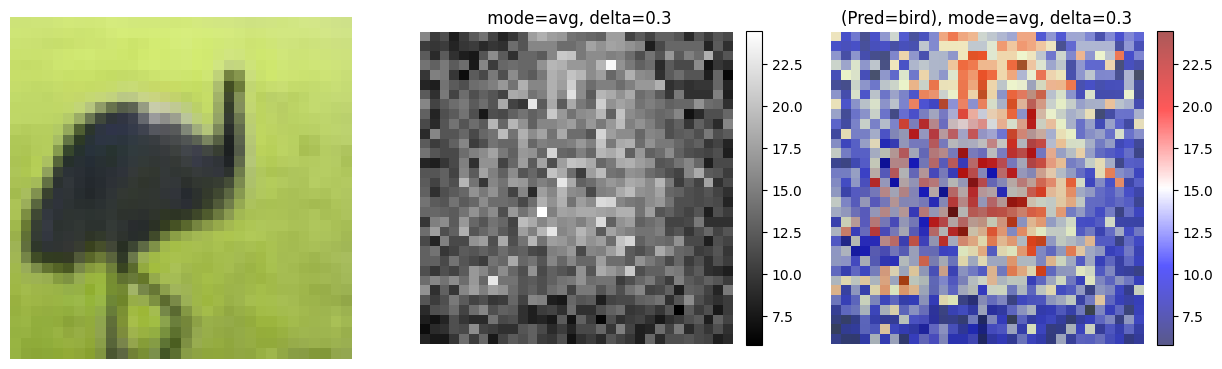

0.5


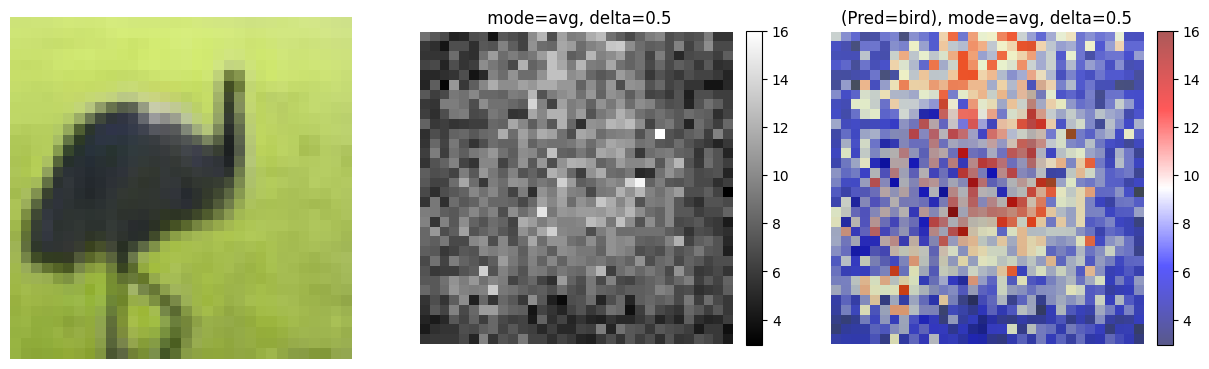

1.0


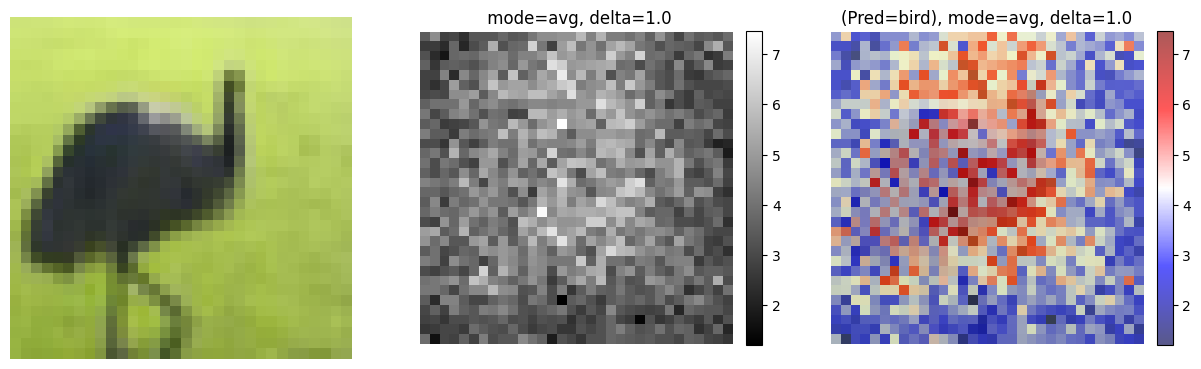

0.0001


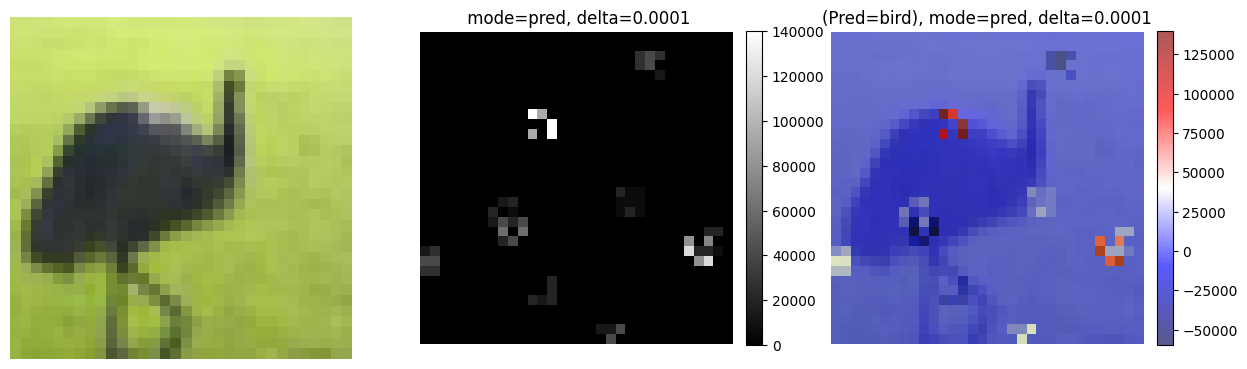

0.0005


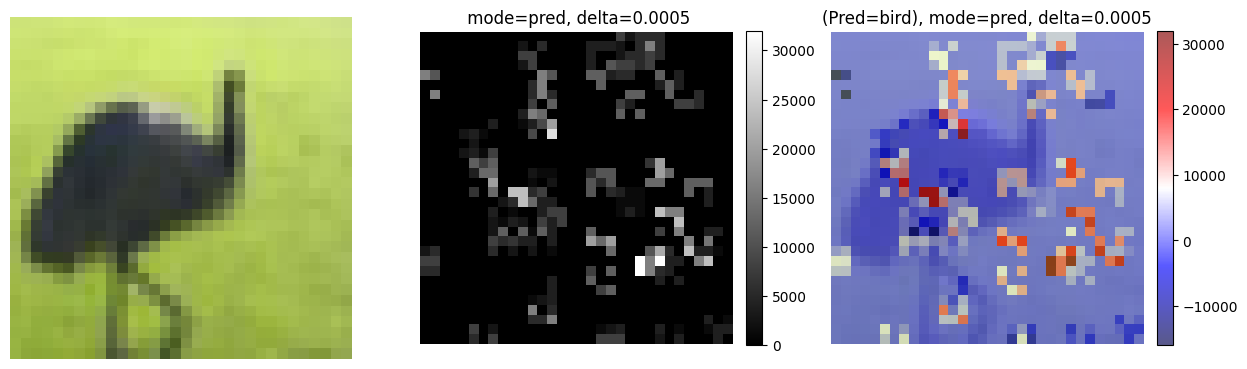

0.0007


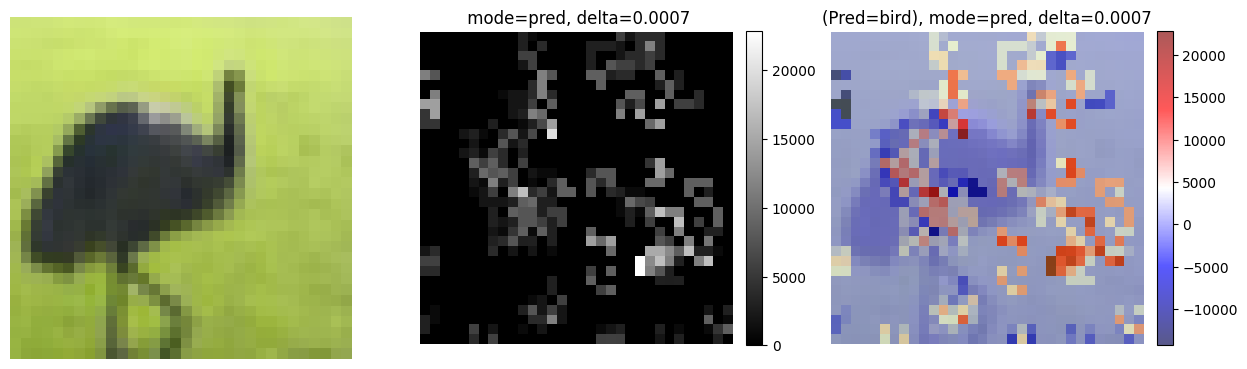

0.001


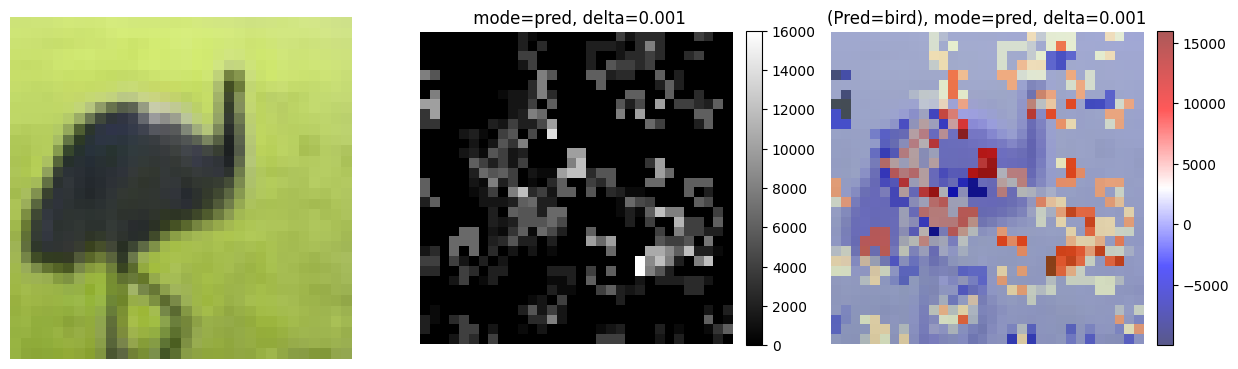

0.005


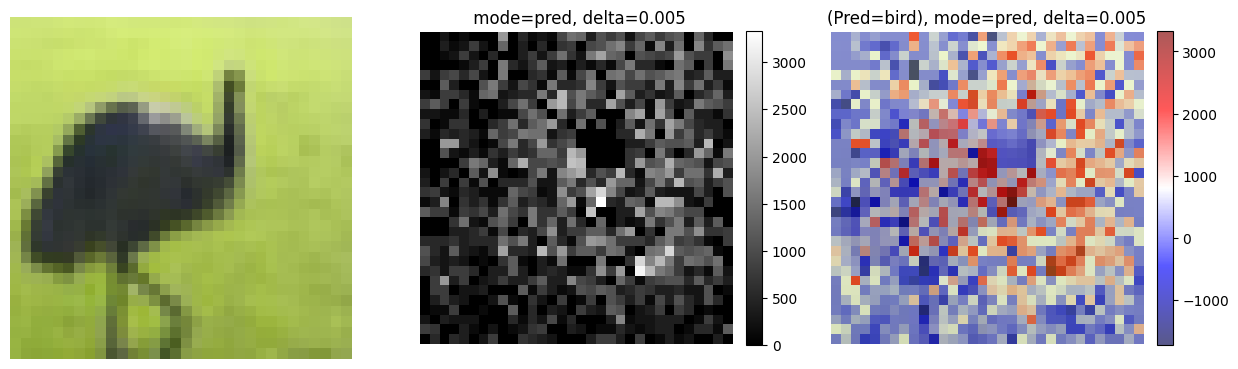

0.01


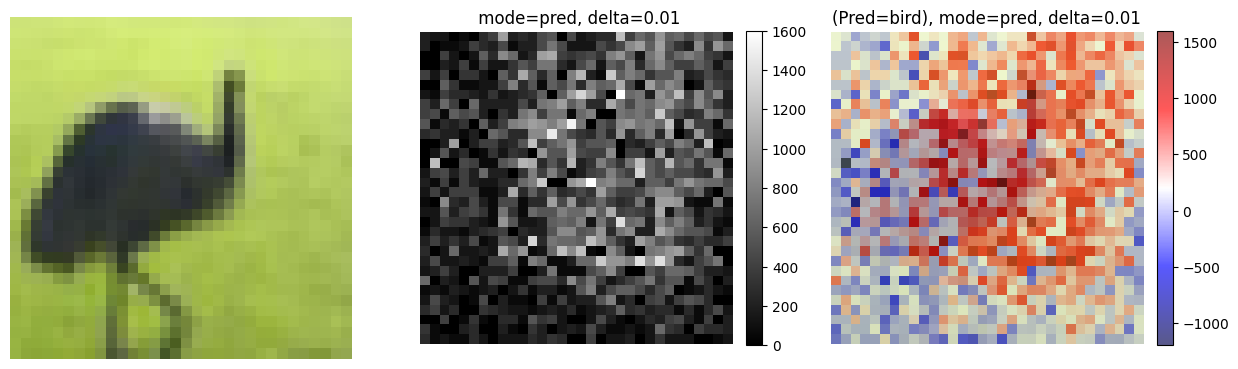

0.015


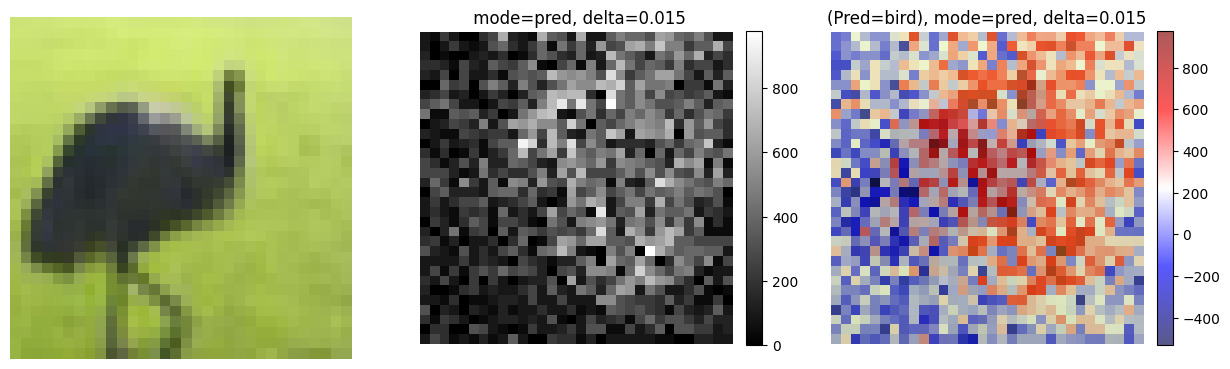

0.02


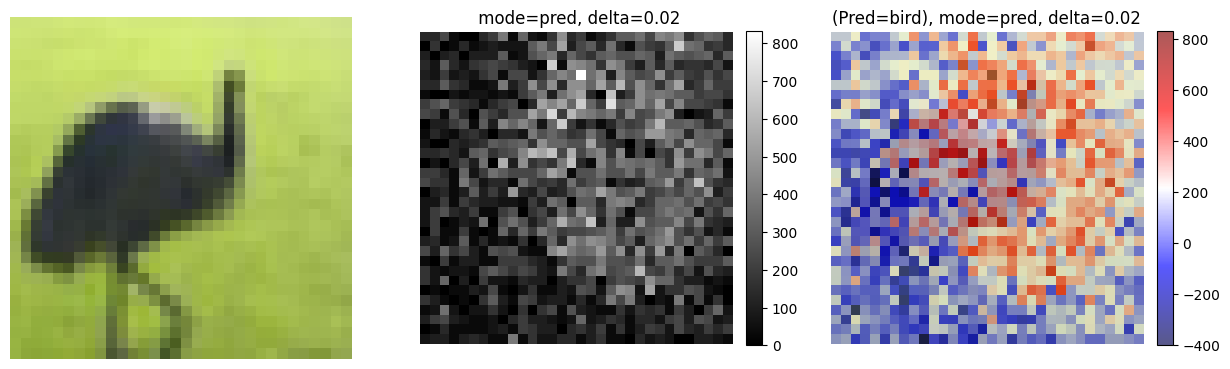

0.03


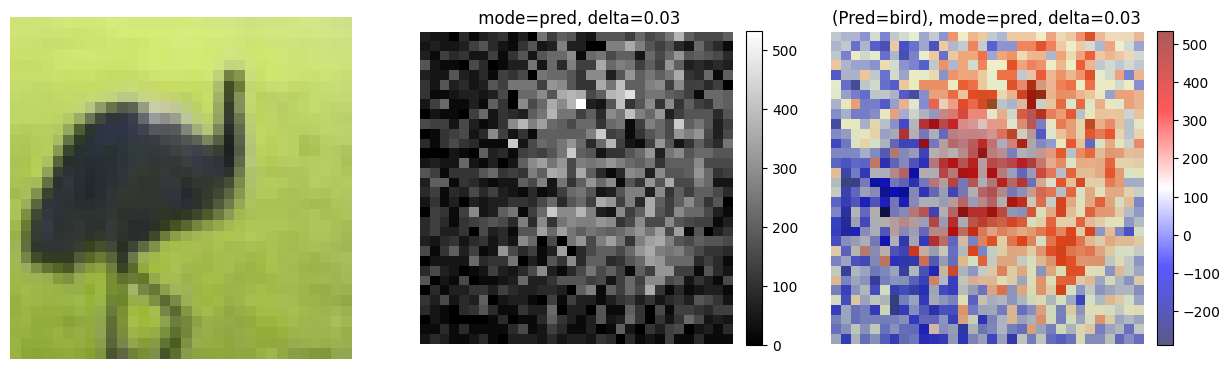

0.05


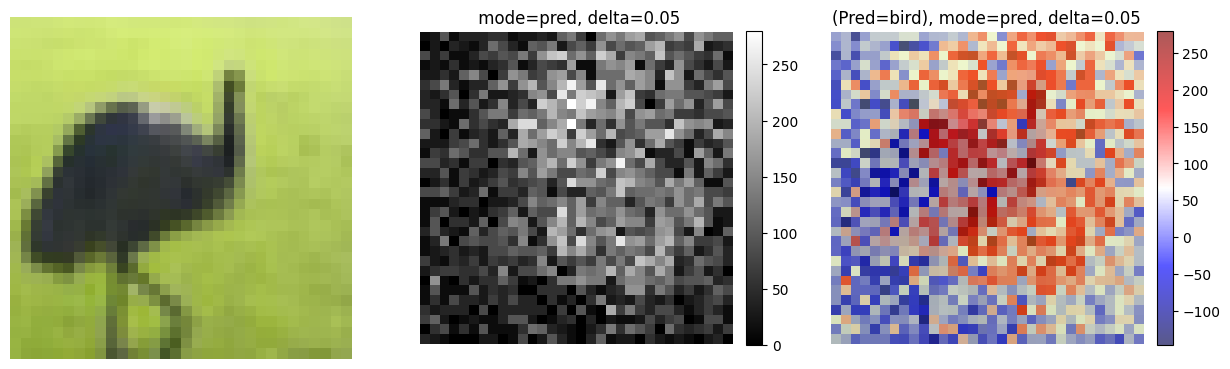

0.1


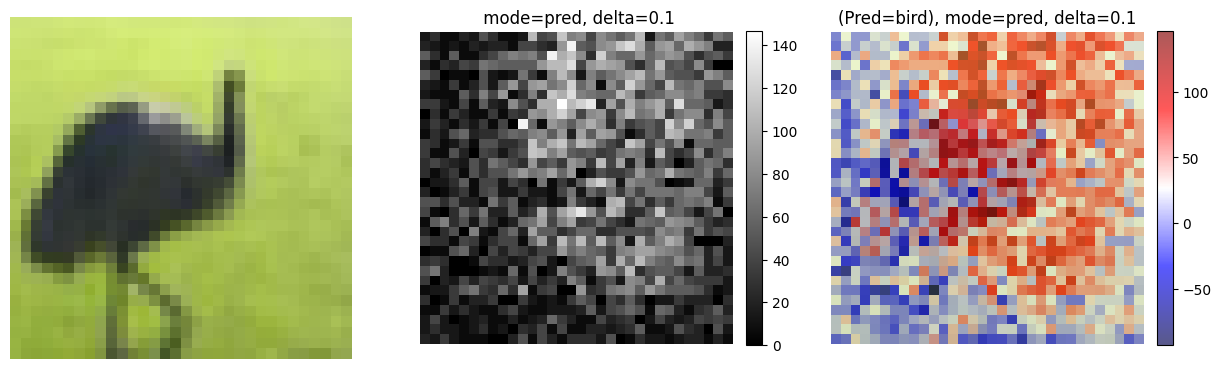

0.3


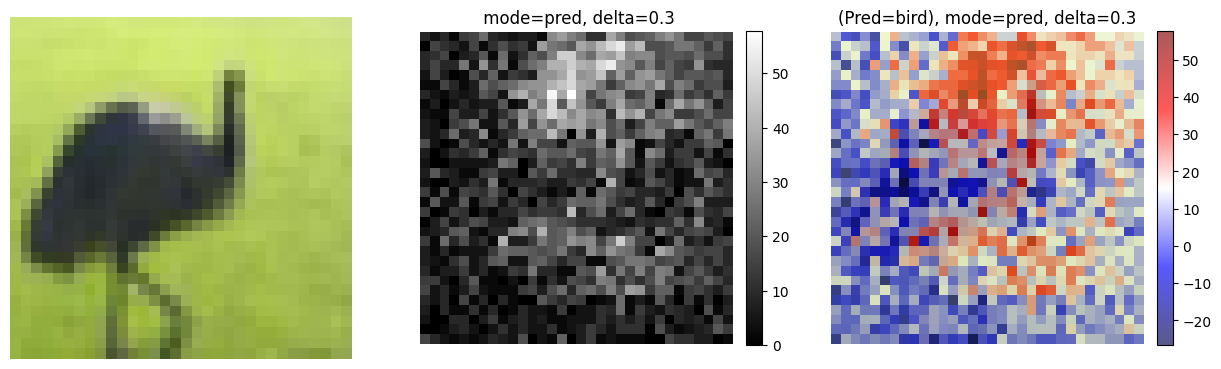

0.5


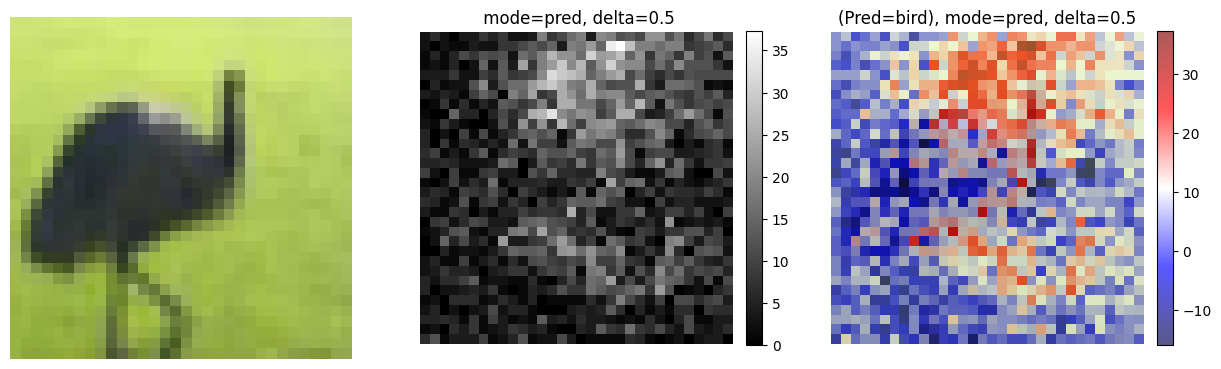

1.0


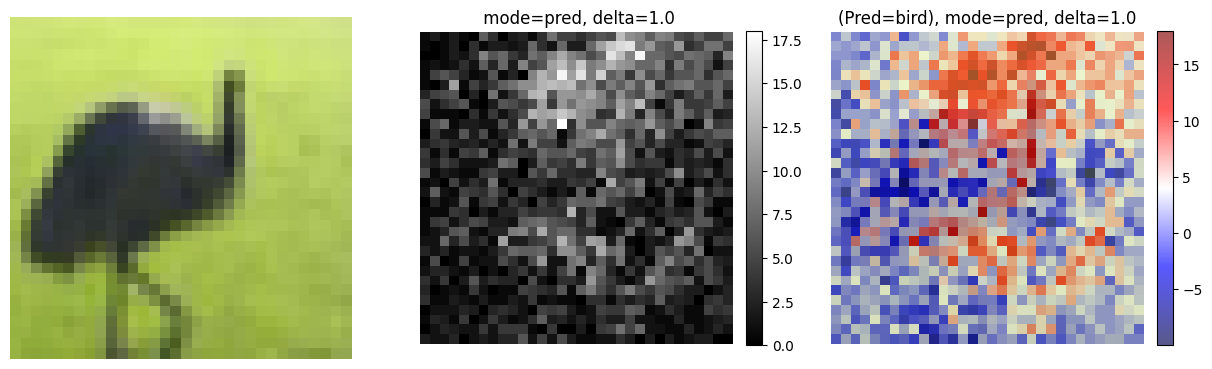

In [11]:
def pixel_sensitivity_map(img, delta=0.05, mode="avg", batch_size=128):
    """
    mode = "avg"  -> 所有 class 取絕對值後平均
    mode = "pred" -> 只看目前模型預測 class
    
    """
    H, W = img.shape[1], img.shape[2]

    # baseline
    x_orig = normalize(img).unsqueeze(0).to(device)
    acts_orig, _ = get_activations(model, x_orig)
    y_orig = acts_orig["fc"][0]
    pred_class = torch.argmax(y_orig).item()

    # 準備所有 pixel+channel 的 perturbations
    perturbed_imgs = []
    coords = []
    for r in range(H):
        for c in range(W):
            for ch in range(3):
                img_mod = img.clone()
                img_mod[ch, r, c] = min(1.0, img_mod[ch, r, c] + delta)
                # img_mod[ch, r, c] = max(0, img_mod[ch, r, c] - delta)
                perturbed_imgs.append(normalize(img_mod).unsqueeze(0))
                coords.append((r, c, ch))

    perturbed_imgs = torch.cat(perturbed_imgs).to(device)

    # forward in batches
    scores = []
    with torch.no_grad():
        for i in range(0, len(perturbed_imgs), batch_size):
            batch = perturbed_imgs[i:i+batch_size]
            acts_mod, _ = get_activations(model, batch)
            y_mod = acts_mod["fc"]  # shape [B, 10]
            dy = (y_mod - y_orig.unsqueeze(0)) / delta  # [B, 10]

            if mode == "avg":
                score = dy.abs().mean(dim=1)  # [B]
            elif mode == "pred":
                score = dy[:, pred_class]      # [B]
            else:
                raise ValueError("mode must be 'avg' or 'pred'")
            scores.append(score.cpu())

    scores = torch.cat(scores)  # [Npixels*3]

    # 聚合回 HxW，對 channel 取平均
    sensitivity_map = torch.zeros((H, W))
    count = torch.zeros((H, W))
    for (r, c, ch), s in zip(coords, scores):
        sensitivity_map[r, c] += s.item()
        count[r, c] += 1
    sensitivity_map /= count

    return sensitivity_map, pred_class


def normalize_map(sens_map, method="linear", gamma=2.0, alpha=10.0):
    """
    method = "linear"  -> min-max normalize
    method = "gamma"   -> power law normalization
    method = "log"     -> log normalization
    method = "sigmoid" -> z-score + sigmoid
    """
    x = sens_map.clone()
    minv, maxv = x.min(), x.max()
    if maxv == minv:
        return torch.zeros_like(x)

    if method == "linear":
        x = (x - minv) / (maxv - minv)

    elif method == "gamma":
        x = (x - minv) / (maxv - minv)
        x = x.pow(gamma)

    elif method == "log":
        x = x - minv
        x = torch.log1p(alpha * x) / torch.log1p(alpha * (maxv - minv))

    elif method == "sigmoid":
        mu, sigma = x.mean(), x.std()
        x = torch.sigmoid((x - mu) / (sigma + 1e-8))

    return x

def keep_high_low(sens_map, thr=95):
    threshold = np.percentile(np.abs(sens_map),thr)
    mask = (sens_map >=threshold) | (sens_map <= -threshold)
    sens_map = sens_map*mask
    return sens_map


def visualize_sensitivity(img, sens_map, pred_class=None, mode="avg",thr=95,delta=0.05):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))

    sens_map_disp = sens_map.clone()

    # optional normalize
    # threshold = np.percentile(np.abs(sens_map_disp),thr)
    # sens_map_disp = np.clip(sens_map_disp, -threshold, threshold)
        
    
    ax[0].imshow(tensor_to_img(img))
    ax[0].axis("off")
    
    
    # Heatmap
    im1 = ax[1].imshow(sens_map_disp.abs().numpy(), cmap="gray")
    ax[1].set_title(f" mode={mode}, delta={delta}")
    fig.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
    ax[1].axis("off")

    # Overlay on original
    img_disp = tensor_to_img(img)
    ax[2].imshow(img_disp)
    im2 = ax[2].imshow(sens_map_disp.numpy(), cmap="seismic", alpha=0.65)
    ax[2].set_title(f"(Pred={CIFAR10_CLASSES[pred_class]}), mode={mode}, delta={delta}")
    fig.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
    ax[2].axis("off")

    plt.savefig(f"delta_mode_{mode}_delta_{delta}.png", bbox_inches="tight", dpi=150)
    plt.show()
    
delta = [0.0001,0.0005,0.0007,0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]
for d in delta:
    print(d)
    sens_map_avg, pred_class = pixel_sensitivity_map(img_raw, delta=d, mode="avg")
    # sens_map_avg = normalize_map(sens_map_avg, method="linear")
    # sens_map_avg = keep_high_low(sens_map_avg, thr= 50)
    visualize_sensitivity(img_raw, sens_map_avg, pred_class, mode="avg",delta=d)

for d in delta:
    print(d)
    sens_map_avg, pred_class = pixel_sensitivity_map(img_raw, delta=d, mode="pred")
    # sens_map_avg = normalize_map(sens_map_avg, method="linear")
    # sens_map_avg = keep_high_low(sens_map_avg, thr= 50)
    visualize_sensitivity(img_raw, sens_map_avg, pred_class, mode="pred",delta=d)





In [ ]:
import torch
import matplotlib.pyplot as plt

def pixel_response_curve_batch_relative(
    img, r, c, ch, model,
    delta_max=1.0, step=0.001, mode="pred",
    normalize=None, device="cuda", batch_size=256
):
    """
    探索單一 pixel 的輸出變化曲線（Δy/Δx 相對 baseline）
    """
    # baseline 輸出
    x_orig = normalize(img).unsqueeze(0).to(device)
    with torch.no_grad():
        acts_orig, _ = get_activations(model, x_orig)
        y_orig = acts_orig["fc"][0]
    pred_class = torch.argmax(y_orig).item()

    # 掃描範圍
    deltas = torch.arange(-delta_max, delta_max + step, step)
    num_steps = len(deltas)
    ys_list = []

    with torch.no_grad():
        for i in range(0, num_steps, batch_size):
            batch_deltas = deltas[i:i + batch_size]
            img_batch = img.unsqueeze(0).repeat(len(batch_deltas), 1, 1, 1)

            # 修改 pixel
            img_batch[torch.arange(len(batch_deltas)), ch, r, c] = torch.clamp(
                img_batch[torch.arange(len(batch_deltas)), ch, r, c] + batch_deltas, 0, 1
            )

            x_batch = normalize(img_batch).to(device)
            acts_batch, _ = get_activations(model, x_batch)
            ys_list.append(acts_batch["fc"].cpu())

    ys = torch.cat(ys_list, dim=0)  # [num_steps, num_classes]

    # baseline index （Δx=0）
    base_idx = (deltas == 0).nonzero(as_tuple=True)[0].item()
    y_base = ys[base_idx]  # [num_classes]

    # 相對 baseline 的 Δy/Δx
    dy_dx = (ys - y_base) / deltas.unsqueeze(1)
    dy_dx[base_idx] = 0.0  # 避免除以 0

    # 模式選擇
    if mode == "pred":
        y_curve = ys[:, pred_class]
        dy_dx_curve = dy_dx[:, pred_class]
    else:
        y_curve = ys.mean(dim=1)
        dy_dx_curve = dy_dx.mean(dim=1)

    return deltas, y_curve.cpu(), dy_dx_curve.cpu(), pred_class


def plot_pixel_response_relative(
    img, r, c, ch, model,
    delta_max=0.1, step=0.001, mode="pred",
    normalize=None, device="cuda", batch_size=256
):
    deltas, y_curve, dy_dx_curve, pred_class = pixel_response_curve_batch_relative(
        img, r, c, ch, model, delta_max, step, mode, normalize, device, batch_size
    )

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].plot(deltas.numpy(), y_curve.numpy())
    ax[0].set_xticks(torch.linspace(-delta_max, delta_max, 50).numpy())  # 顯示更多刻度
    ax[0].set_xlim(-delta_max, delta_max)
    ax[0].set_title(f"y vs Δx (ch={ch}, pos=({r},{c}), class={CIFAR10_CLASSES[pred_class]})")
    ax[0].set_xlabel("Pixel Change (Δx)")
    ax[0].set_ylabel("Model Output (y)")

    ax[1].plot(deltas.numpy(), dy_dx_curve.numpy())
    ax[1].set_xticks(torch.linspace(-delta_max, delta_max, 50).numpy())  # 顯示更多刻度
    ax[1].set_xlim(-delta_max, delta_max)
    ax[1].set_title("Δy/Δx (relative to baseline)")
    ax[1].set_xlabel("Pixel Change (Δx)")
    ax[1].set_ylabel("Δy/Δx")

    plt.tight_layout()
    plt.savefig(f"curves/position({r}_{c})_ch({ch})_step{step}.png", bbox_inches="tight", dpi=150)
    # plt.show()


# === Example usage ===
for ch in range(3):
    for c in range(32):
        for r in range(32):
            plot_pixel_response_relative(img_raw, r, c, ch, model, delta_max=1.0, step=0.001, mode="pred", normalize=normalize, device=device)
# r, c, ch = 16, 16, 0
# plot_pixel_response_batch(img_raw, r, c, ch, model, delta_max=1.0, step=0.0001, mode="pred", normalize=normalize, device=device)


0.0001 0.01


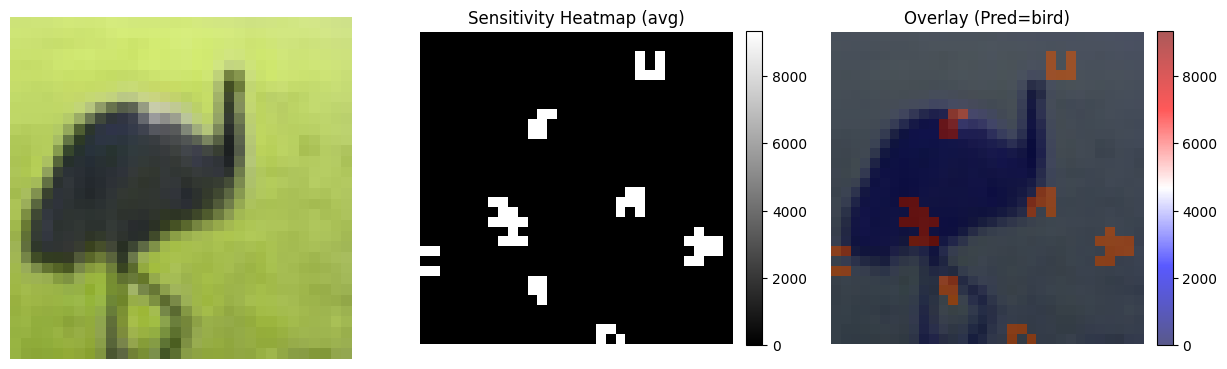

0.0001 0.05


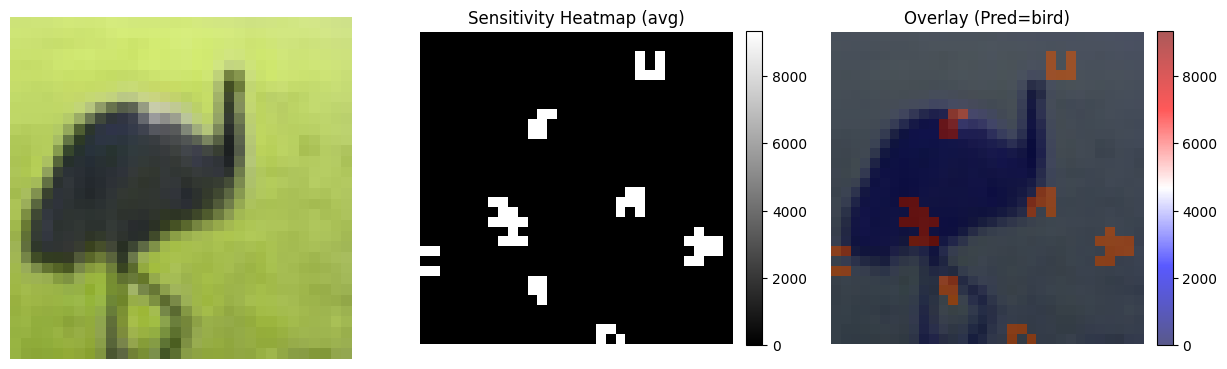

0.0001 0.1


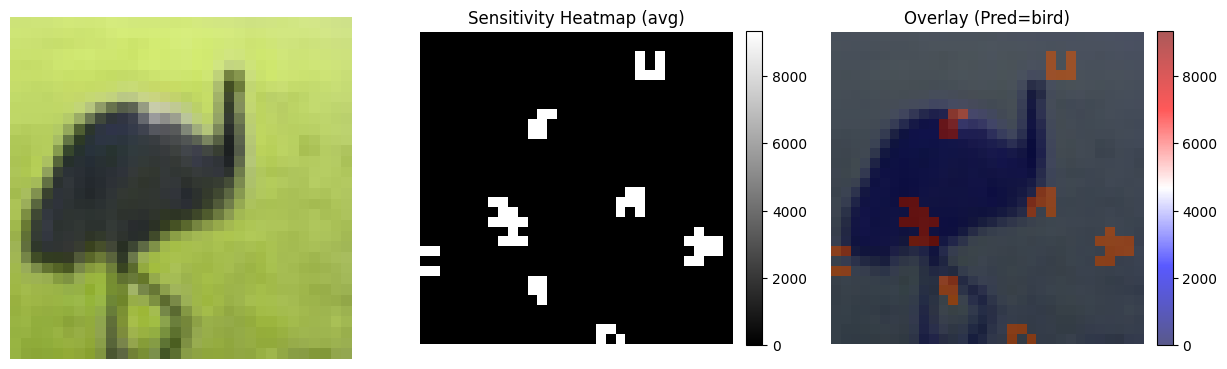

0.0001 0.15


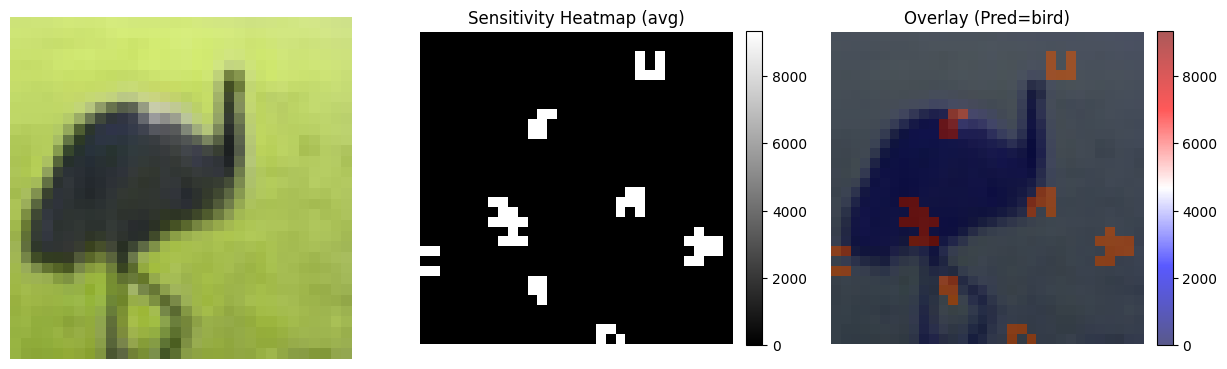

0.0001 0.2


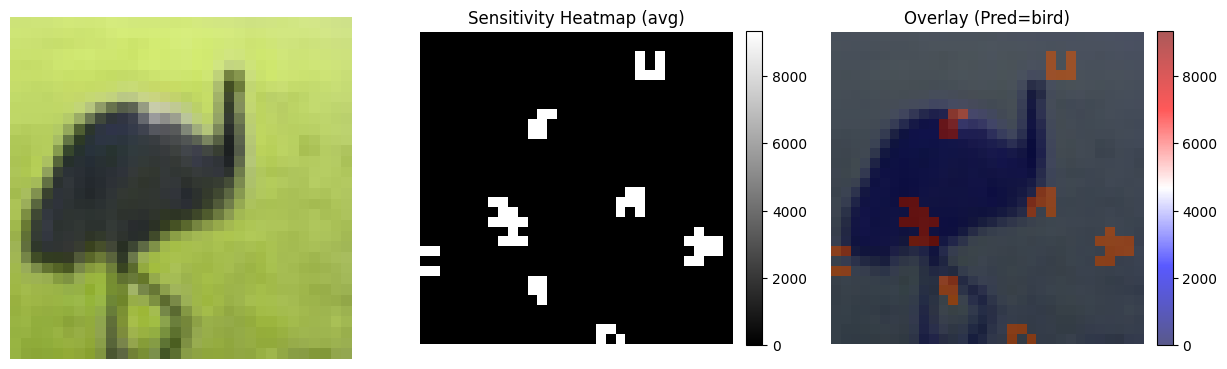

0.0005 0.01


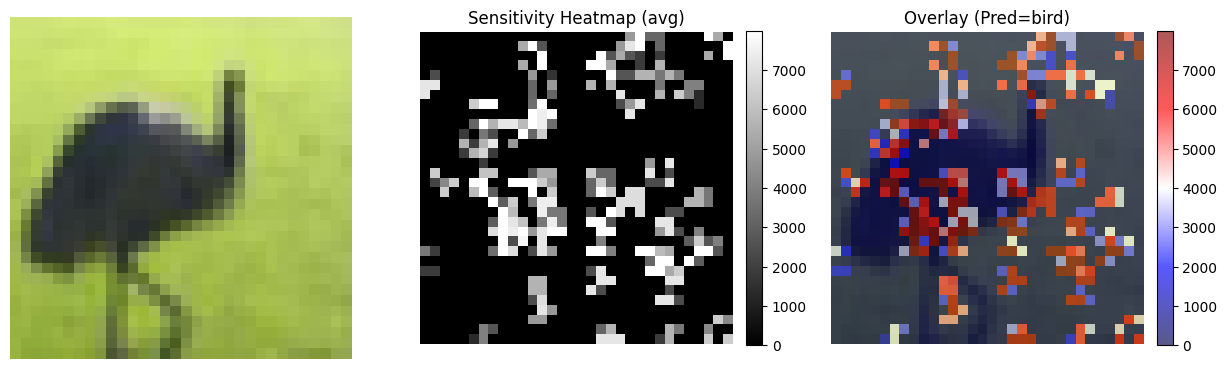

0.0005 0.05


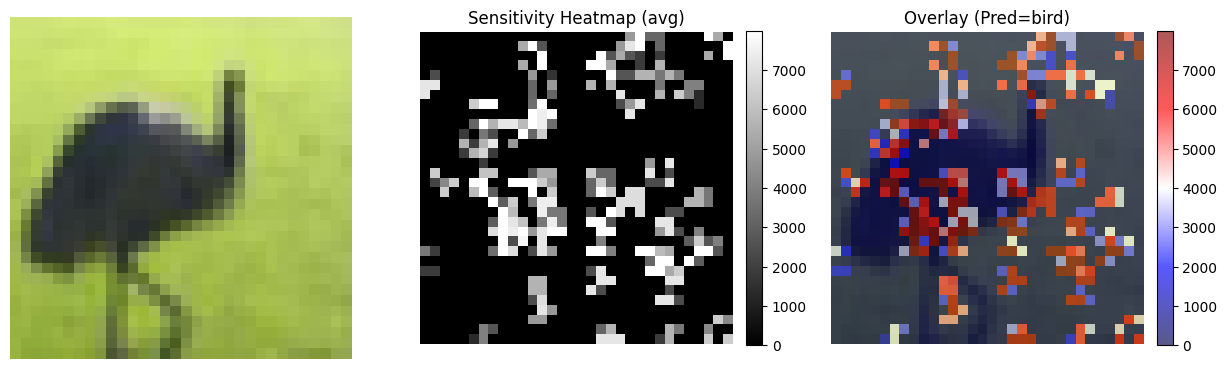

0.0005 0.1


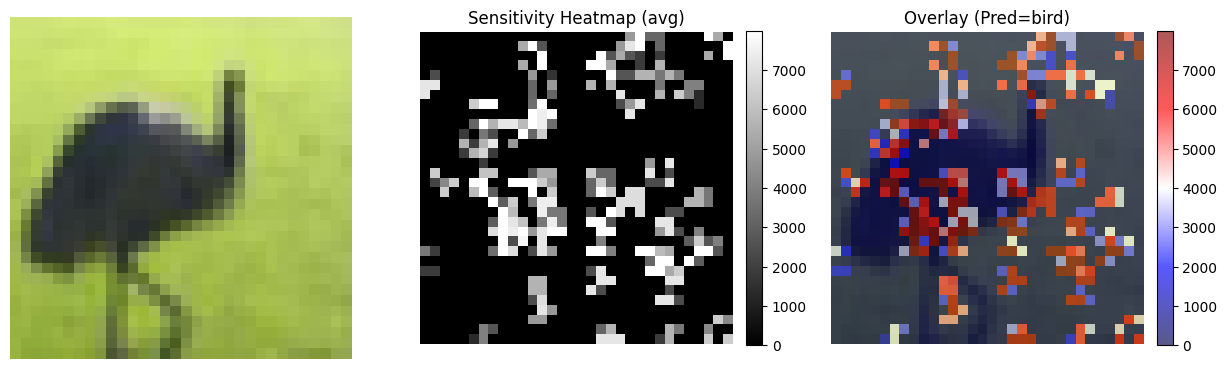

0.0005 0.15


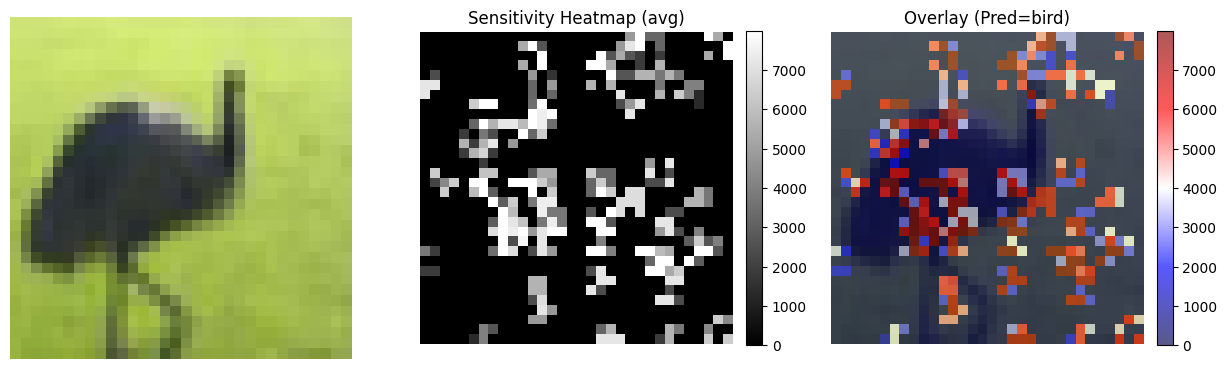

0.0005 0.2


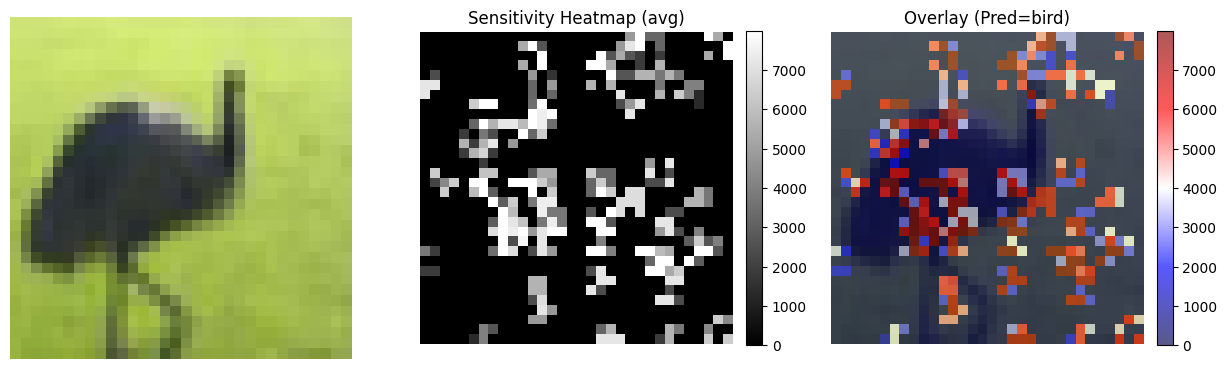

0.0007 0.01


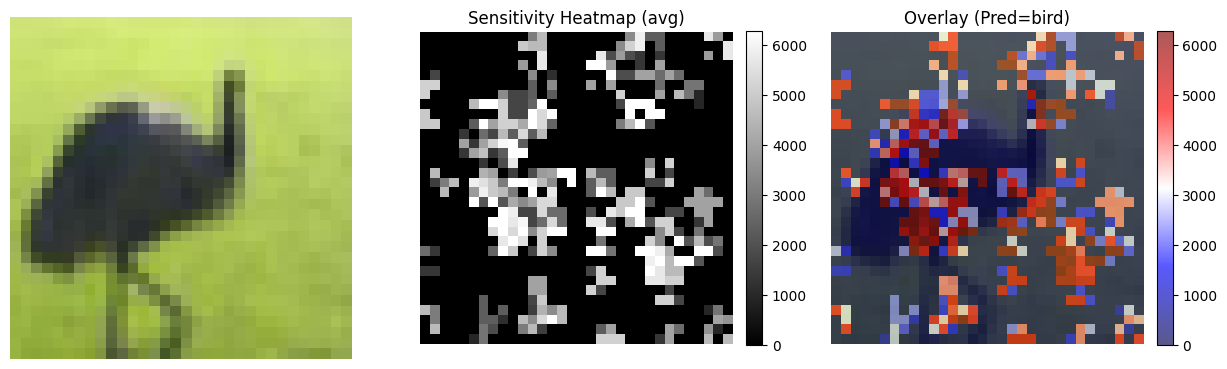

0.0007 0.05


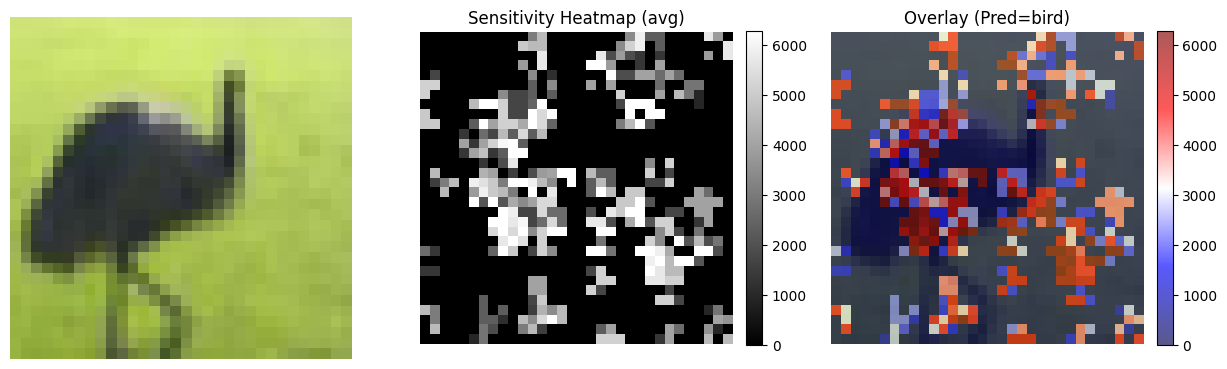

0.0007 0.1


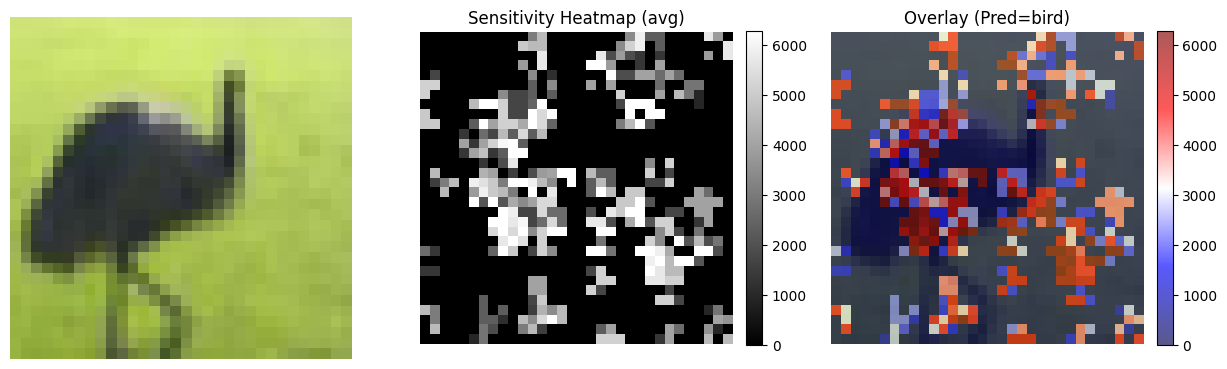

0.0007 0.15


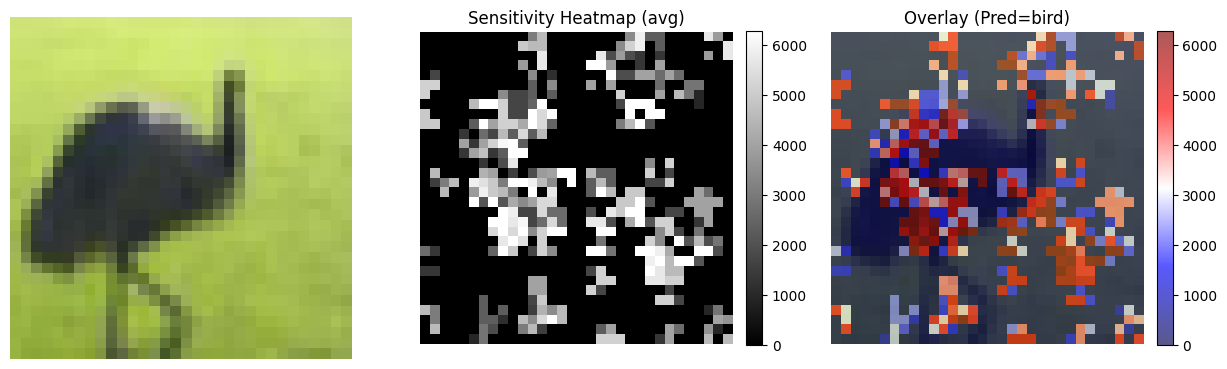

0.0007 0.2


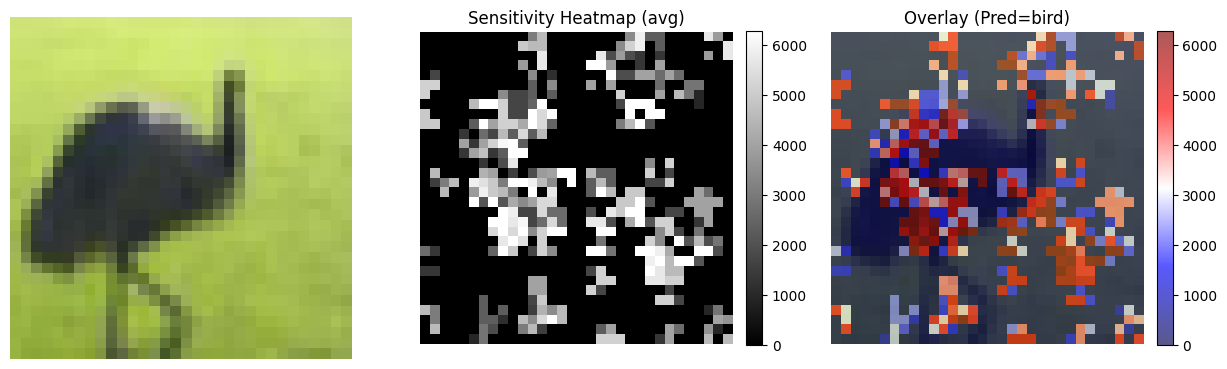

0.001 0.01


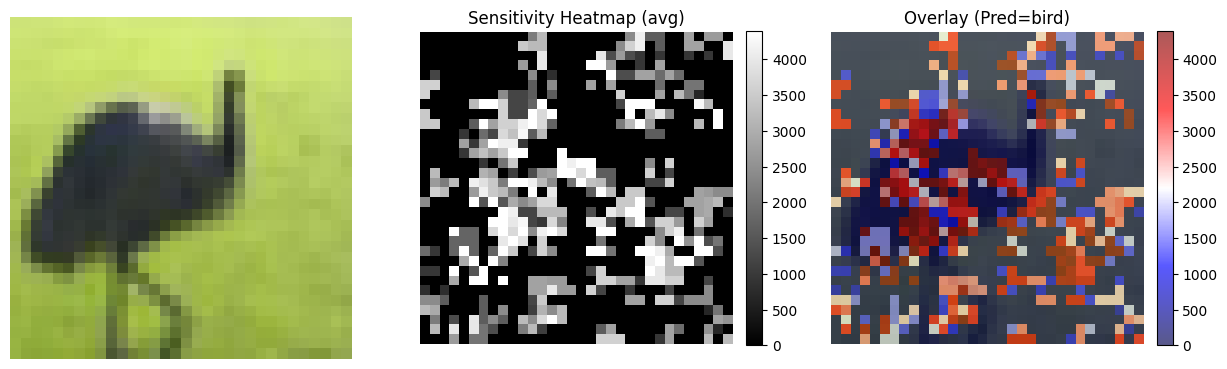

0.001 0.05


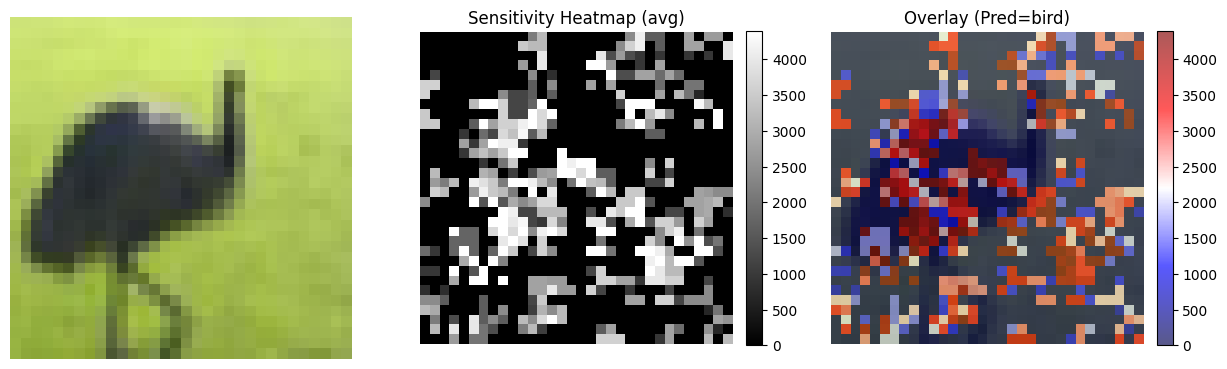

0.001 0.1


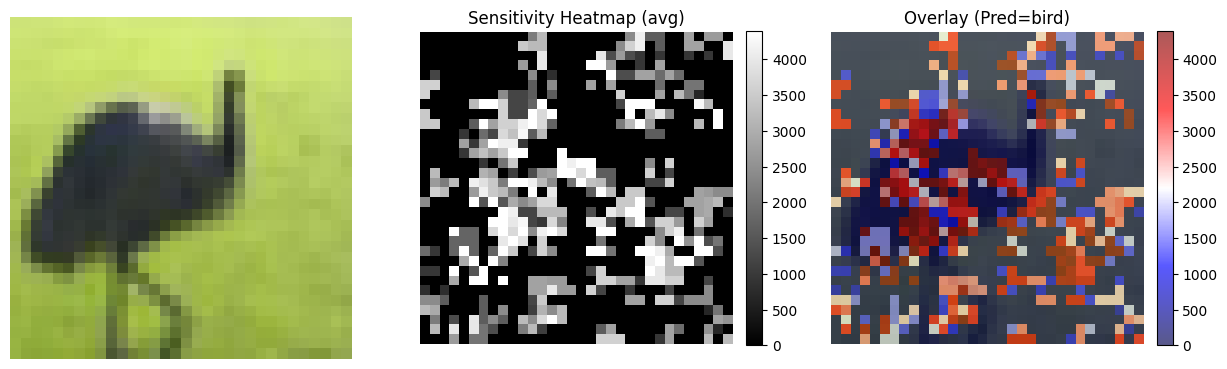

0.001 0.15


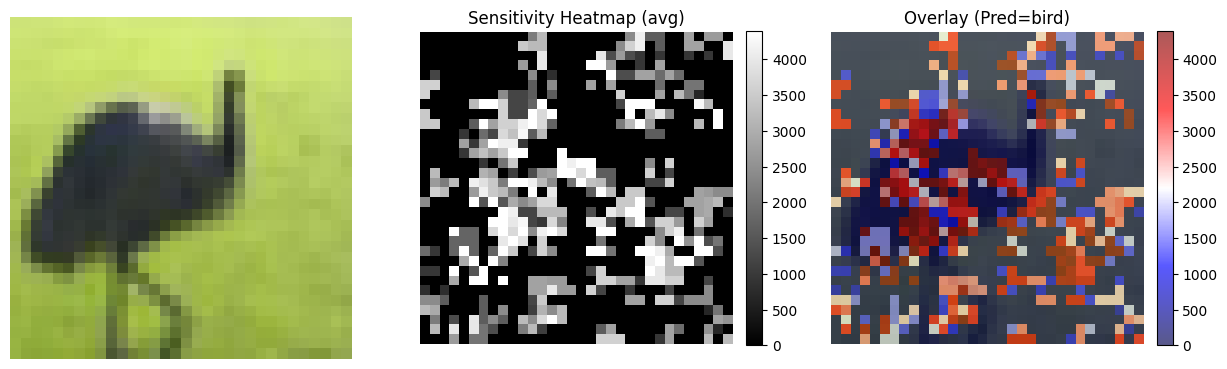

0.001 0.2


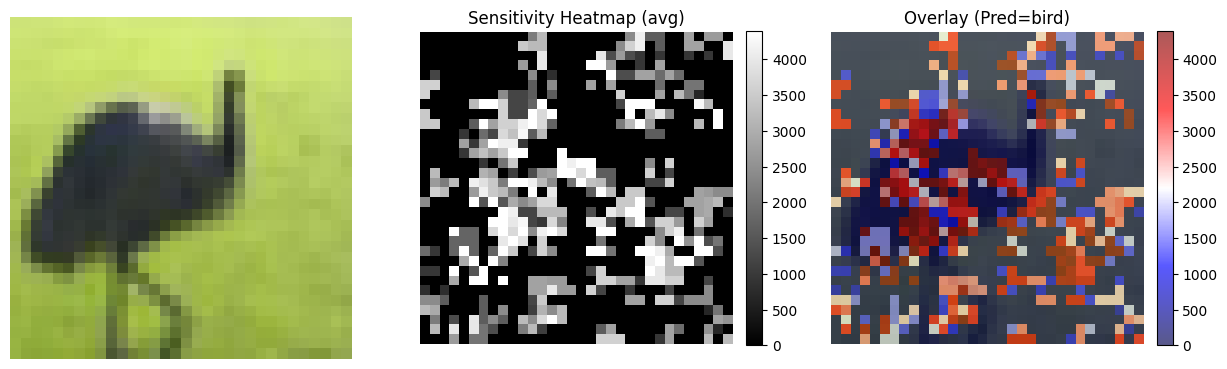

0.005 0.01


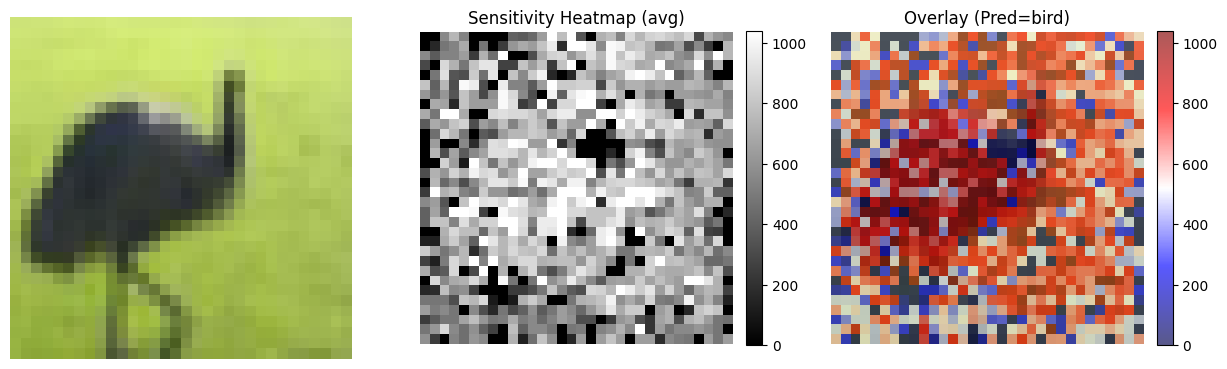

0.005 0.05


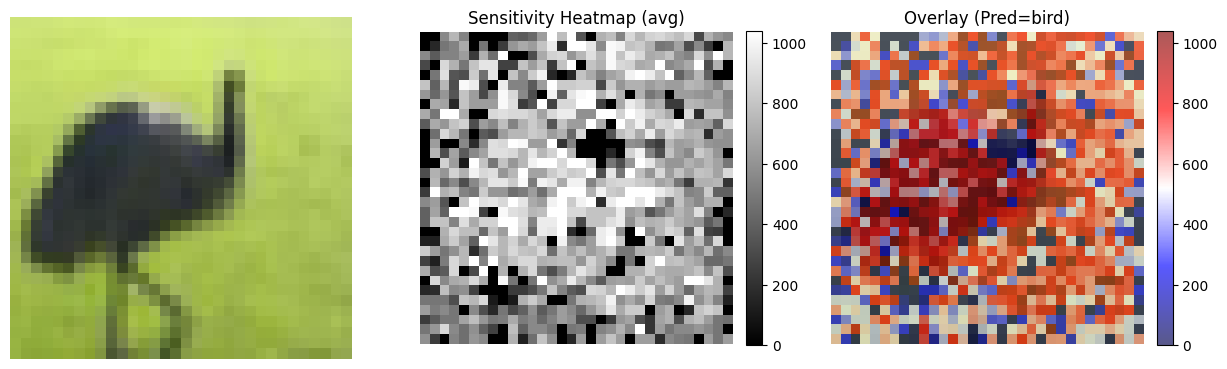

0.005 0.1


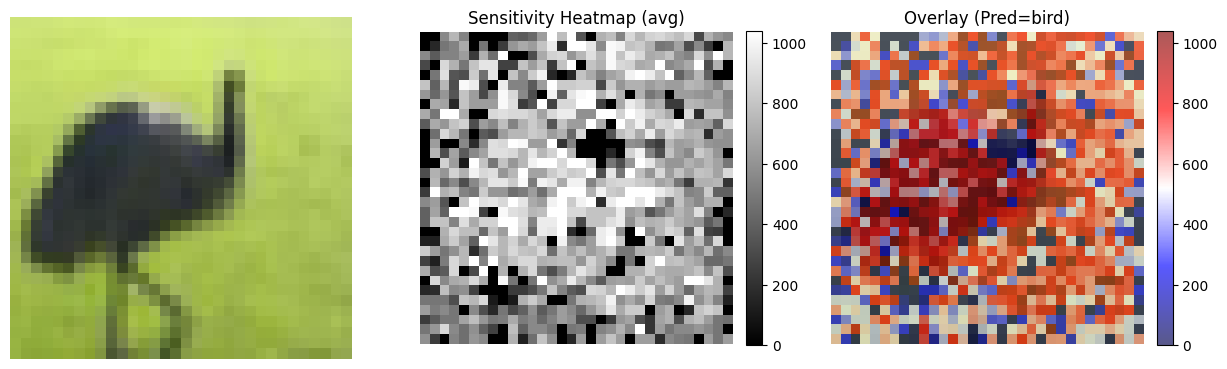

0.005 0.15


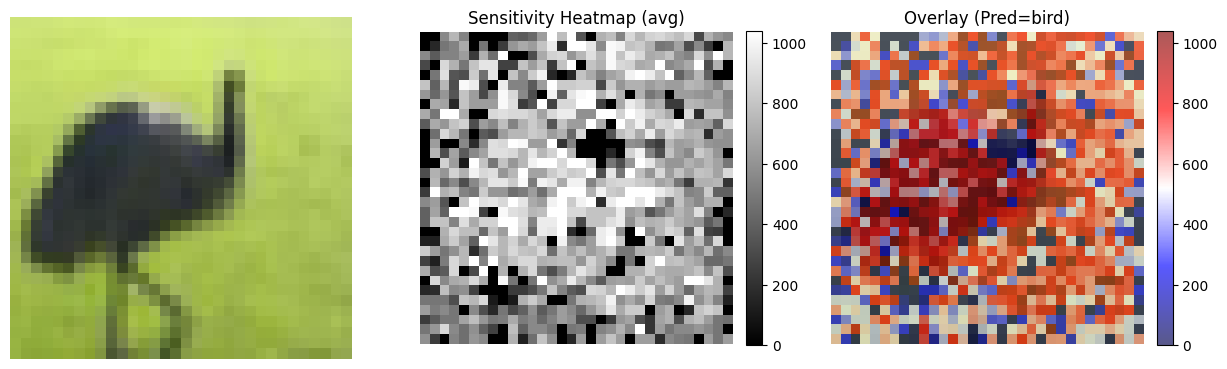

0.005 0.2


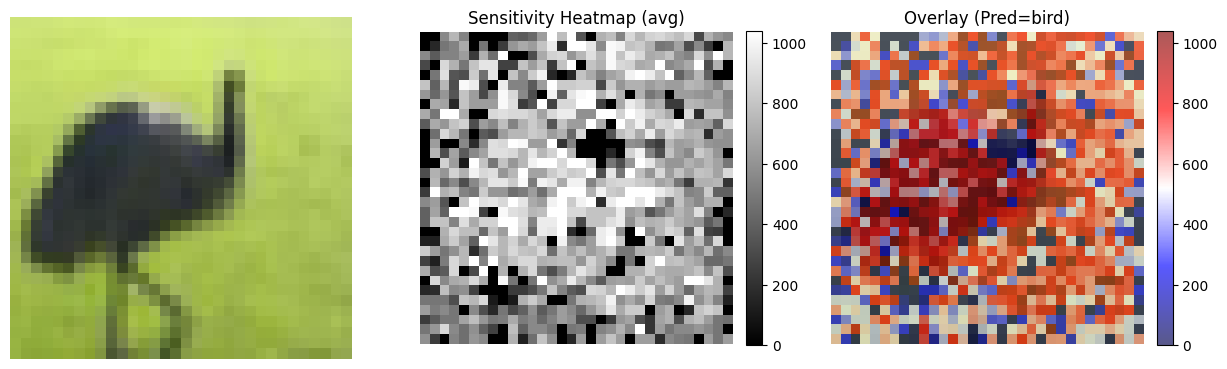

0.01 0.01


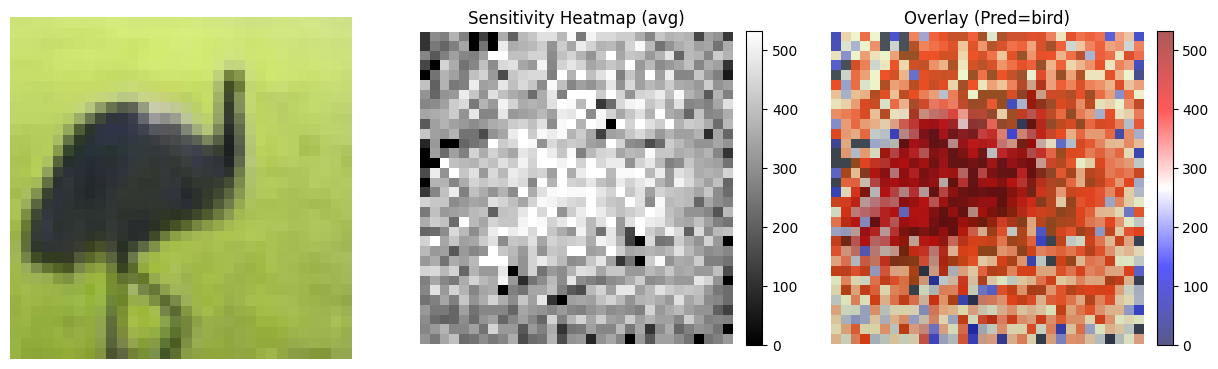

0.01 0.05


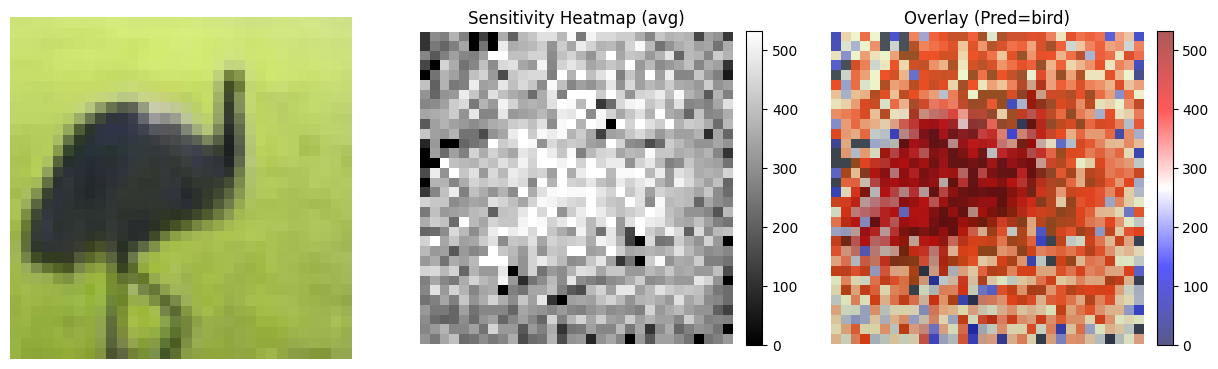

0.01 0.1


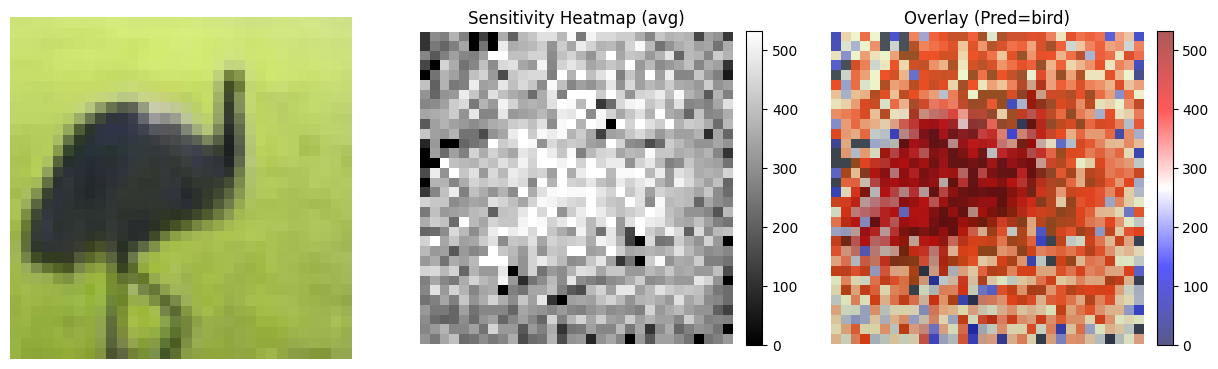

0.01 0.15


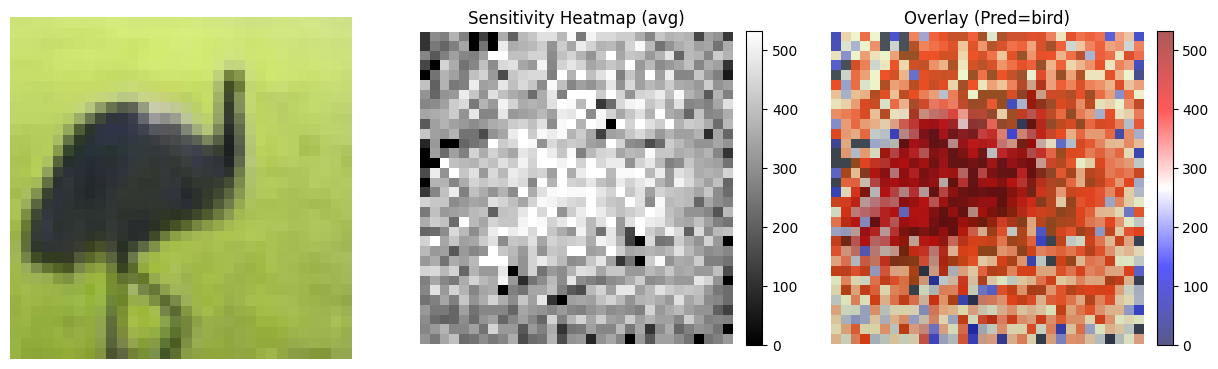

0.01 0.2


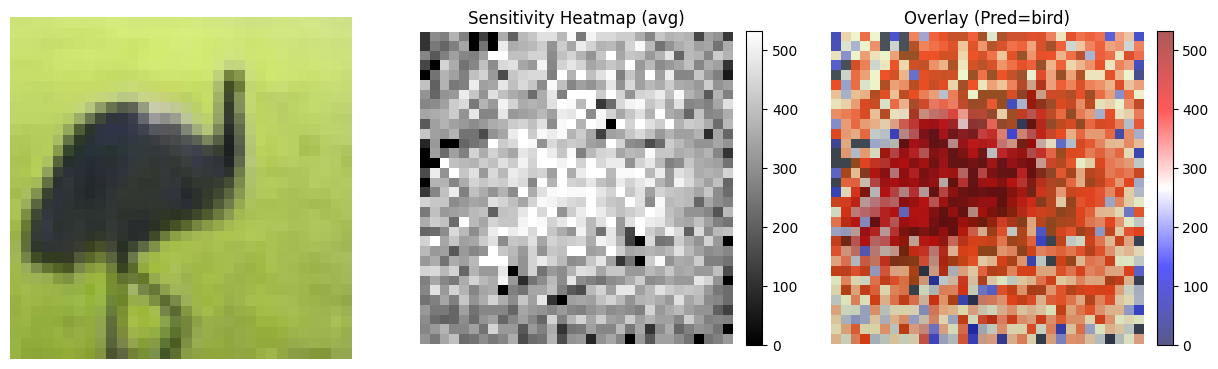

0.015 0.01


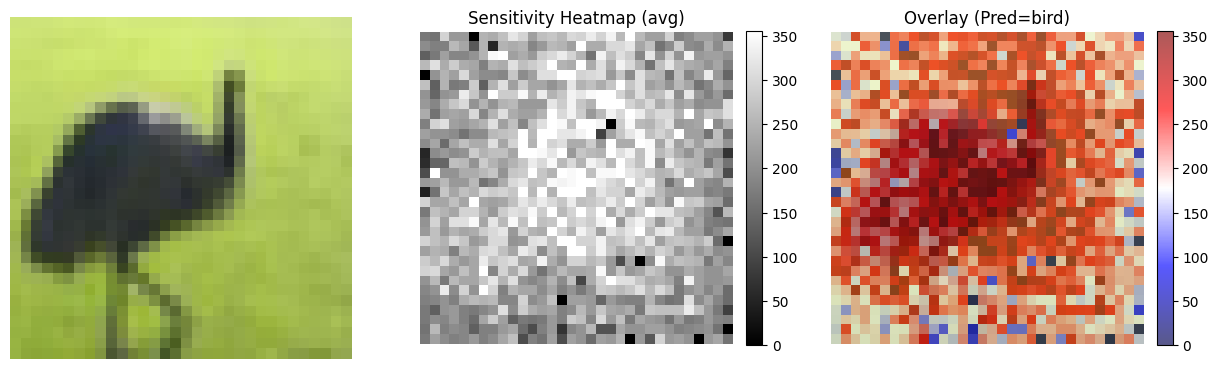

0.015 0.05


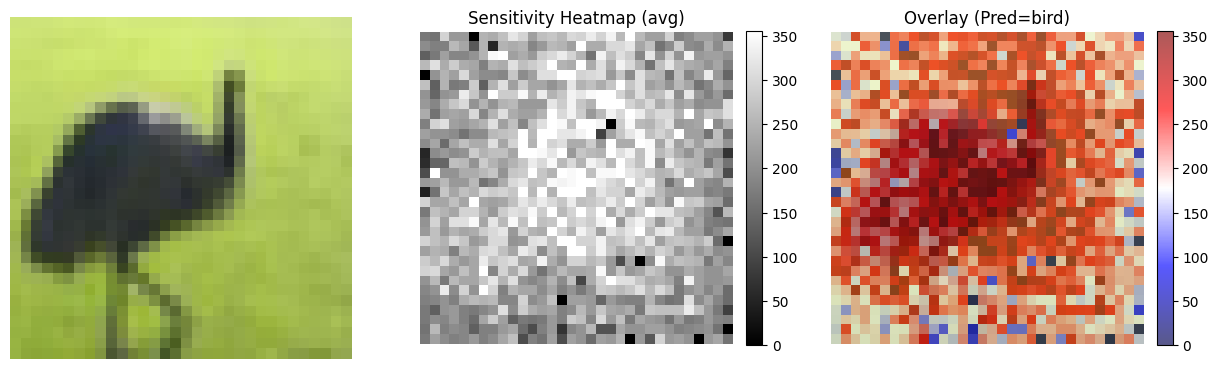

0.015 0.1


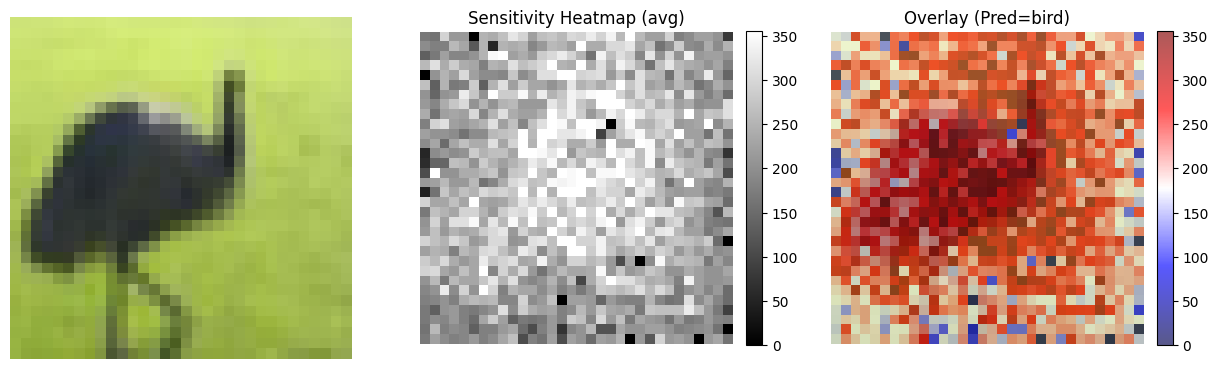

0.015 0.15


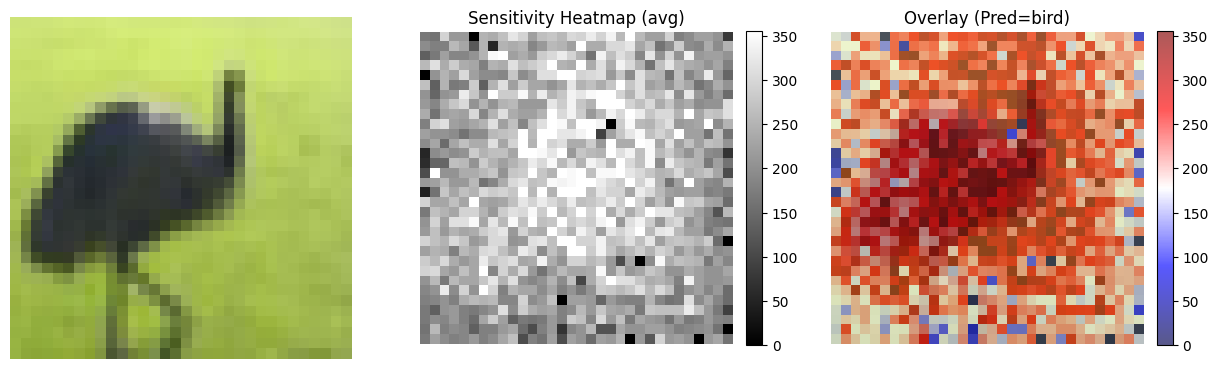

0.015 0.2


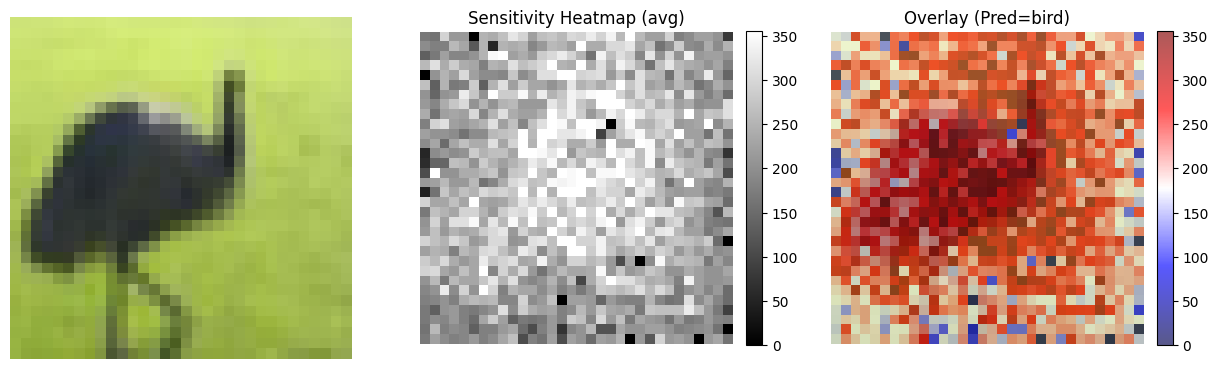

0.02 0.01


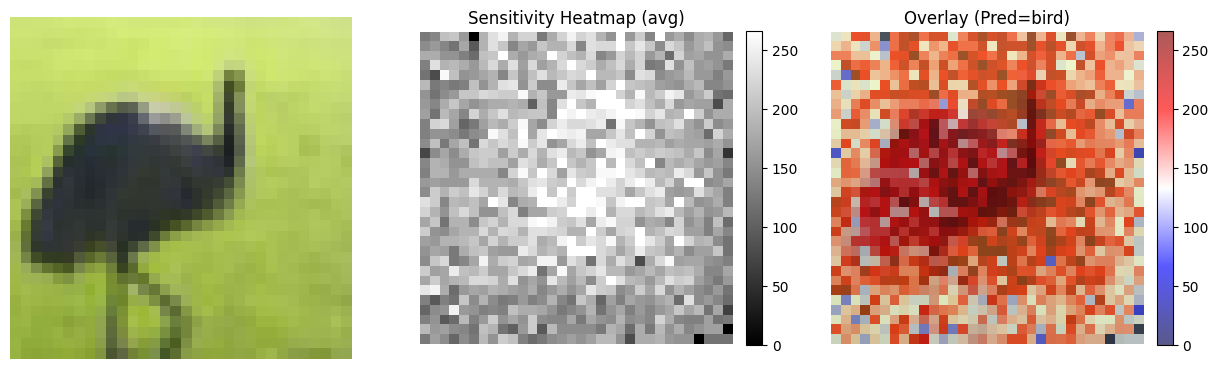

0.02 0.05


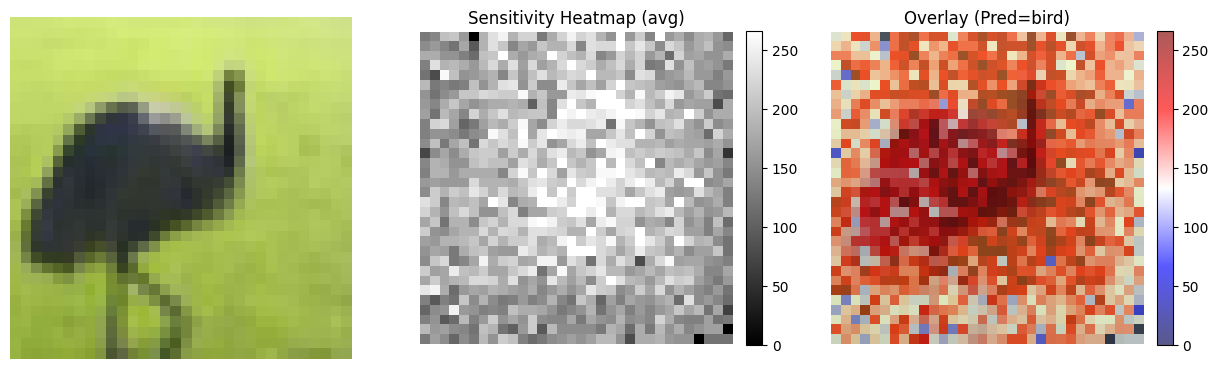

0.02 0.1


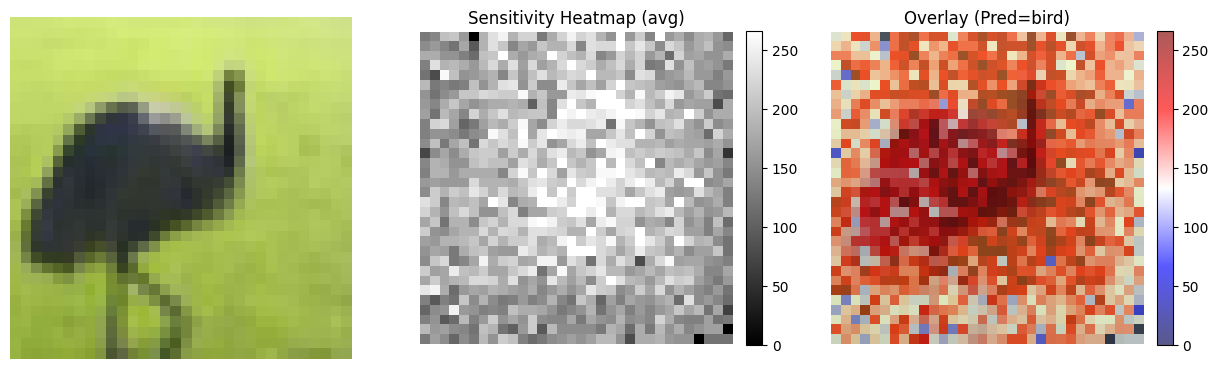

0.02 0.15


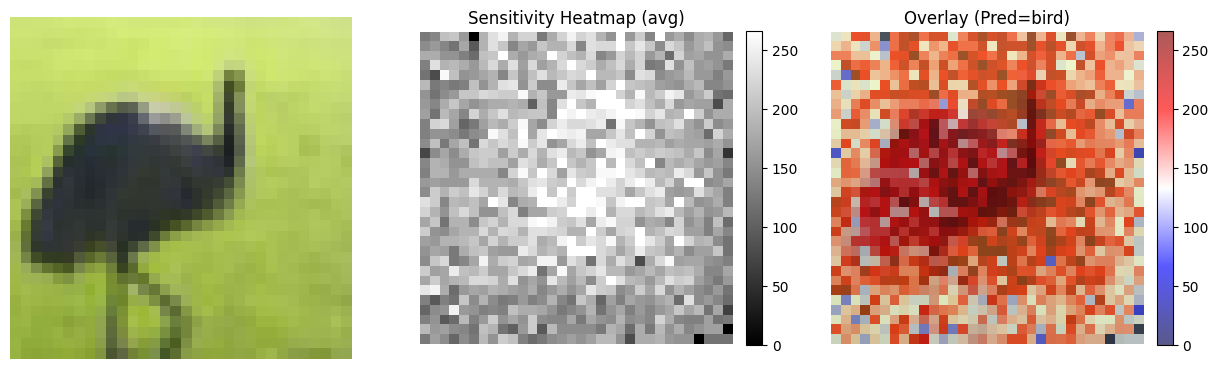

0.02 0.2


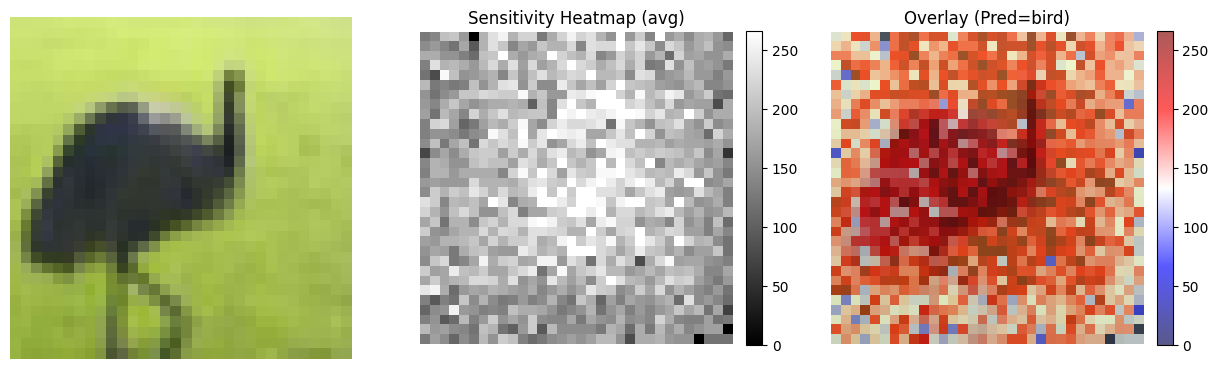

0.03 0.01


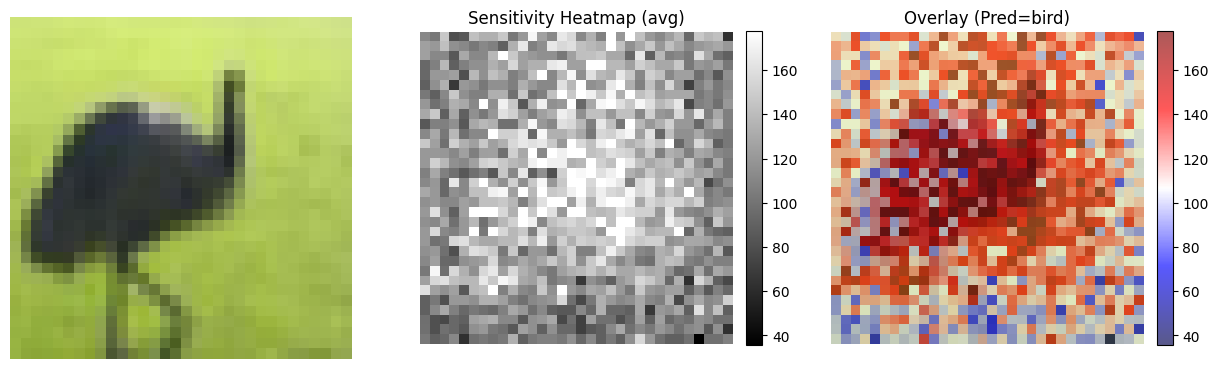

0.03 0.05


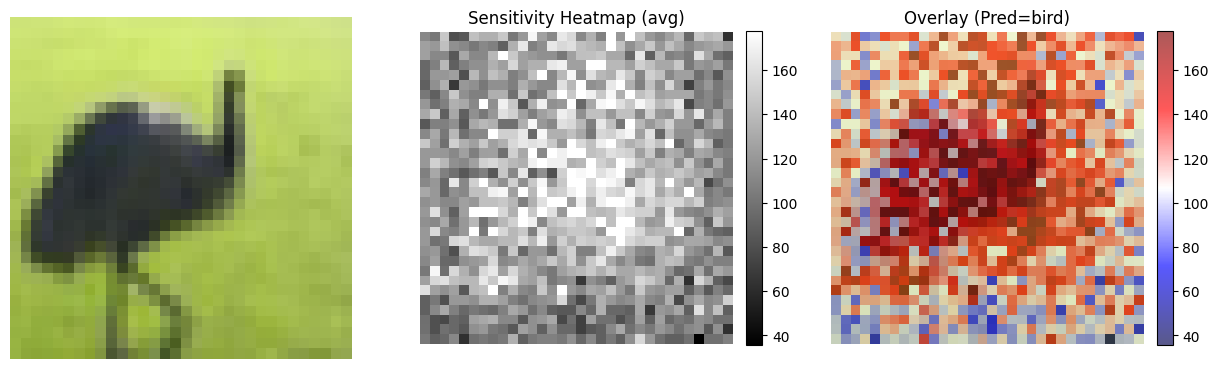

0.03 0.1


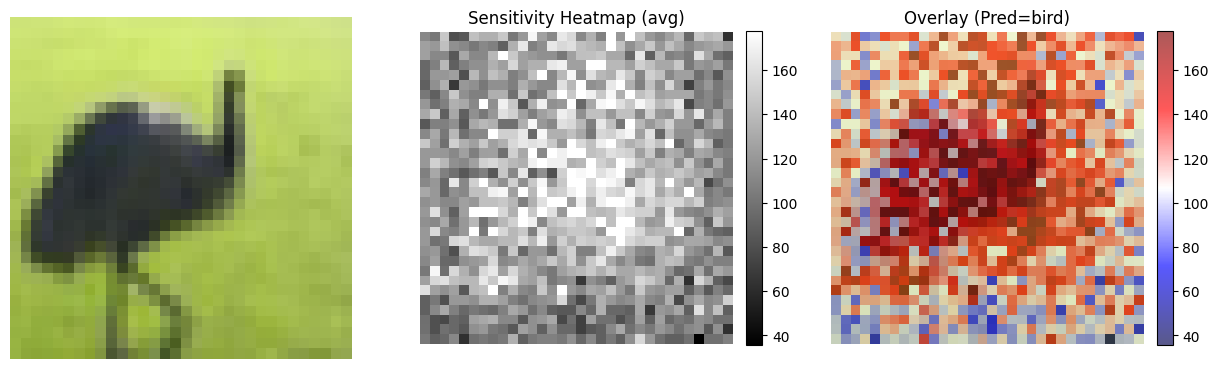

0.03 0.15


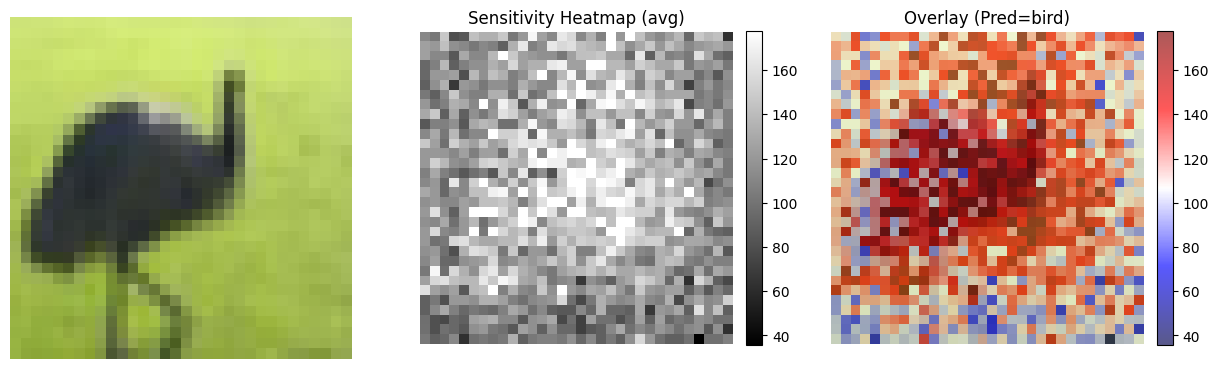

0.03 0.2


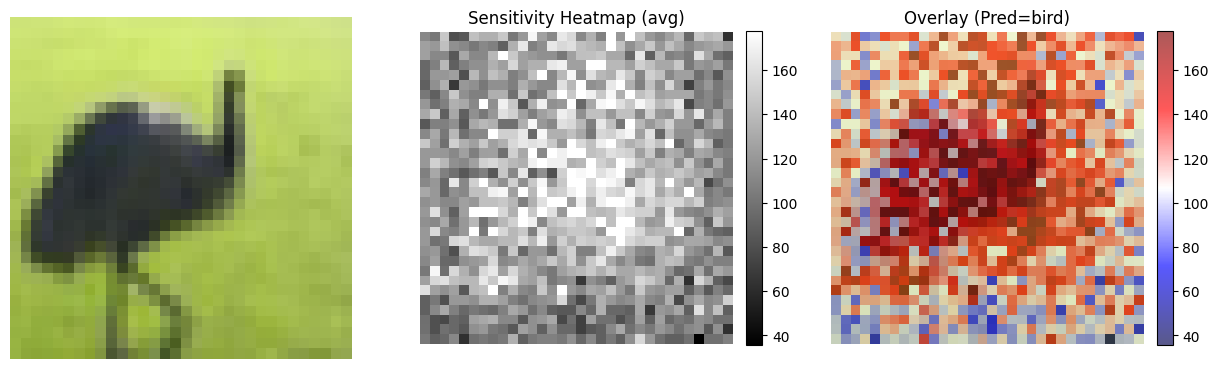

0.1 0.01


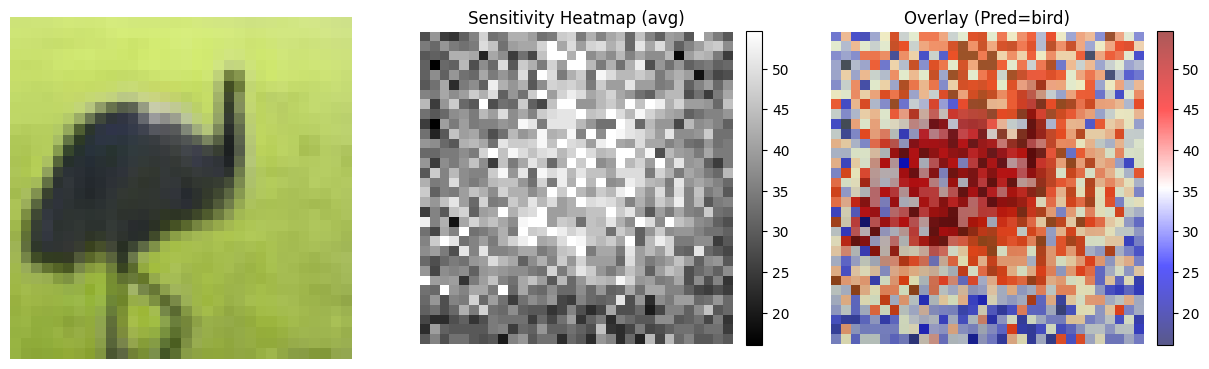

0.1 0.05


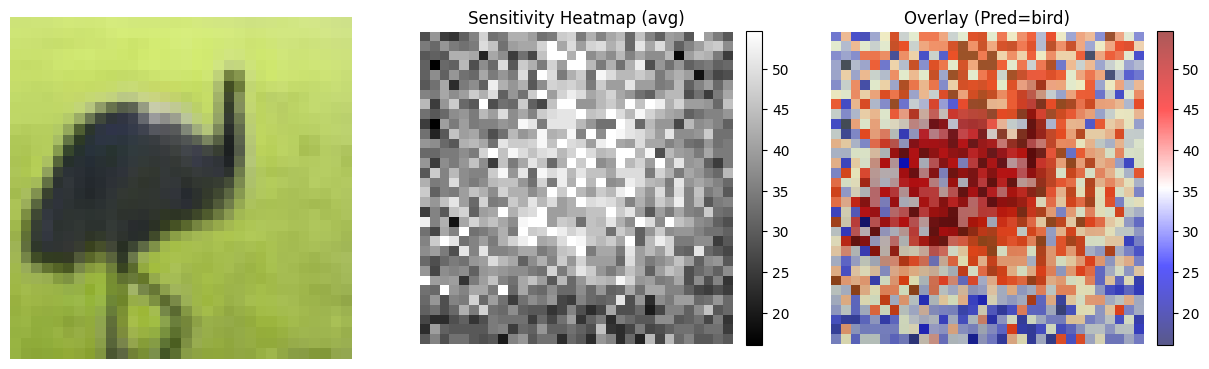

0.1 0.1


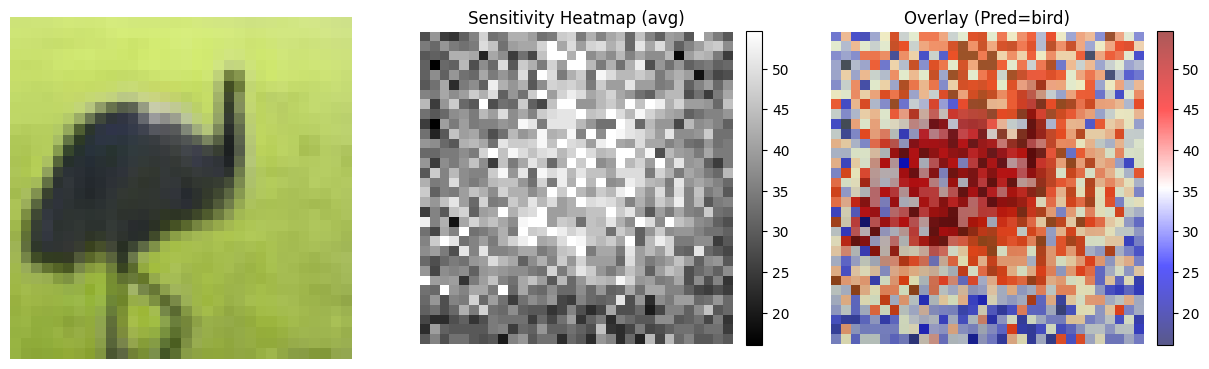

0.1 0.15


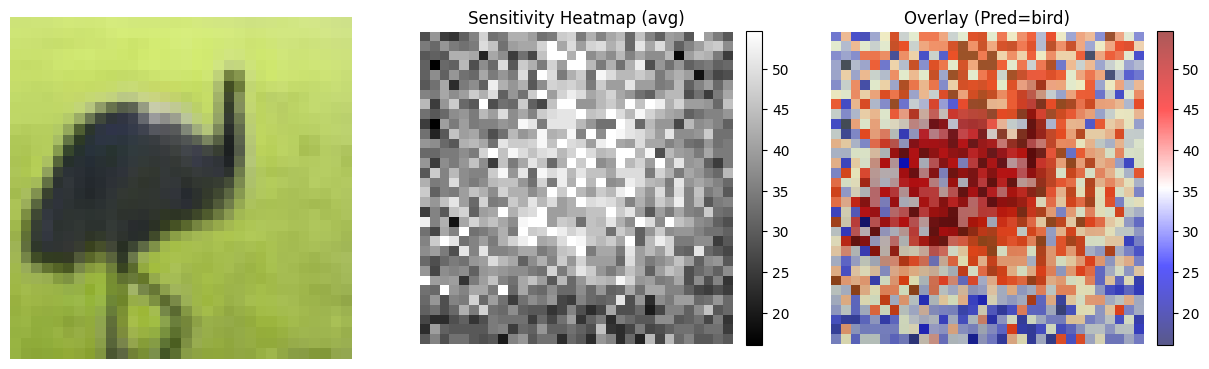

0.1 0.2


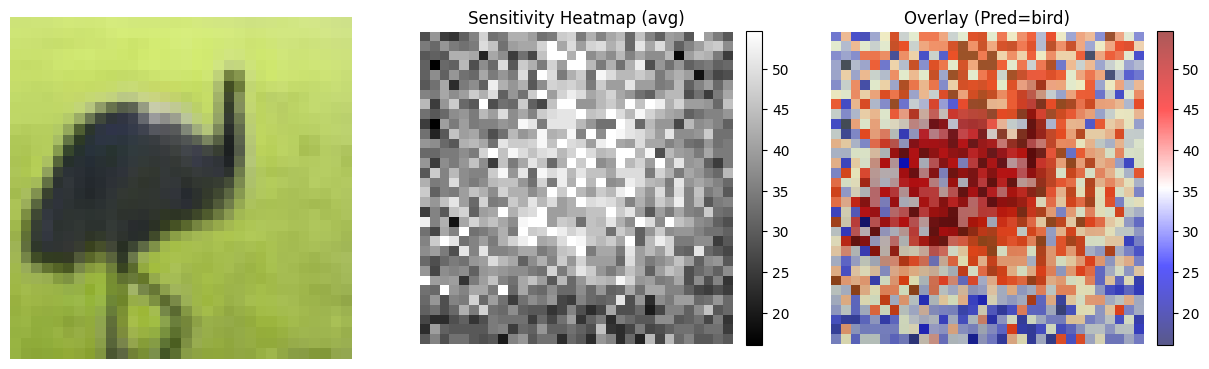

0.3 0.01


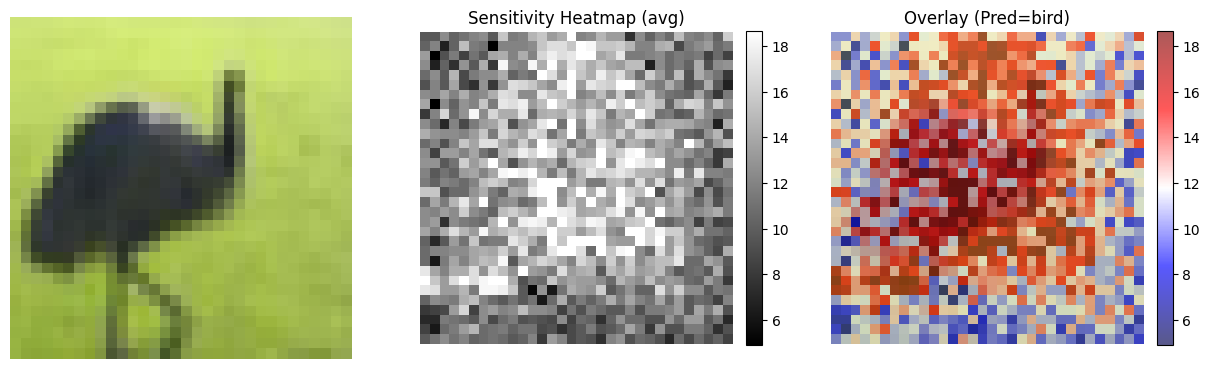

0.3 0.05


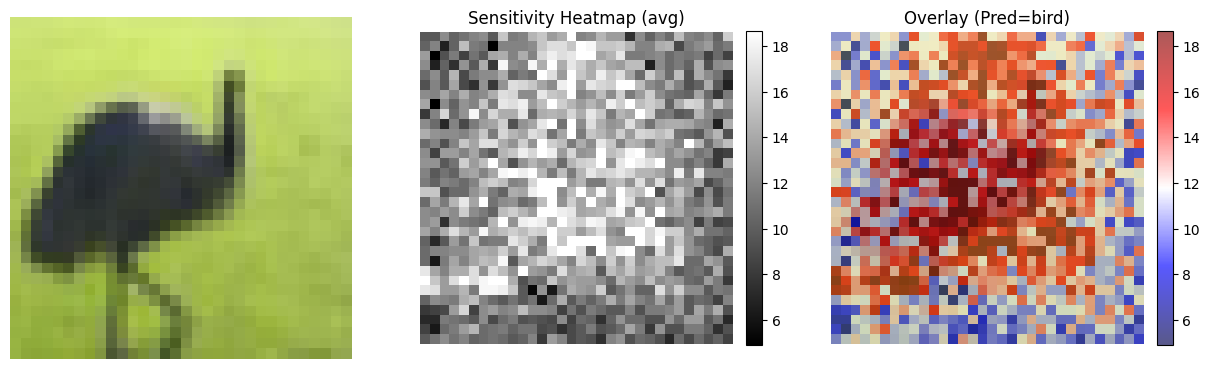

0.3 0.1


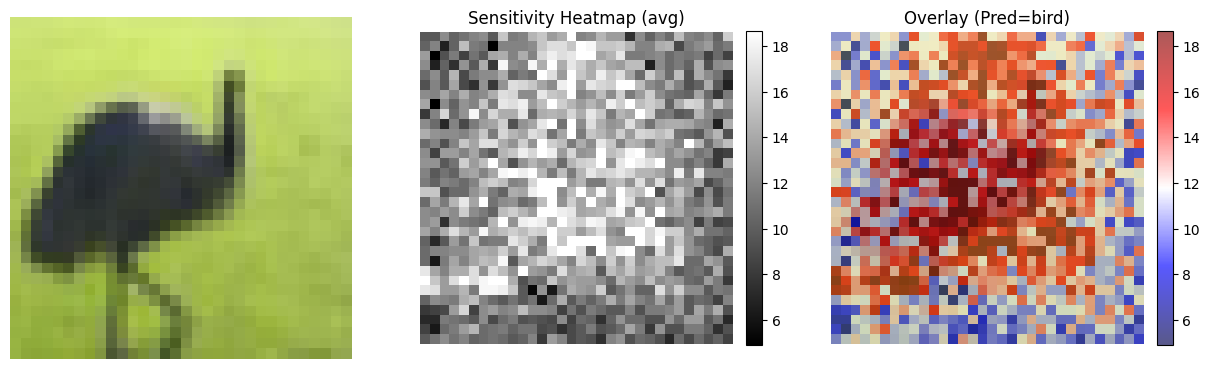

0.3 0.15


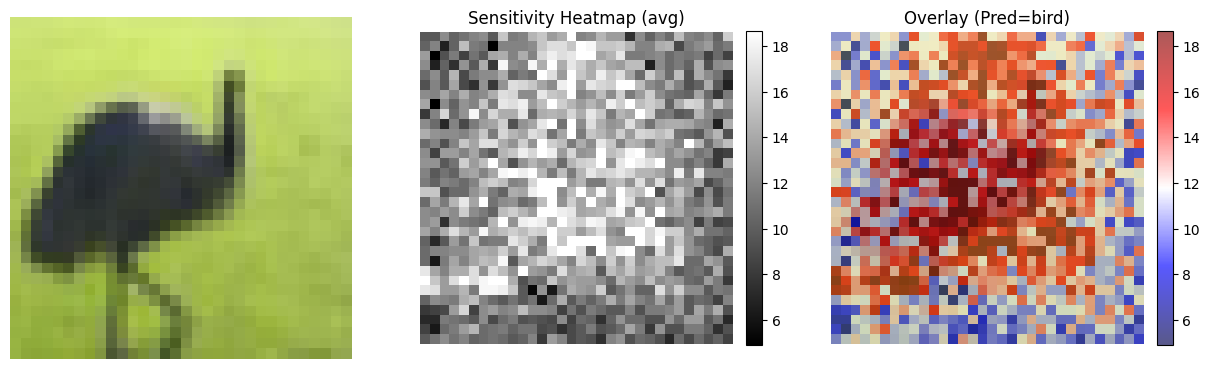

0.3 0.2


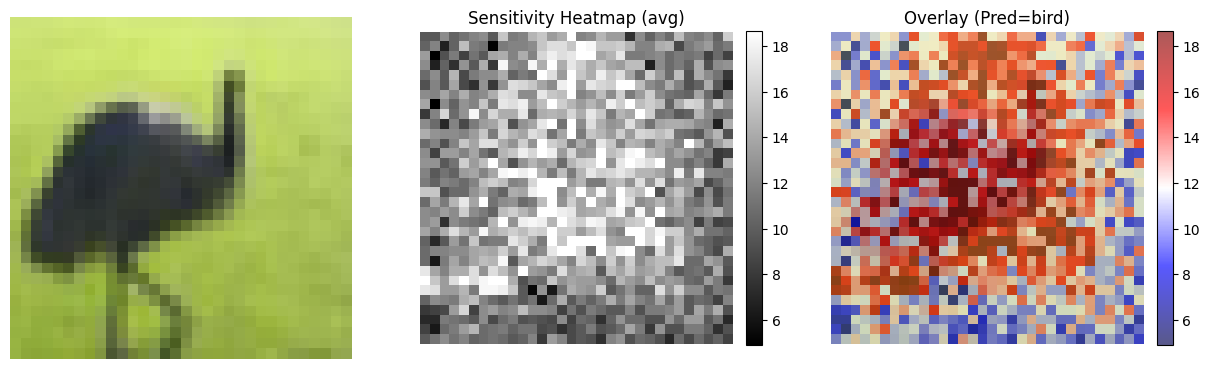

0.5 0.01


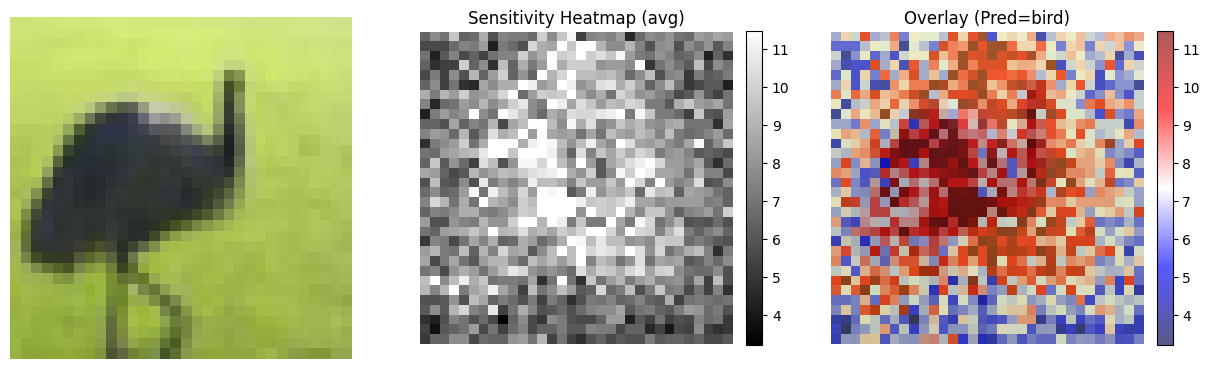

0.5 0.05


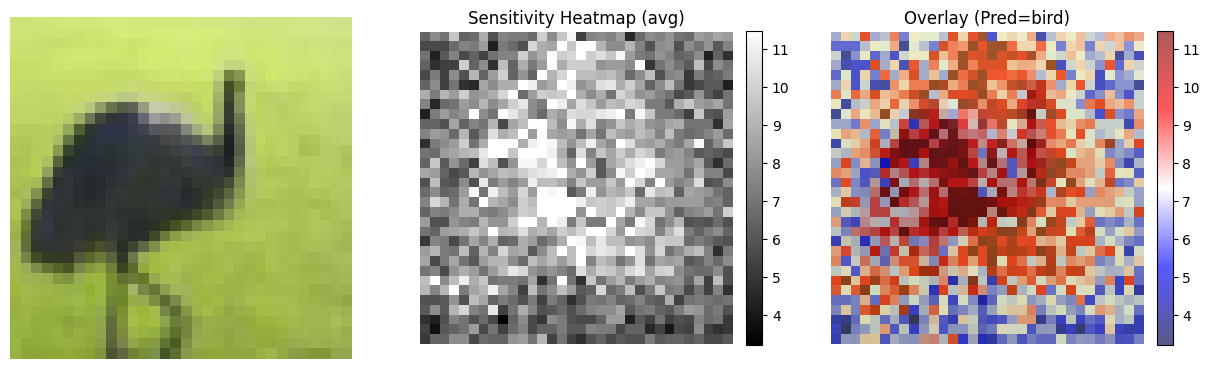

0.5 0.1


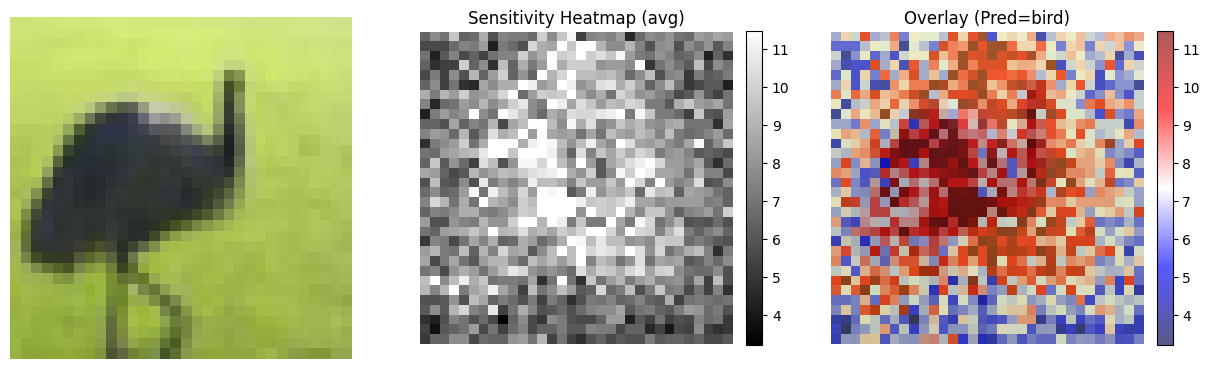

0.5 0.15


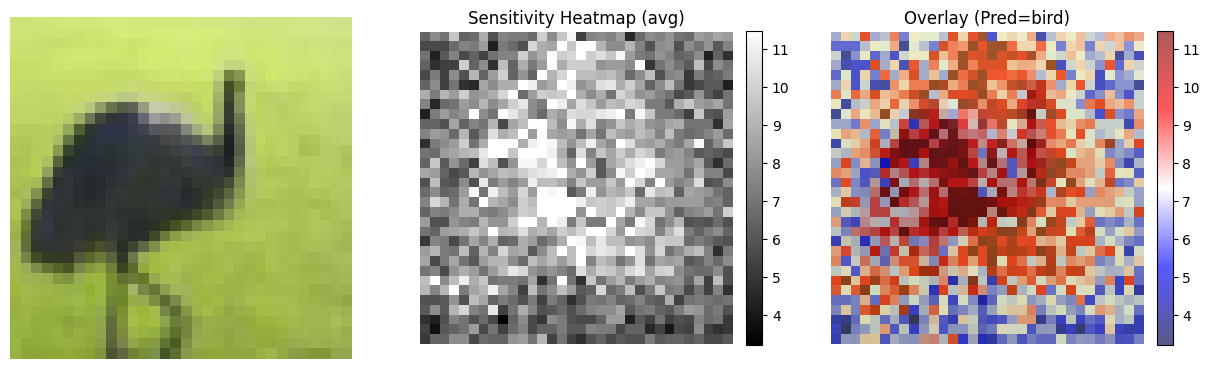

0.5 0.2


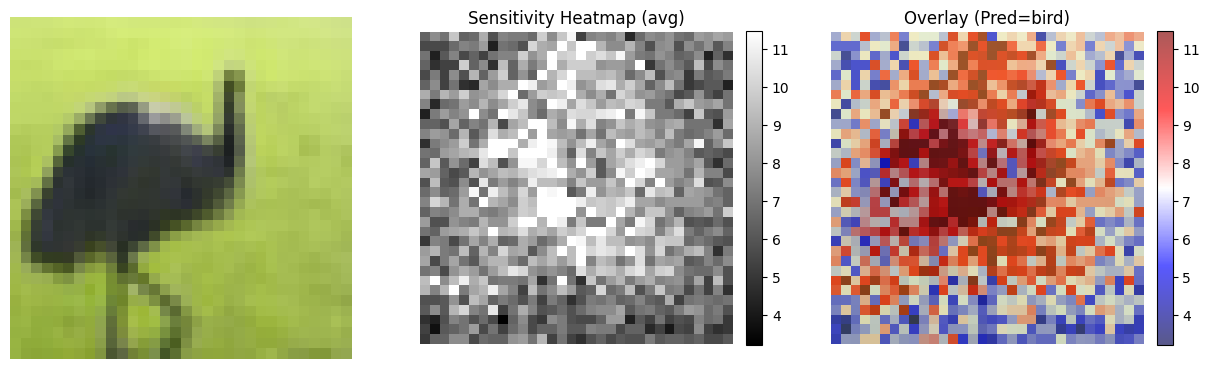

1.0 0.01


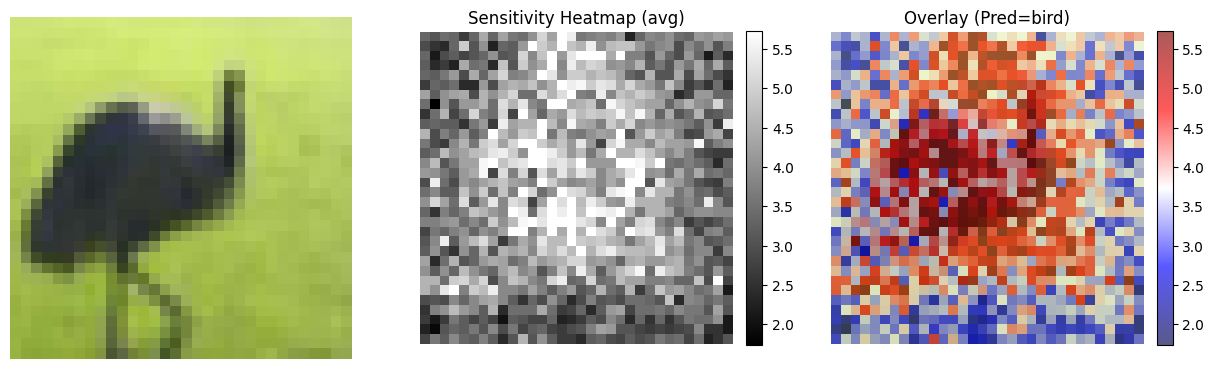

1.0 0.05


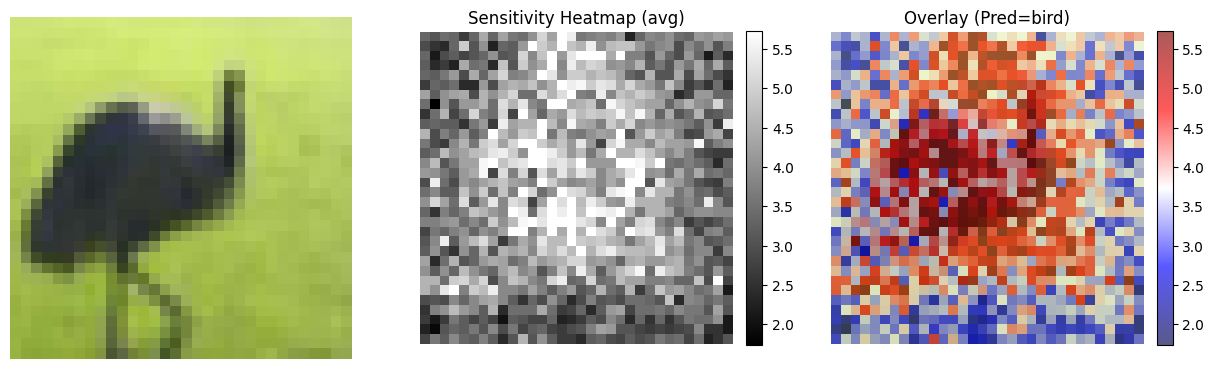

1.0 0.1


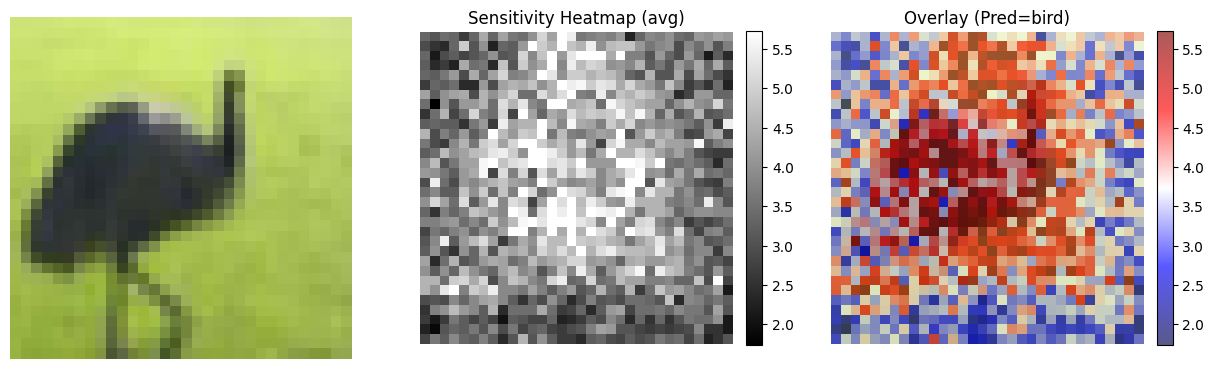

1.0 0.15


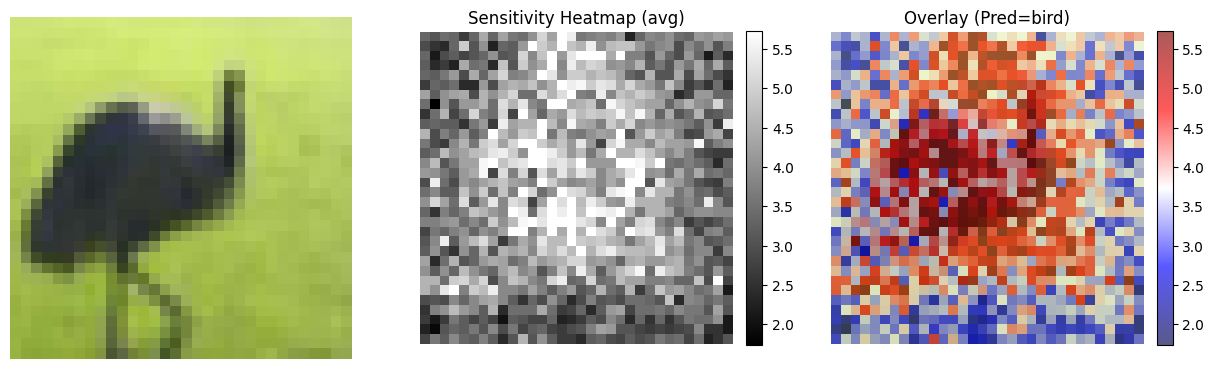

1.0 0.2


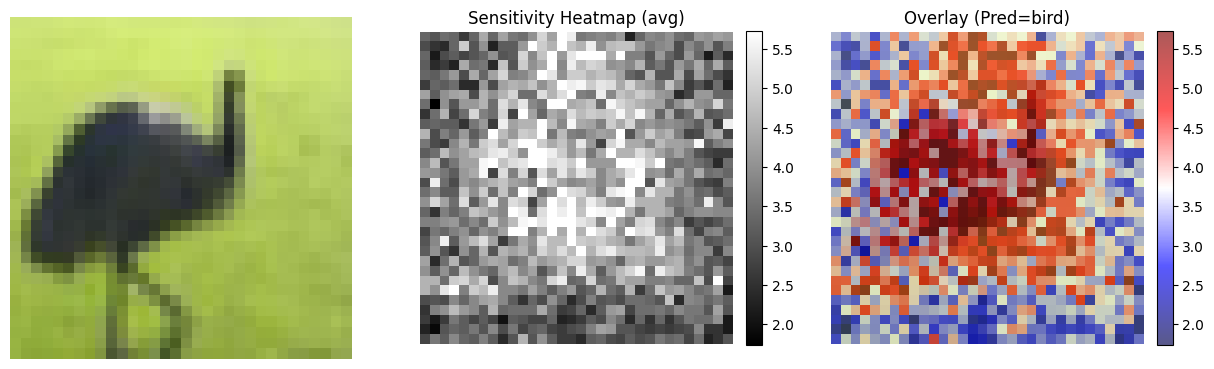

0.0001 0.01


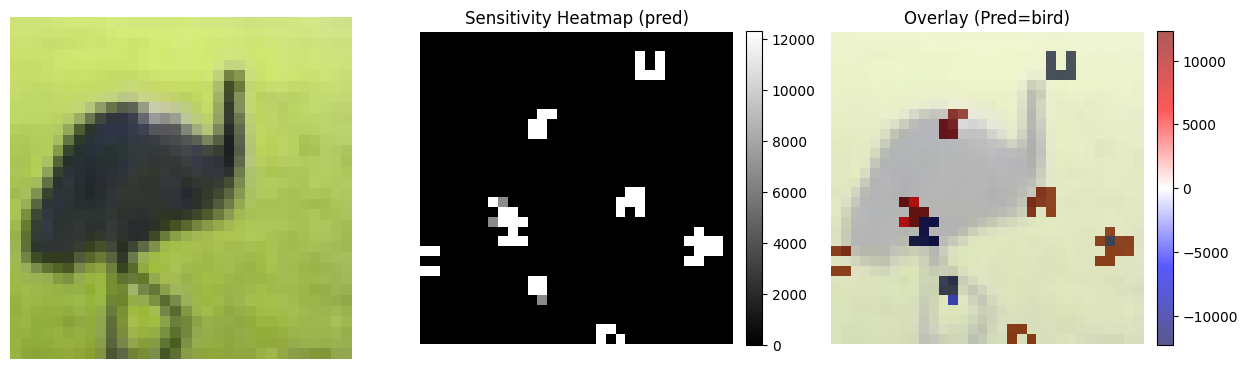

0.0001 0.05


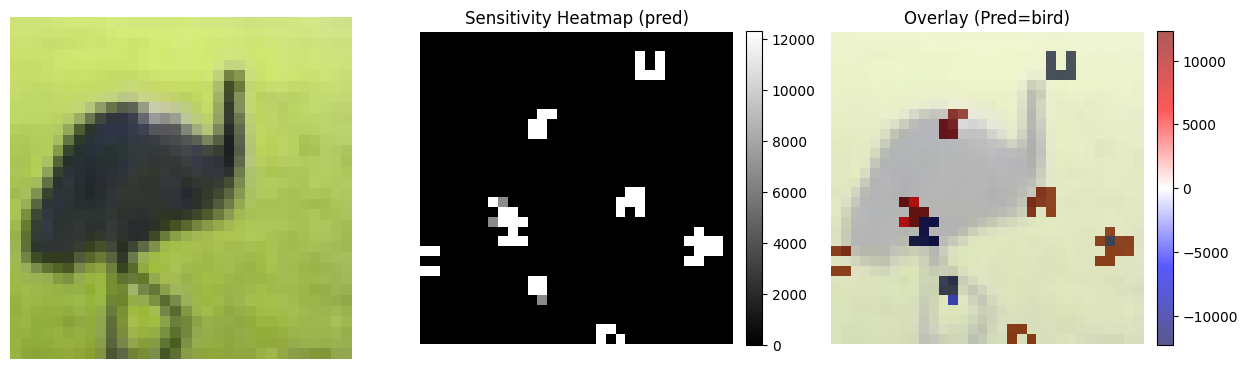

0.0001 0.1


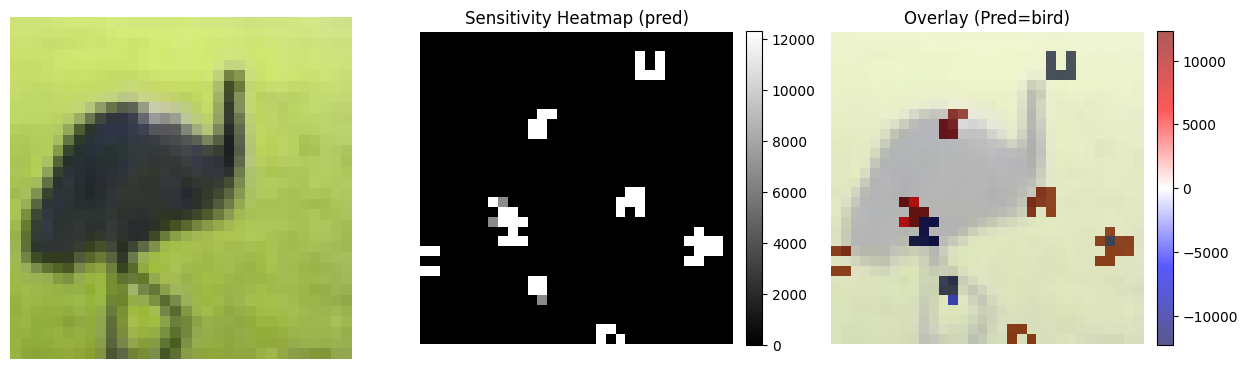

0.0001 0.15


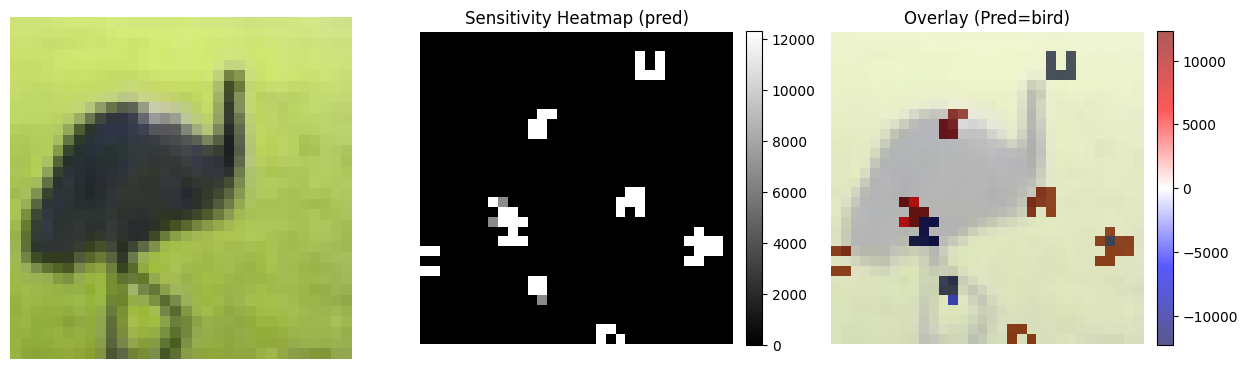

0.0001 0.2


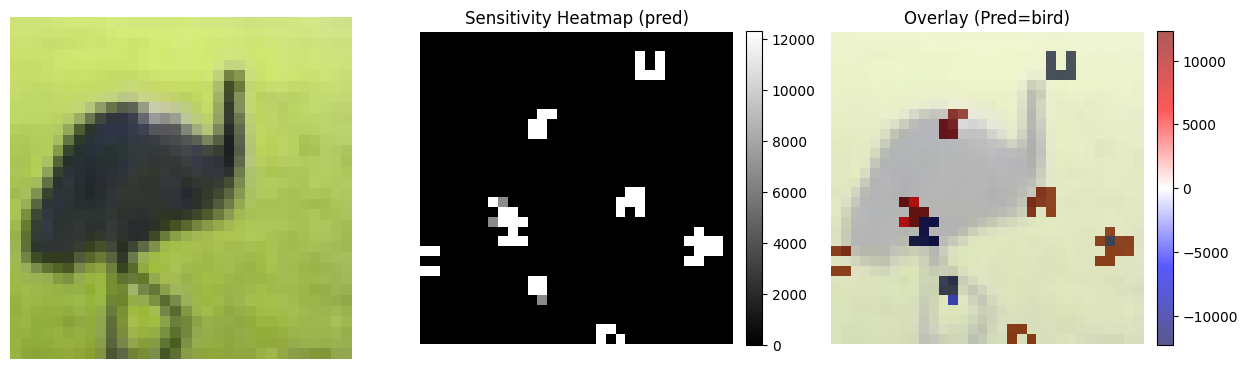

0.0005 0.01


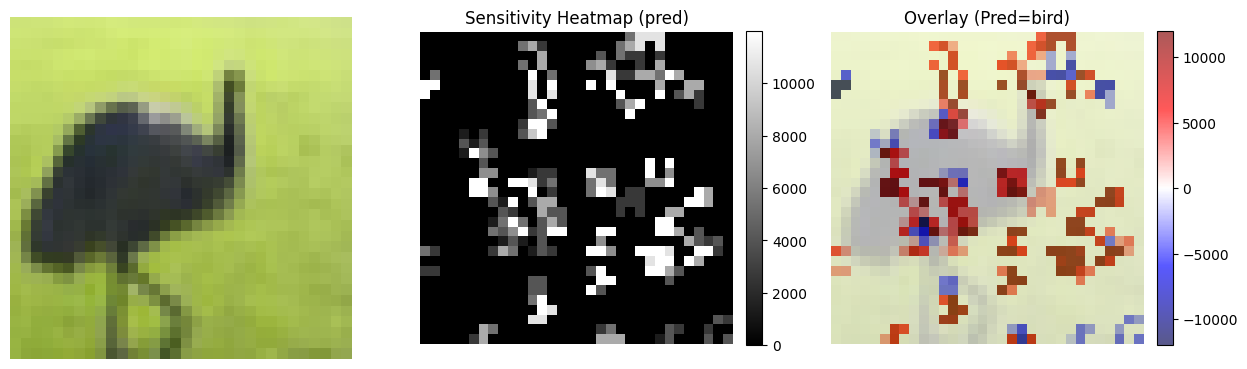

0.0005 0.05


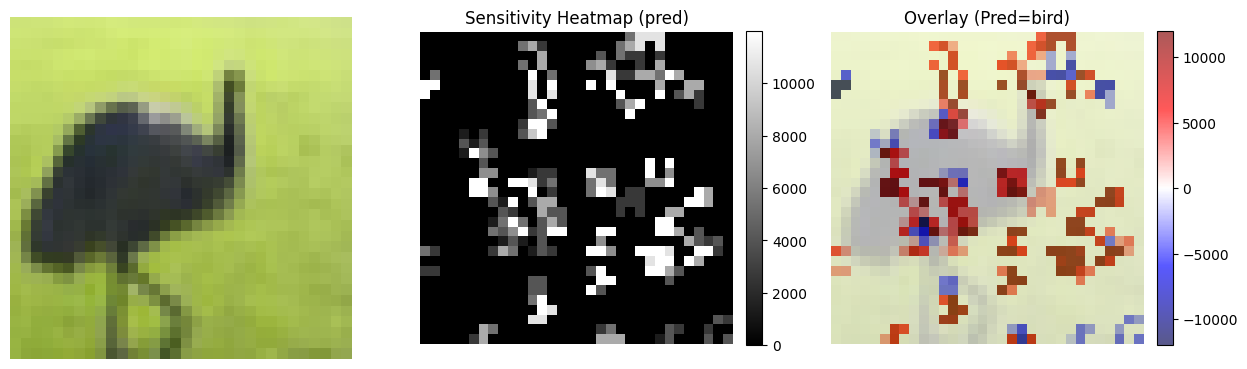

0.0005 0.1


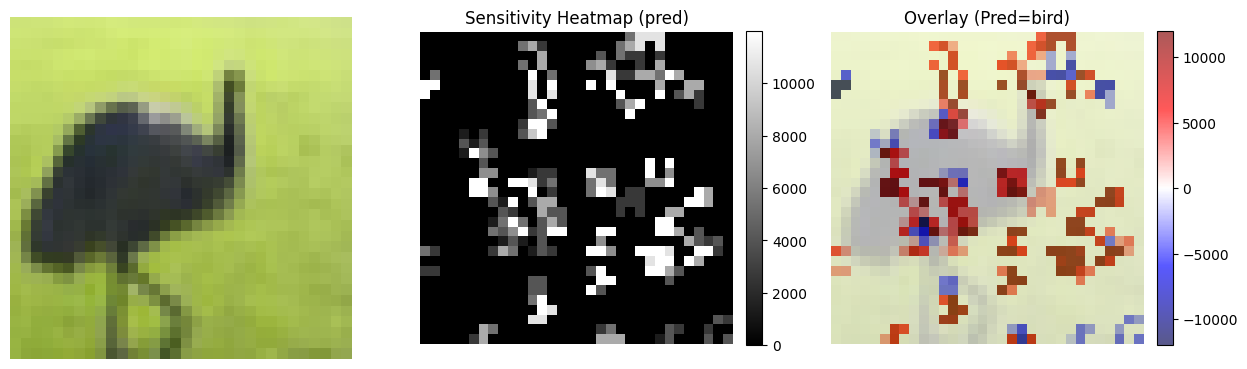

0.0005 0.15


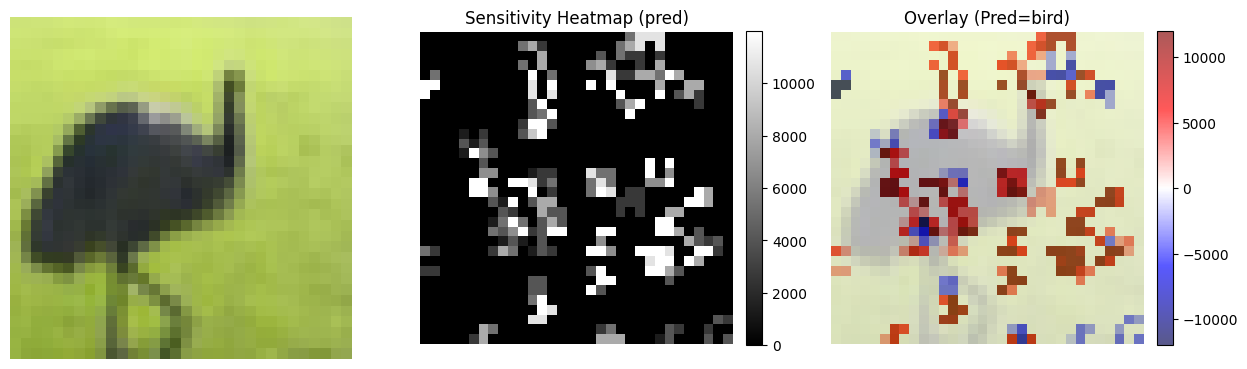

0.0005 0.2


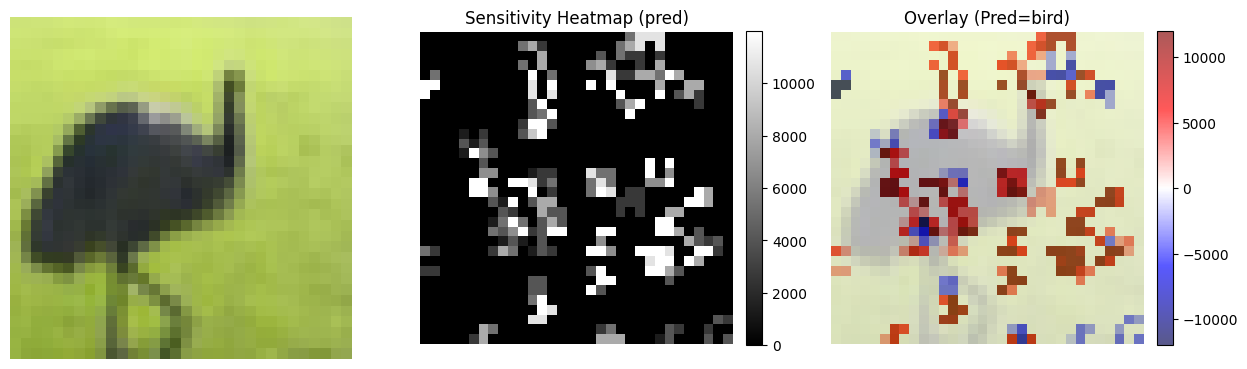

0.0007 0.01


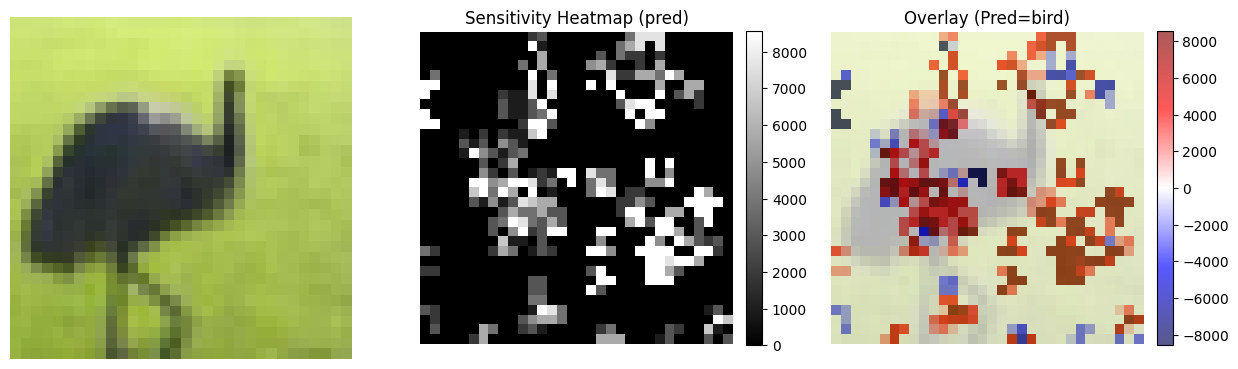

0.0007 0.05


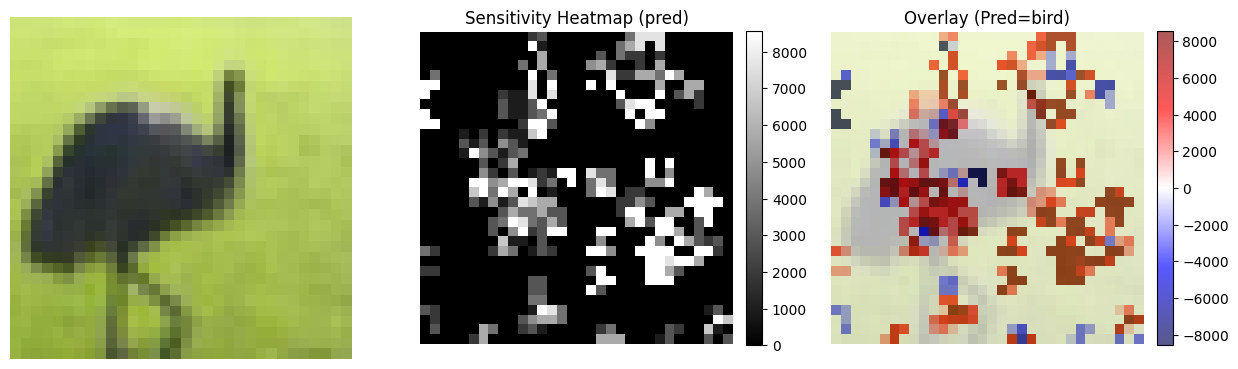

0.0007 0.1


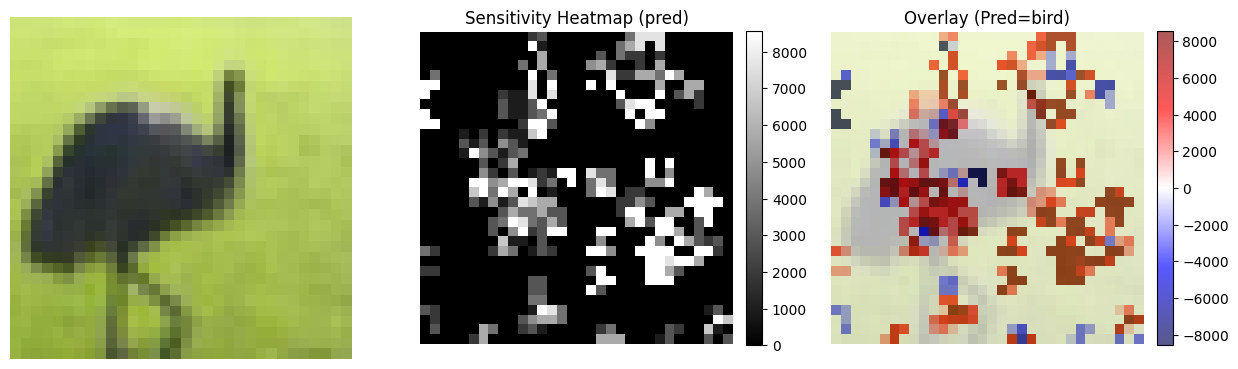

0.0007 0.15


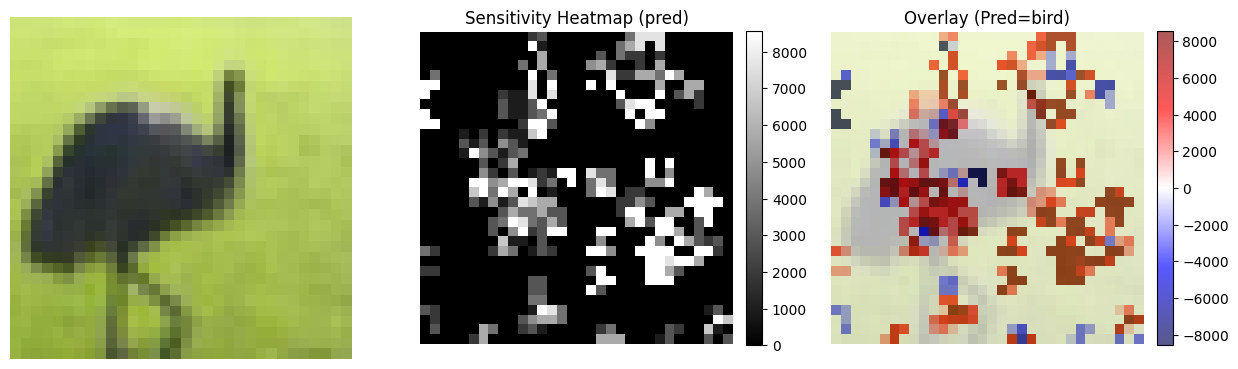

0.0007 0.2


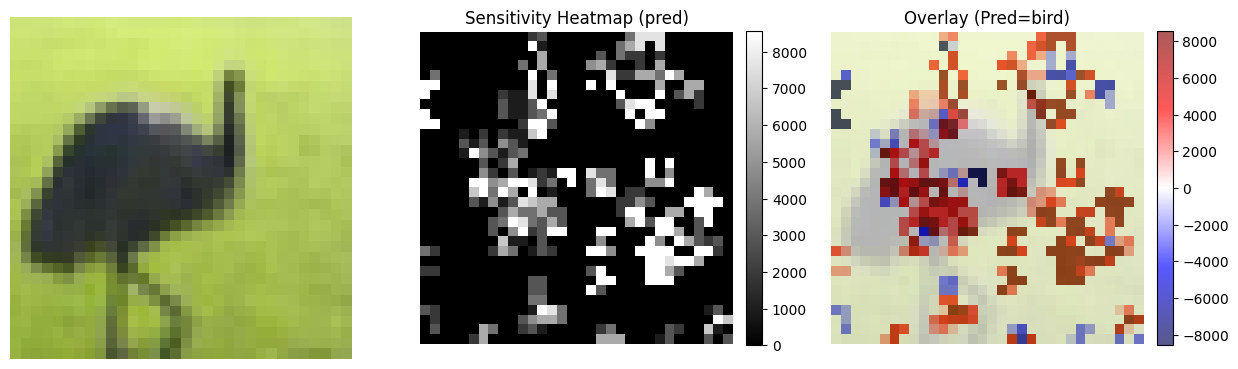

0.001 0.01


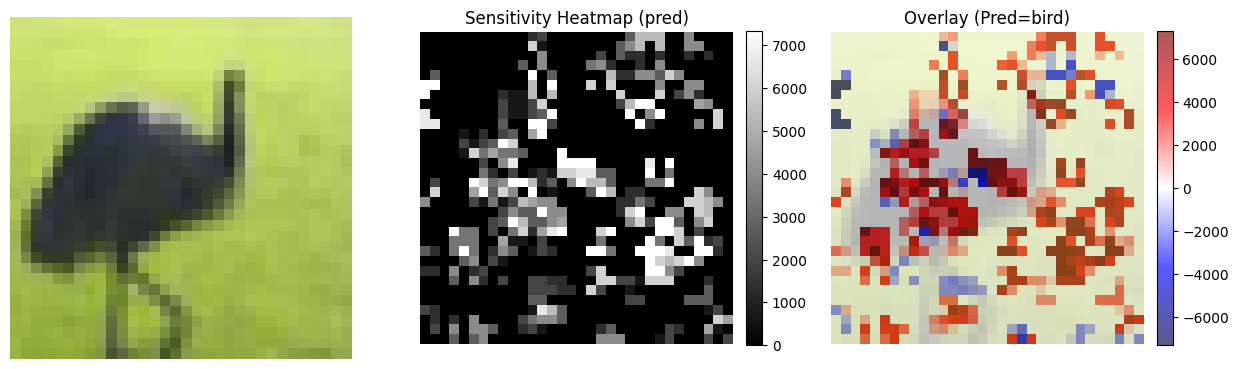

0.001 0.05


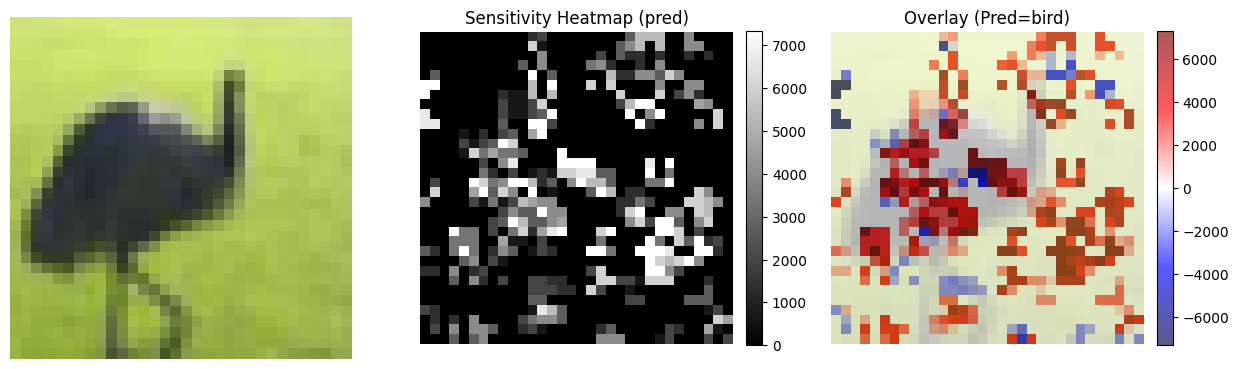

0.001 0.1


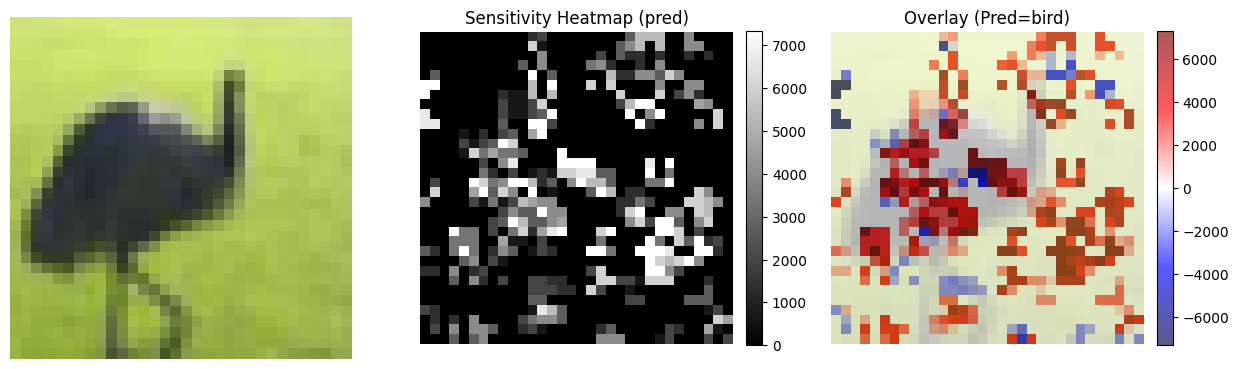

0.001 0.15


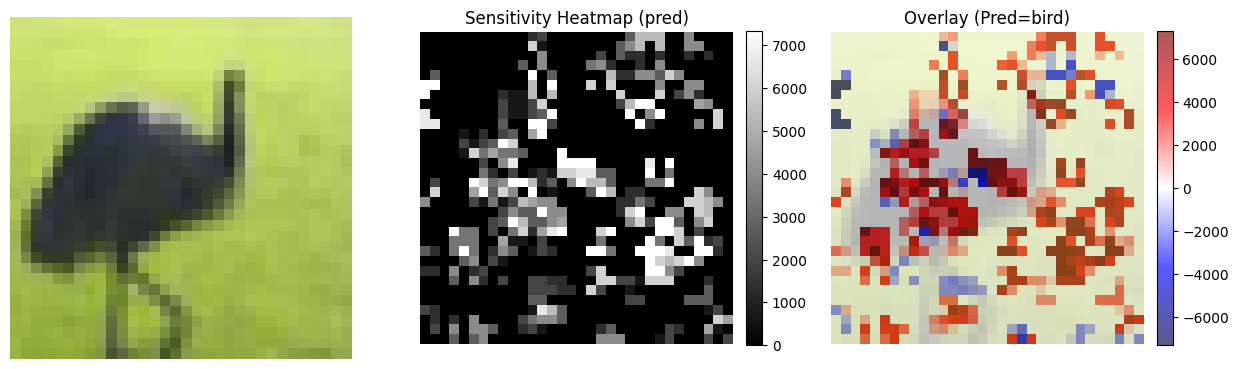

0.001 0.2


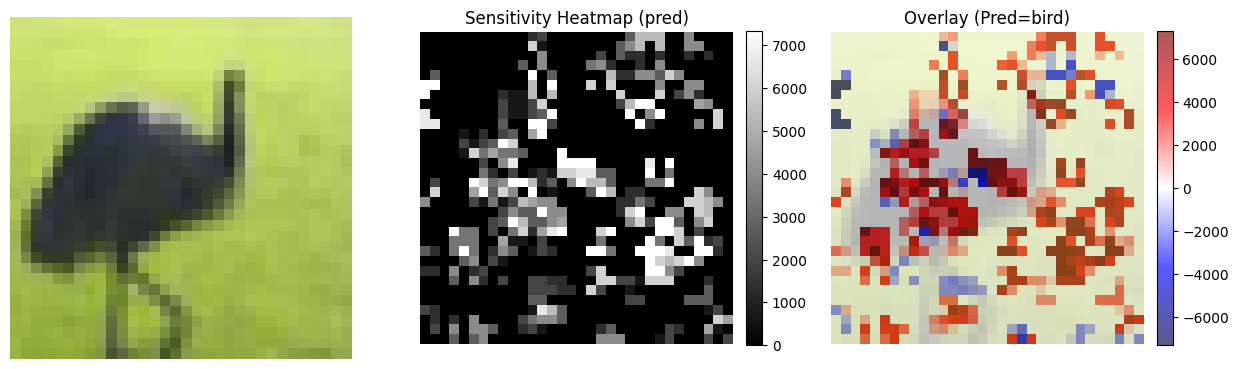

0.005 0.01


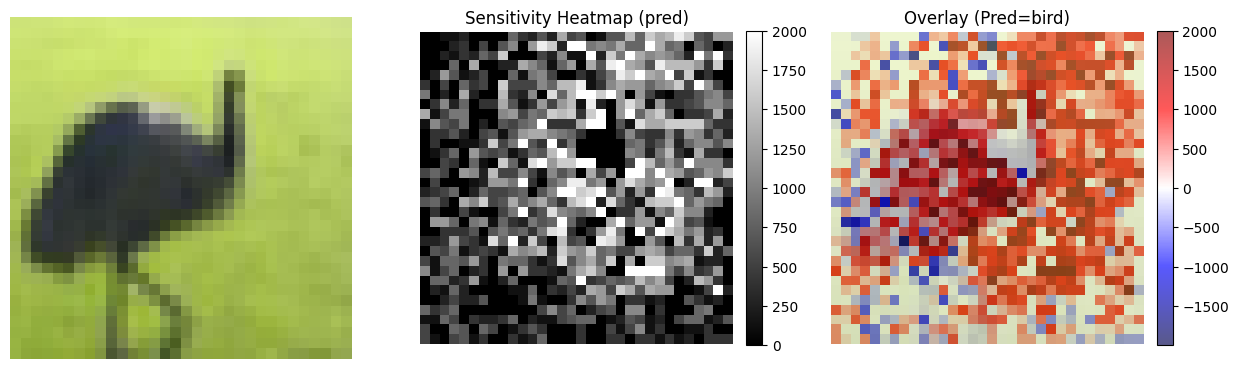

0.005 0.05


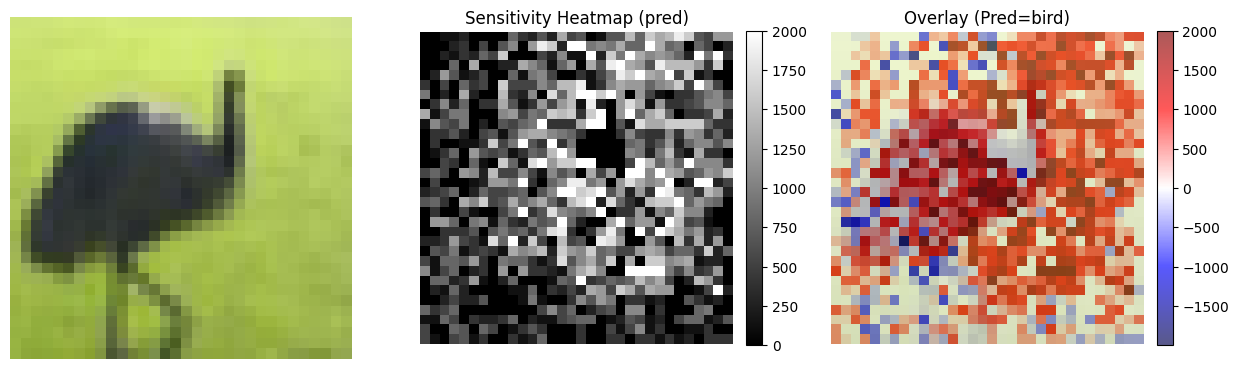

0.005 0.1


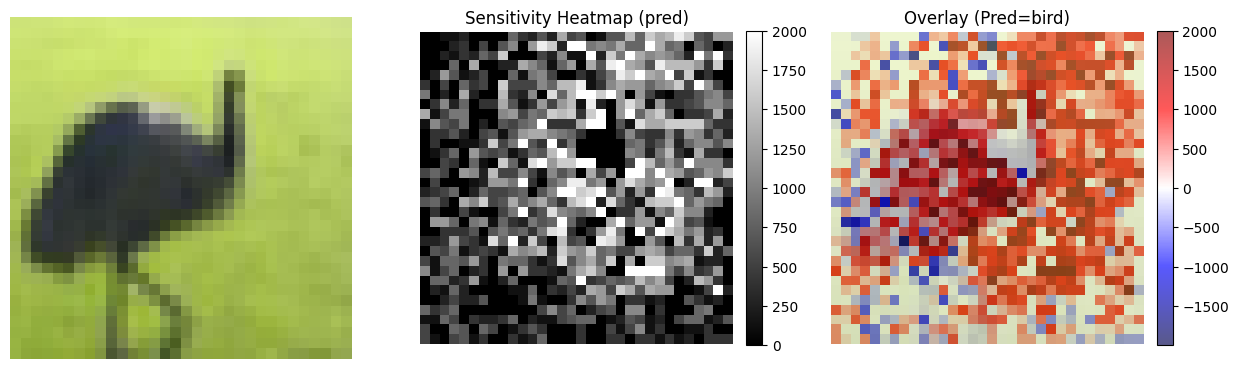

0.005 0.15


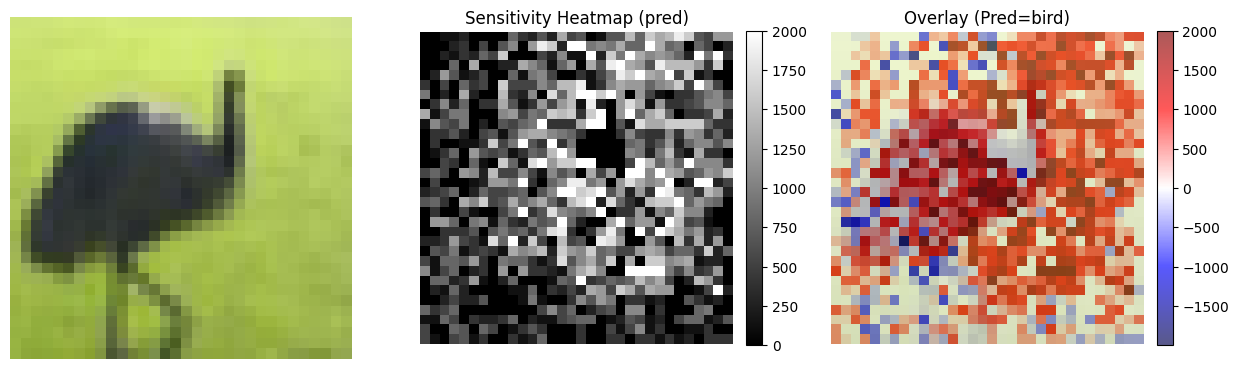

0.005 0.2


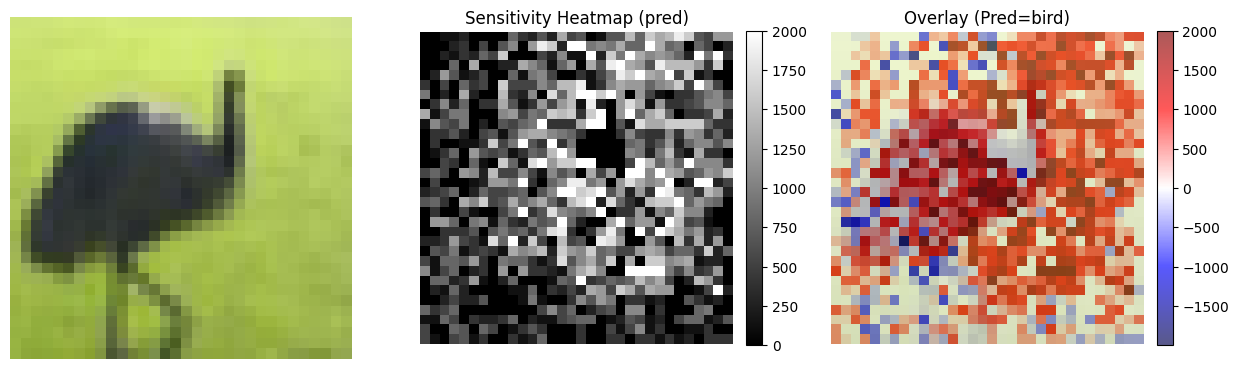

0.01 0.01


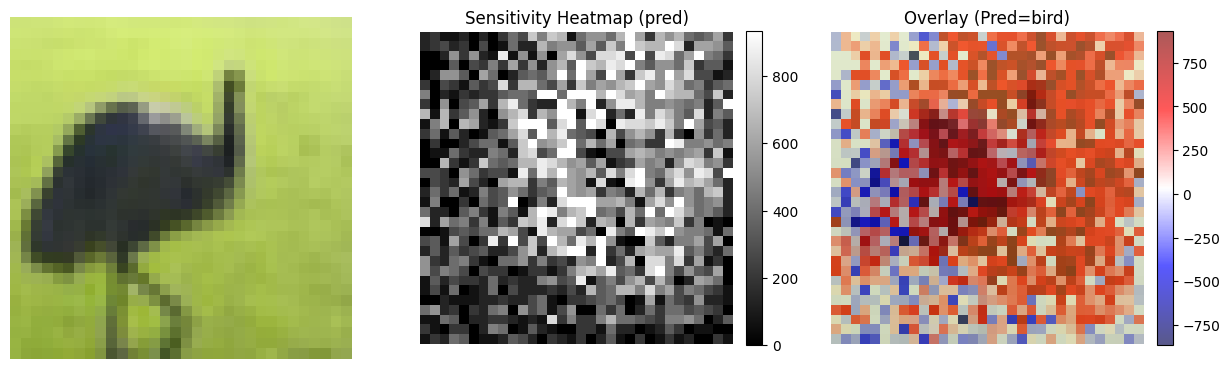

0.01 0.05


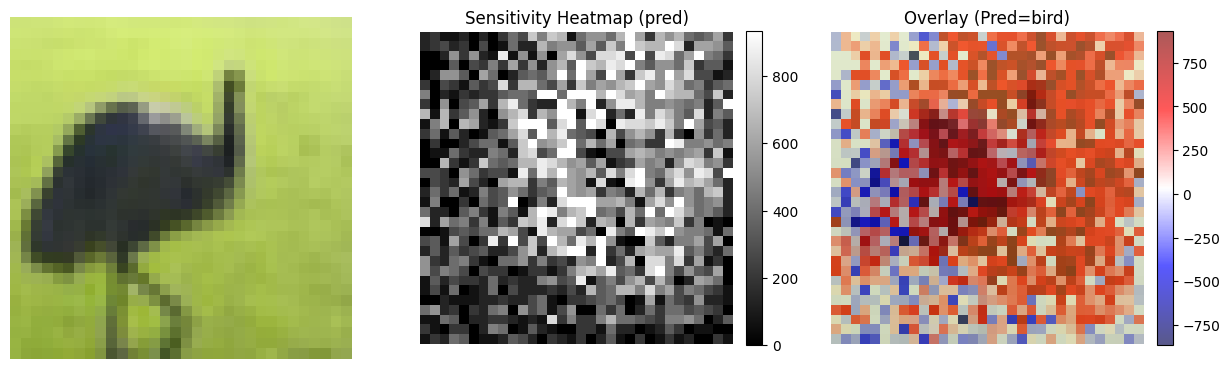

0.01 0.1


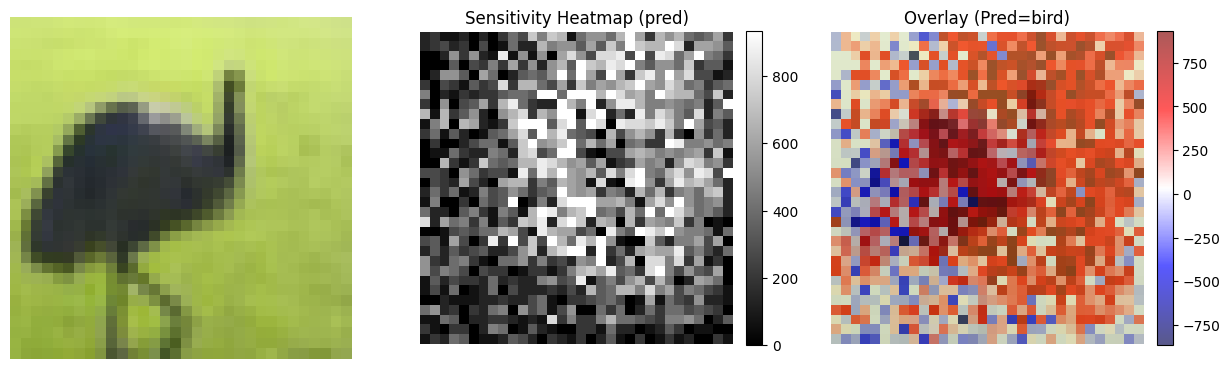

0.01 0.15


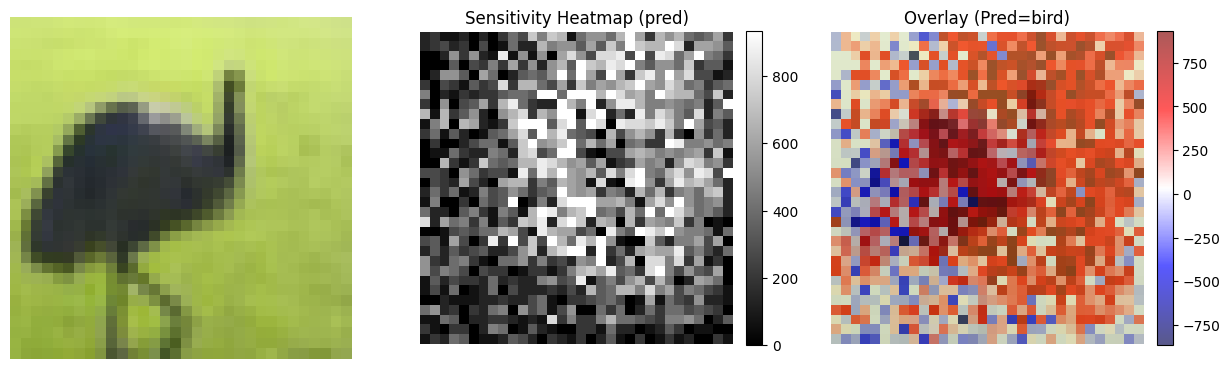

0.01 0.2


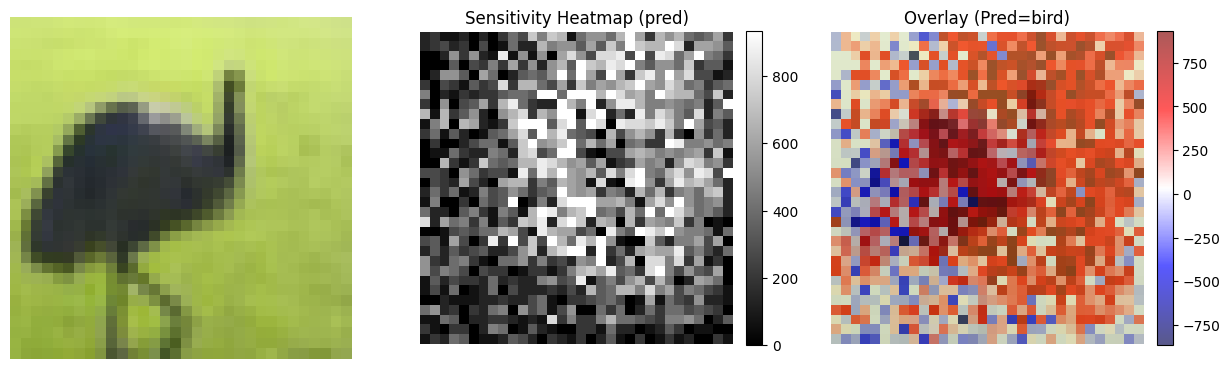

0.015 0.01


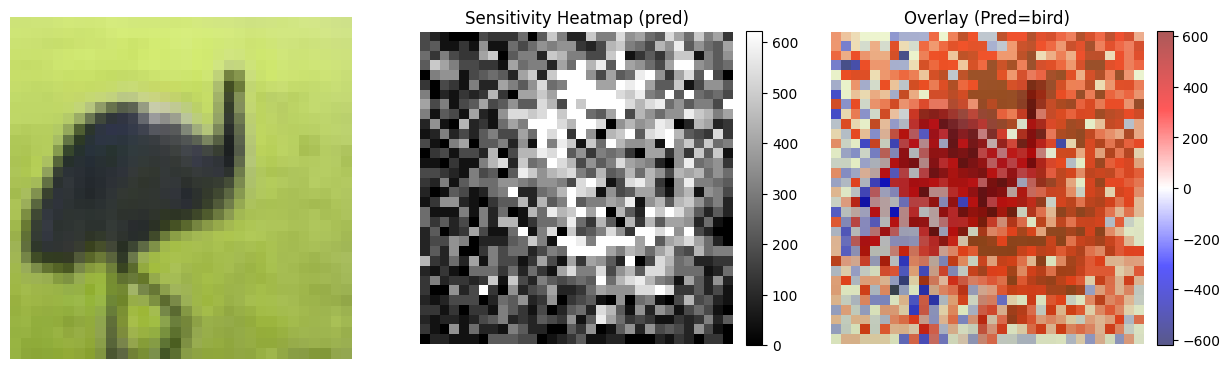

0.015 0.05


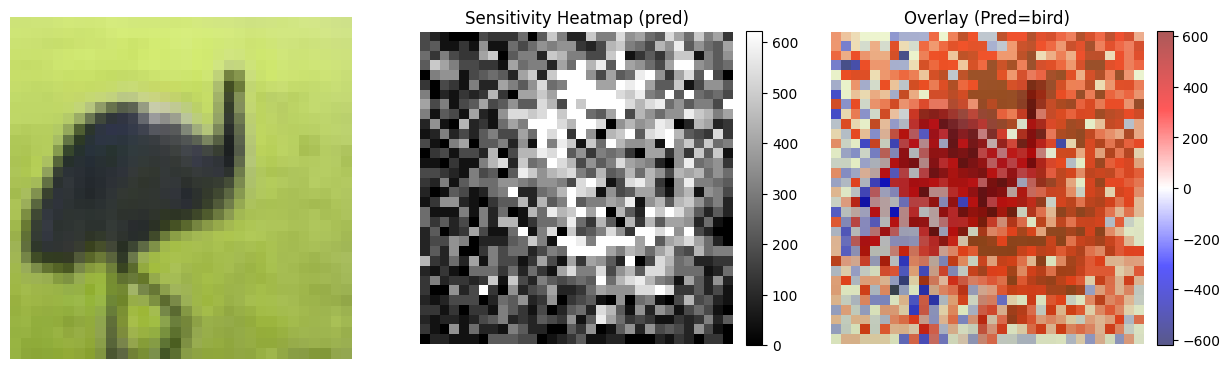

0.015 0.1


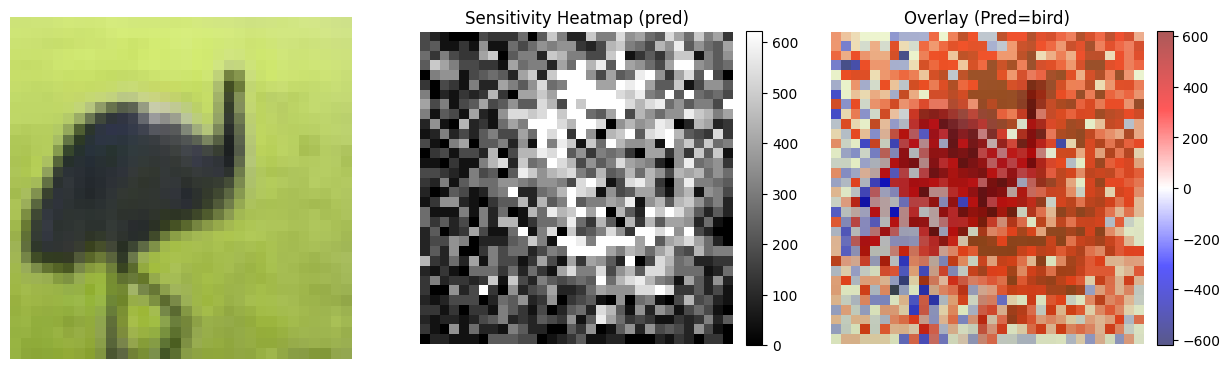

0.015 0.15


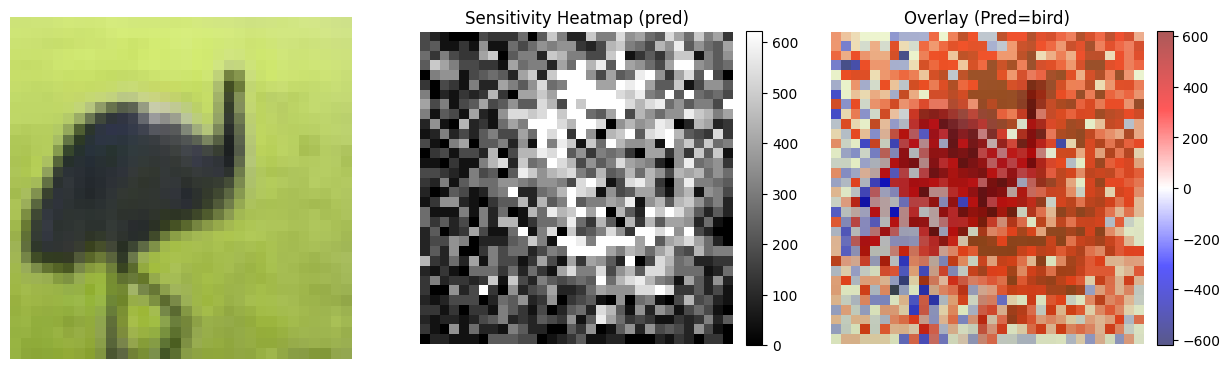

0.015 0.2


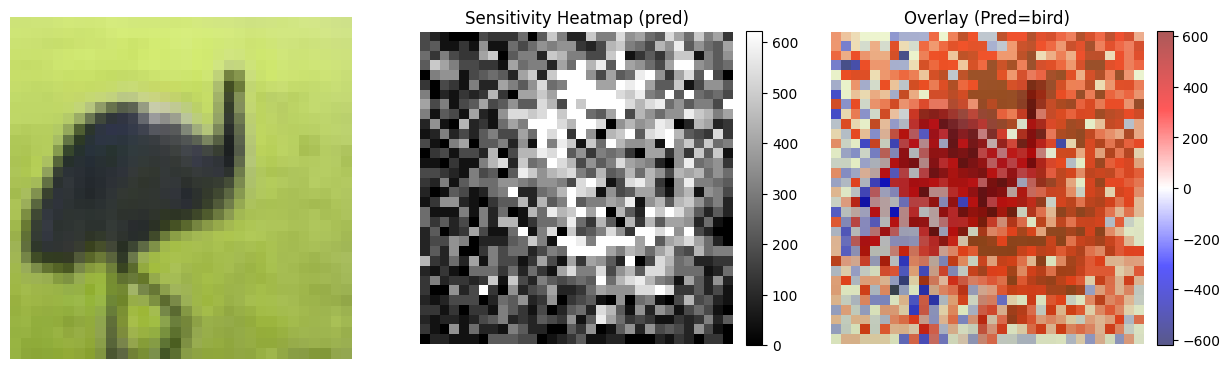

0.02 0.01


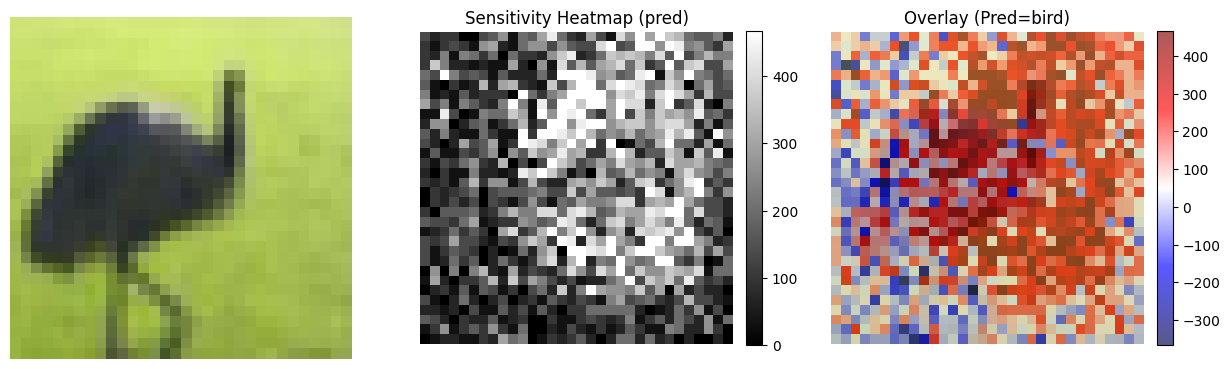

0.02 0.05


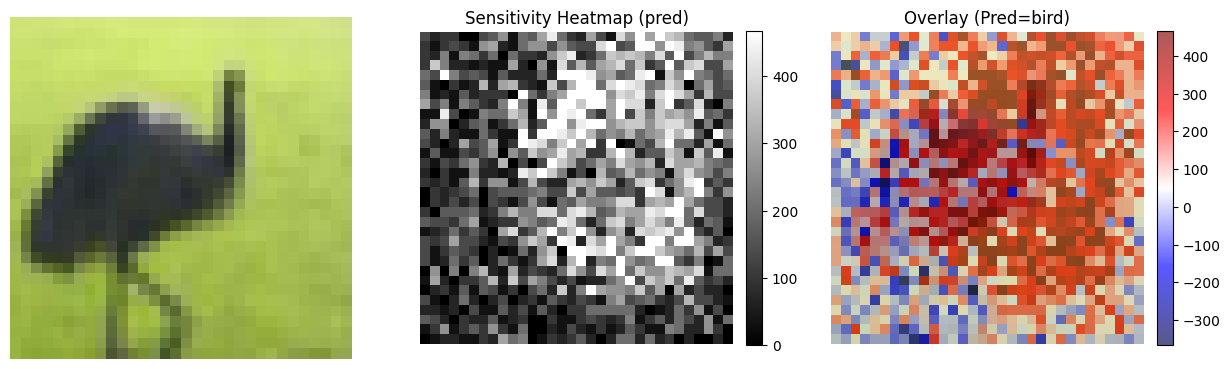

0.02 0.1


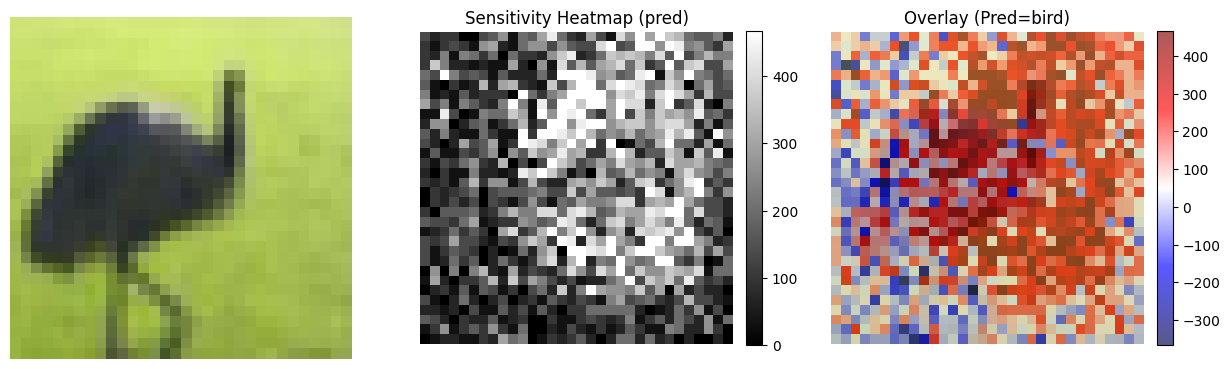

0.02 0.15


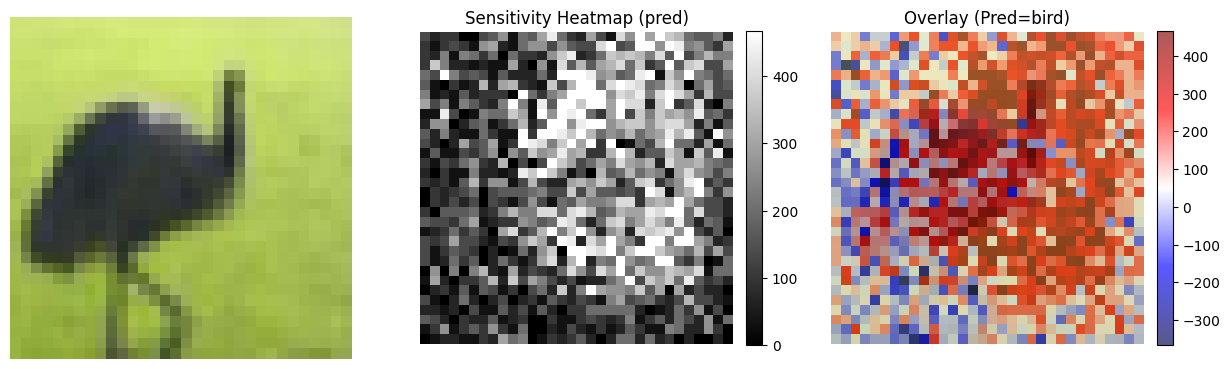

0.02 0.2


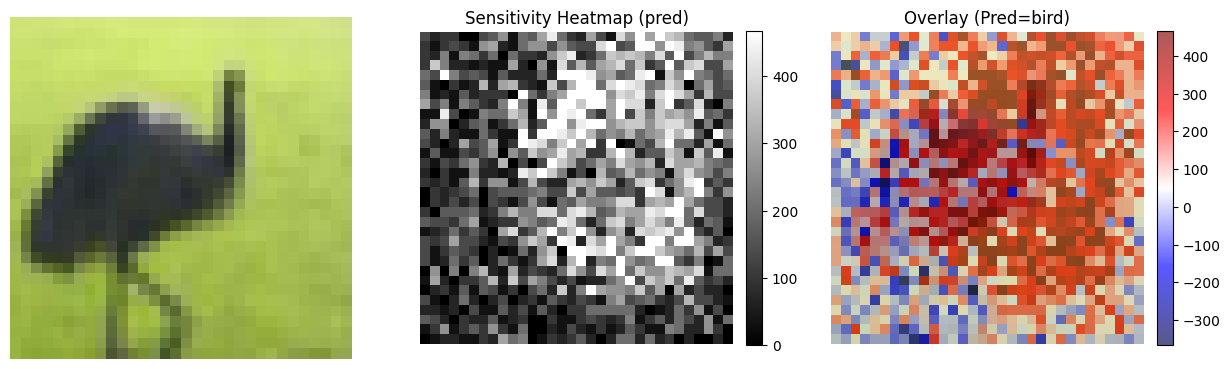

0.03 0.01


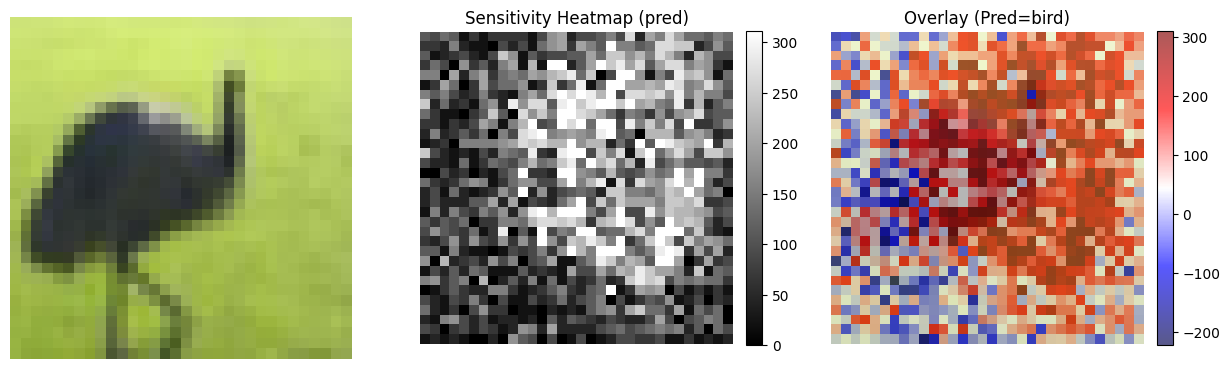

0.03 0.05


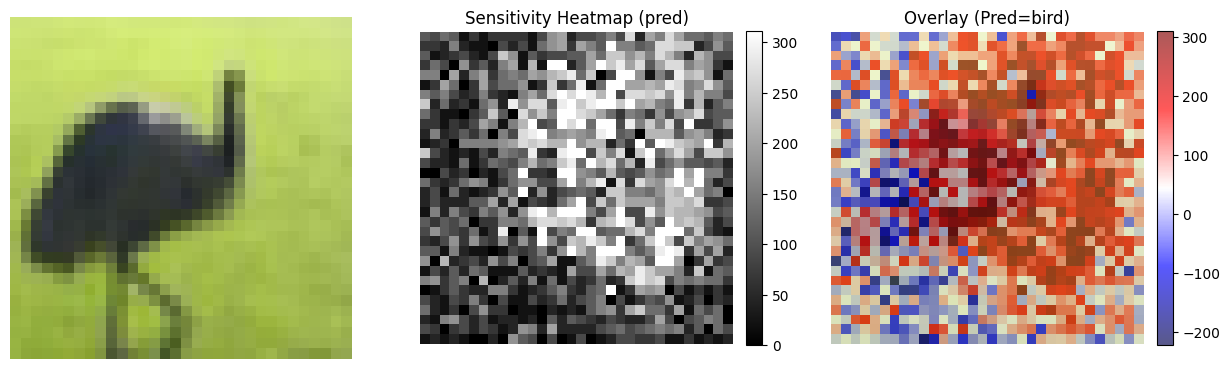

0.03 0.1


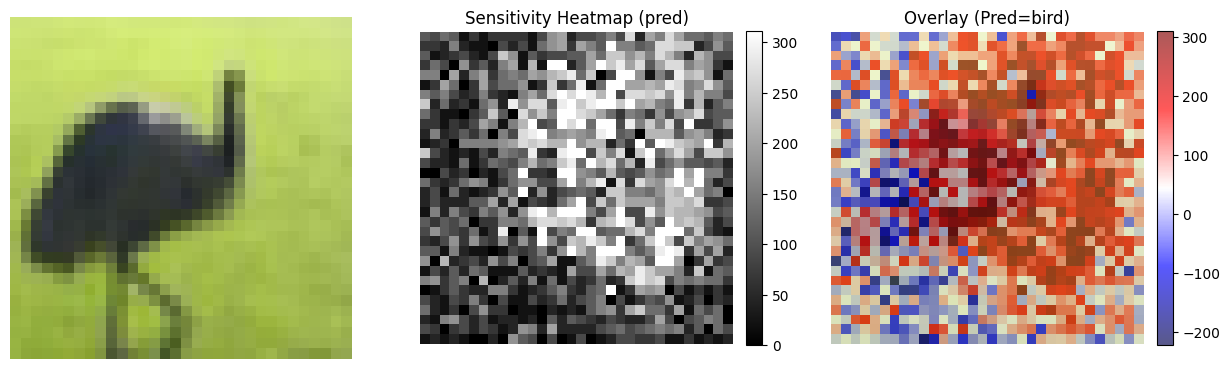

0.03 0.15


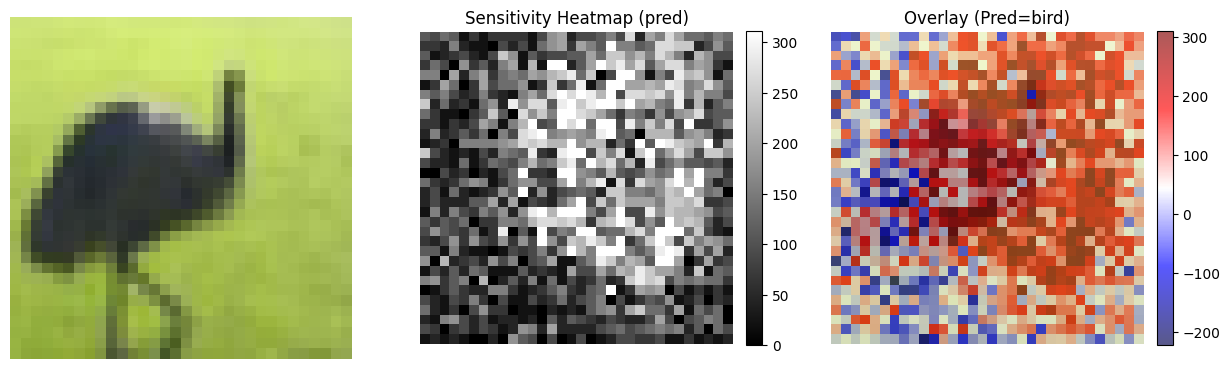

0.03 0.2


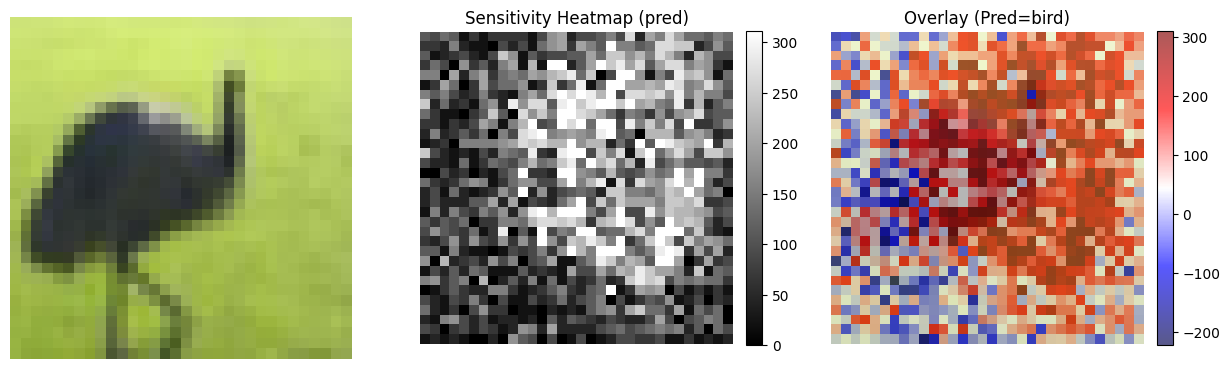

0.1 0.01


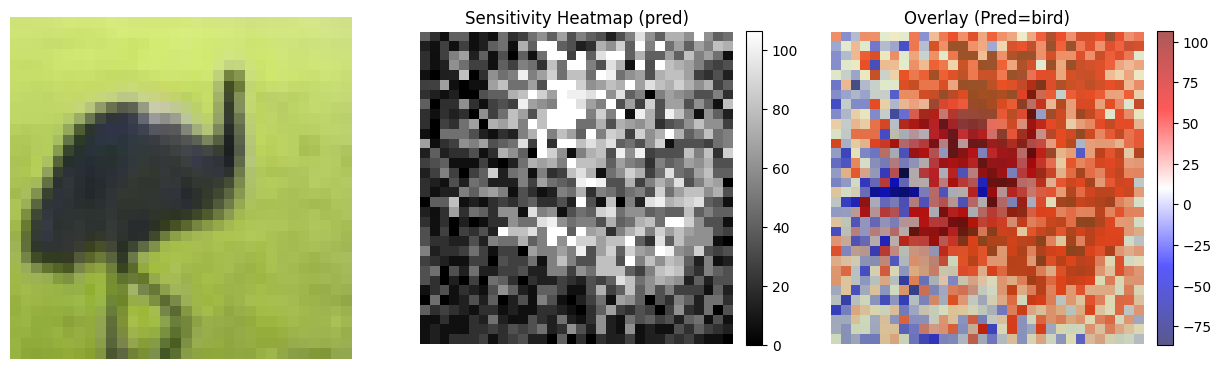

0.1 0.05


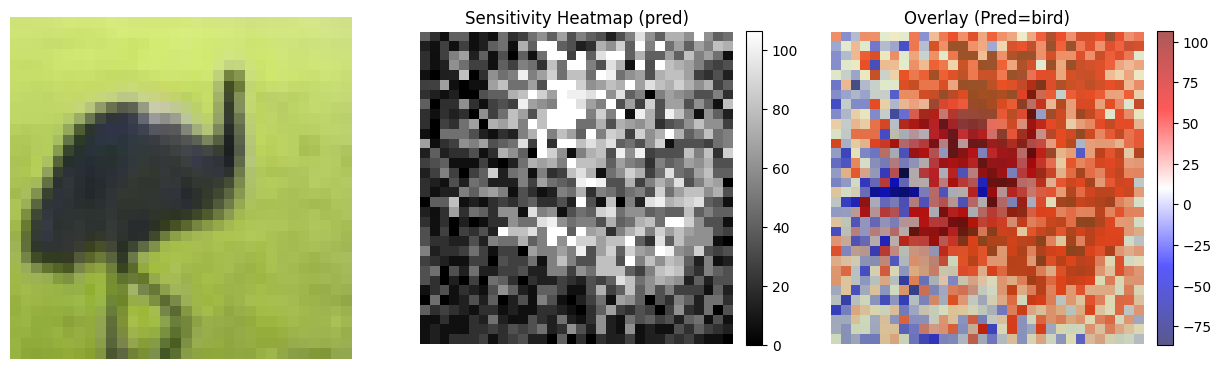

0.1 0.1


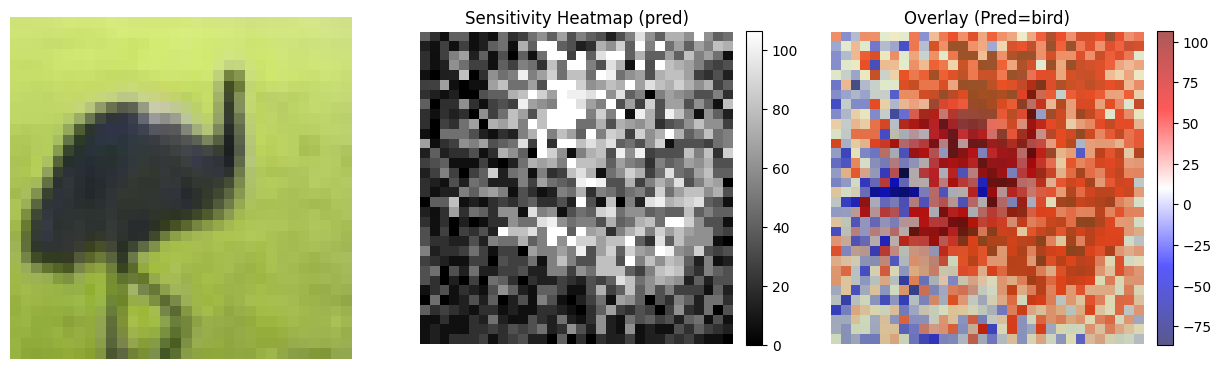

0.1 0.15


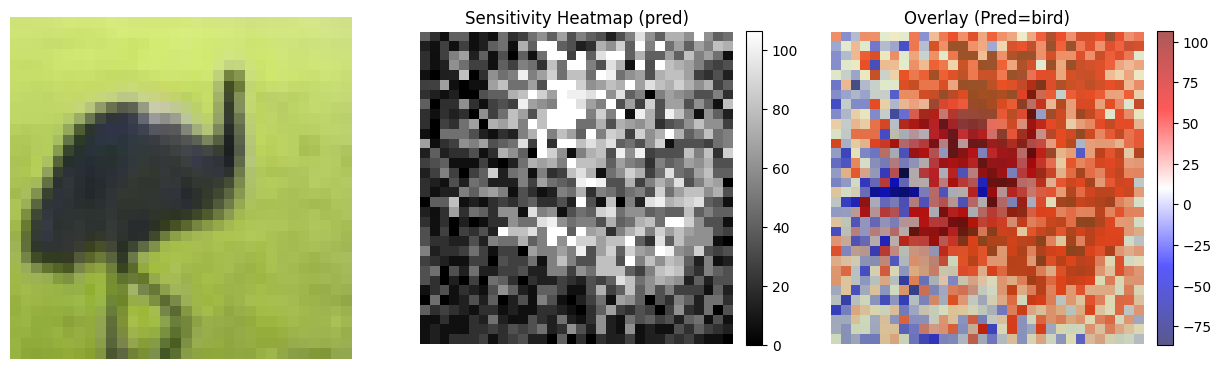

0.1 0.2


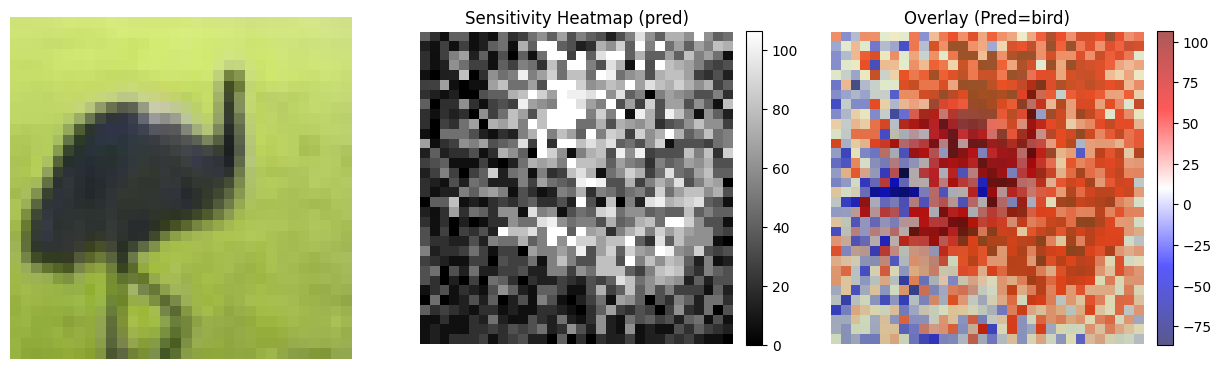

0.3 0.01


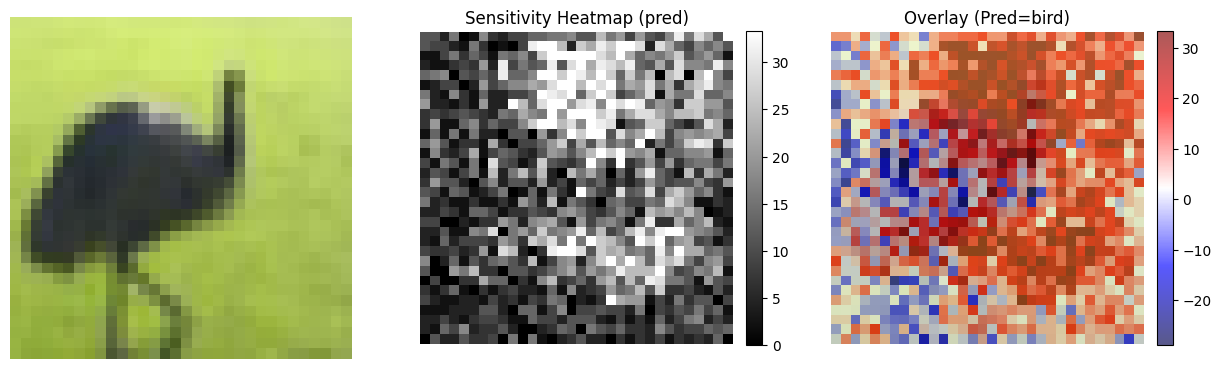

0.3 0.05


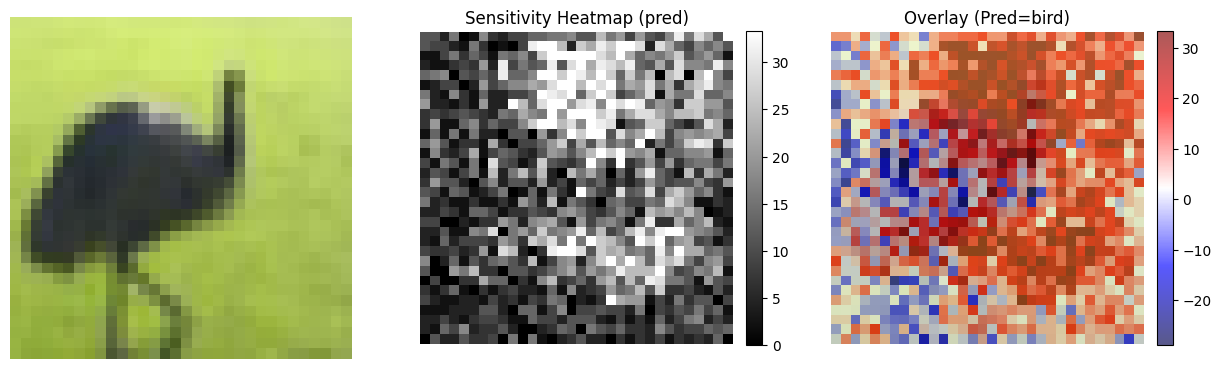

0.3 0.1


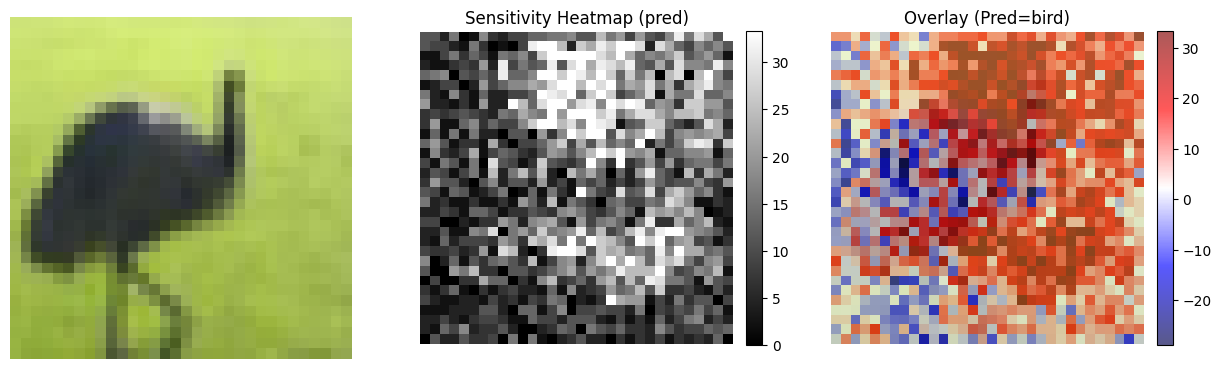

0.3 0.15


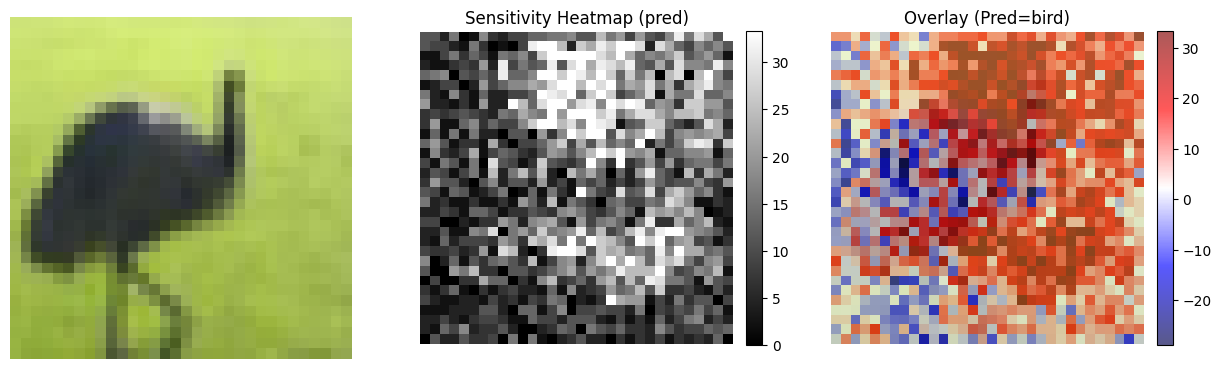

0.3 0.2


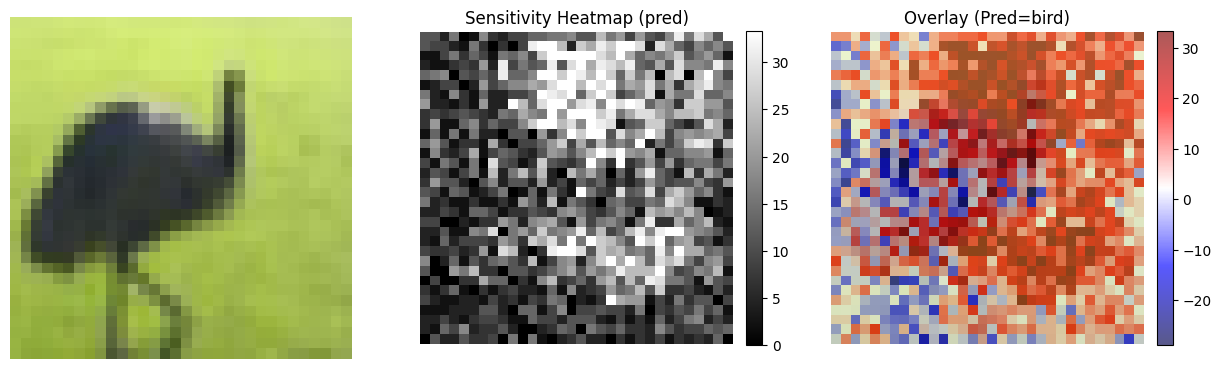

0.5 0.01


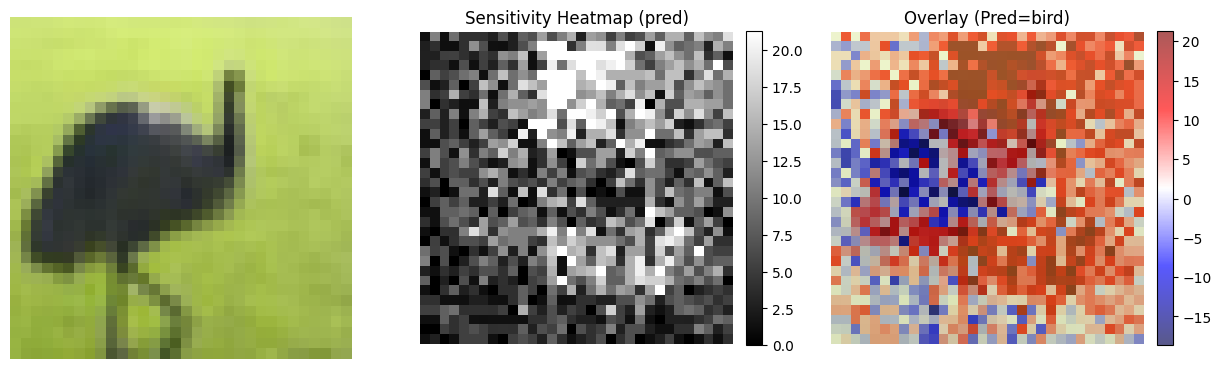

0.5 0.05


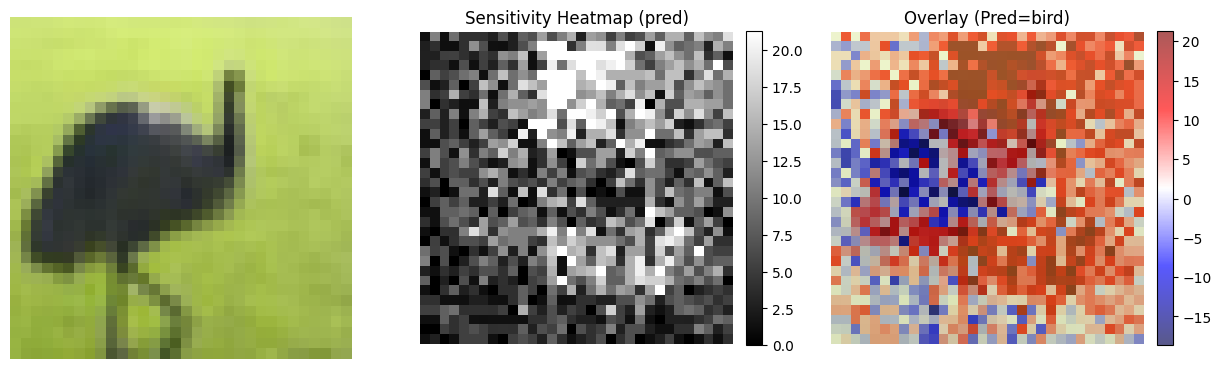

0.5 0.1


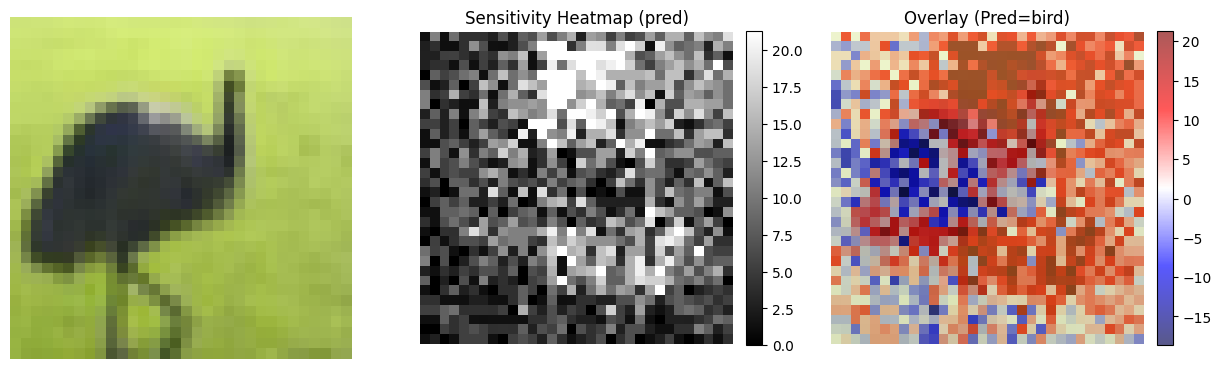

0.5 0.15


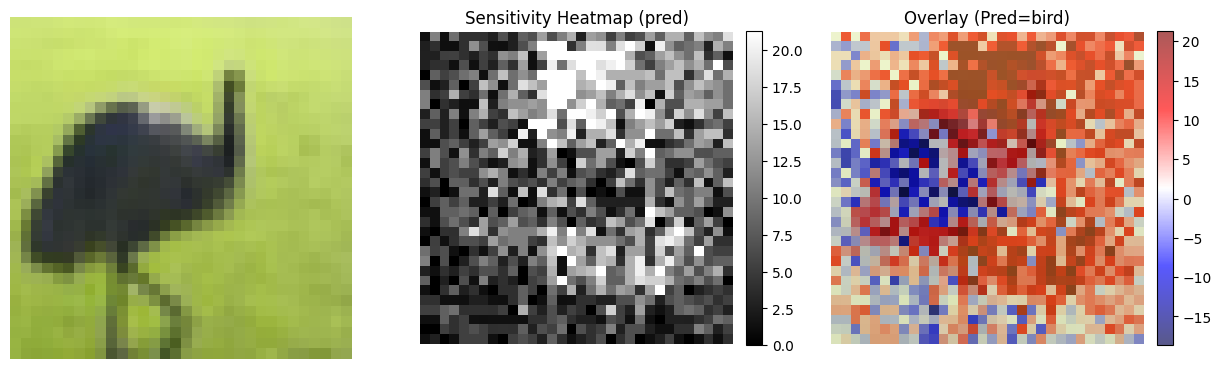

0.5 0.2


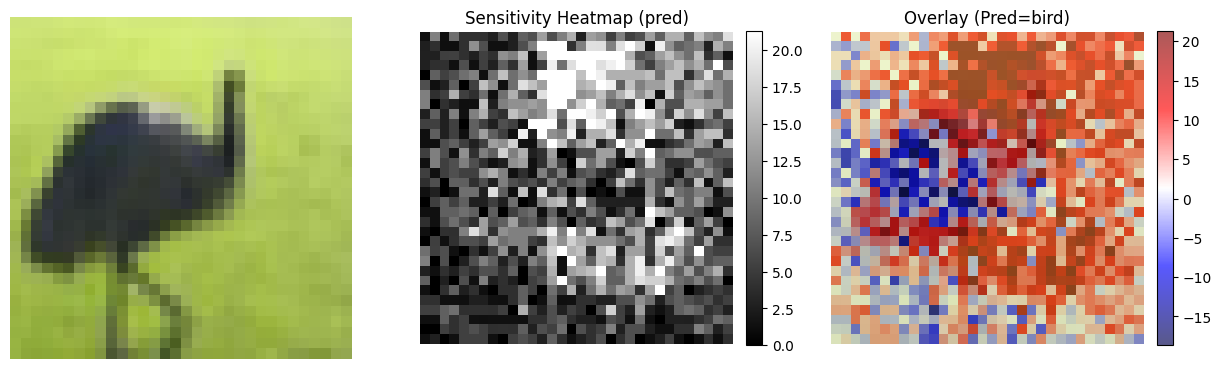

1.0 0.01


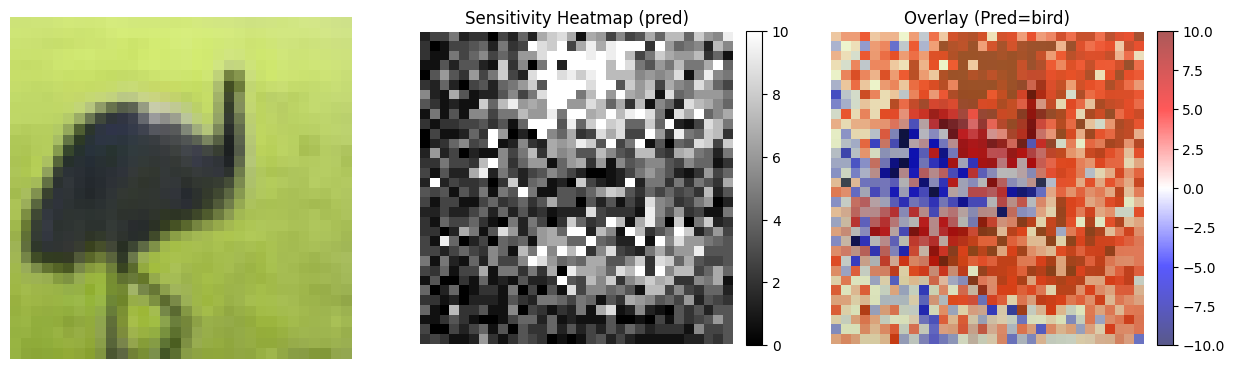

1.0 0.05


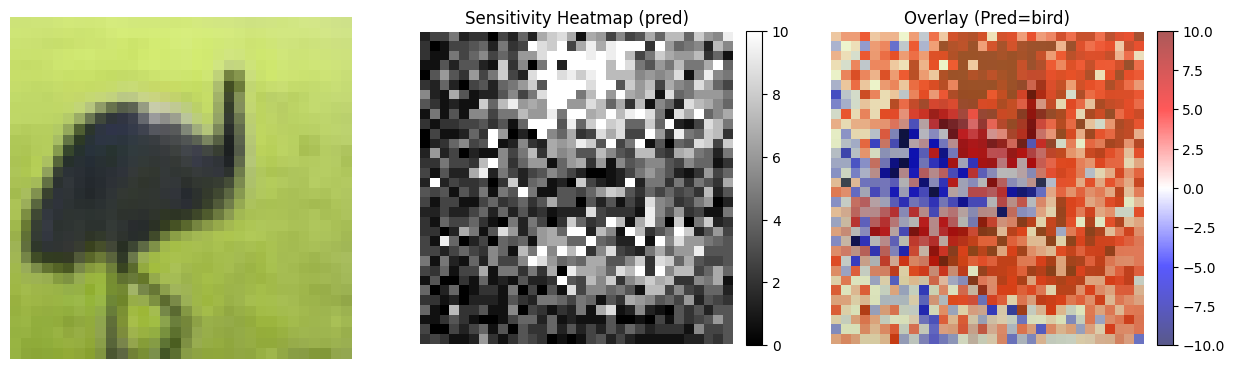

1.0 0.1


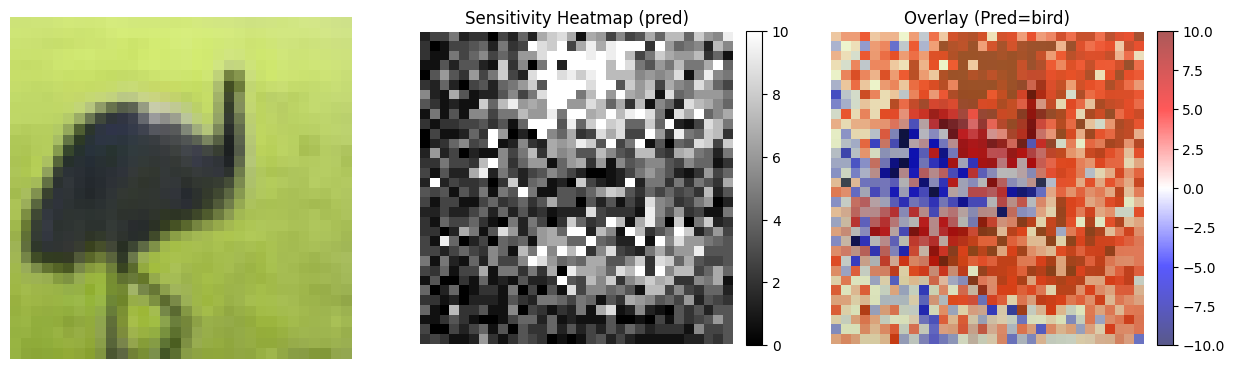

1.0 0.15


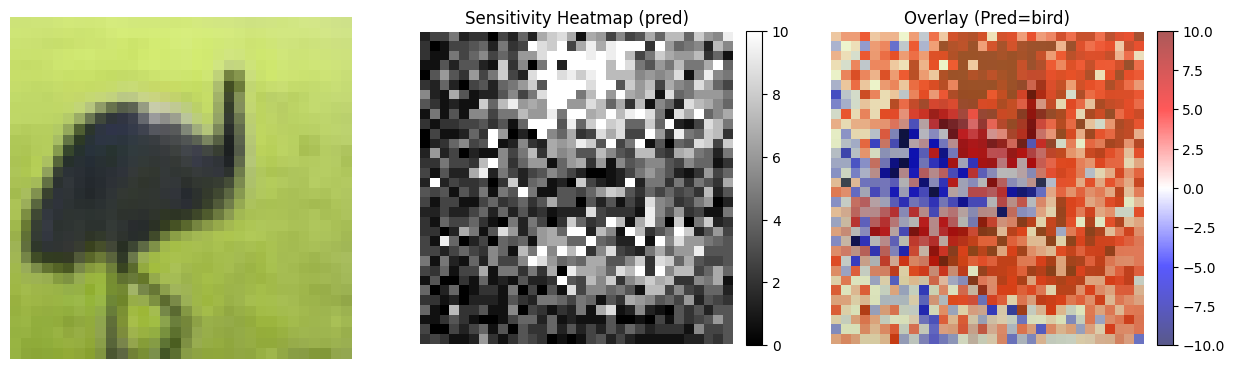

1.0 0.2


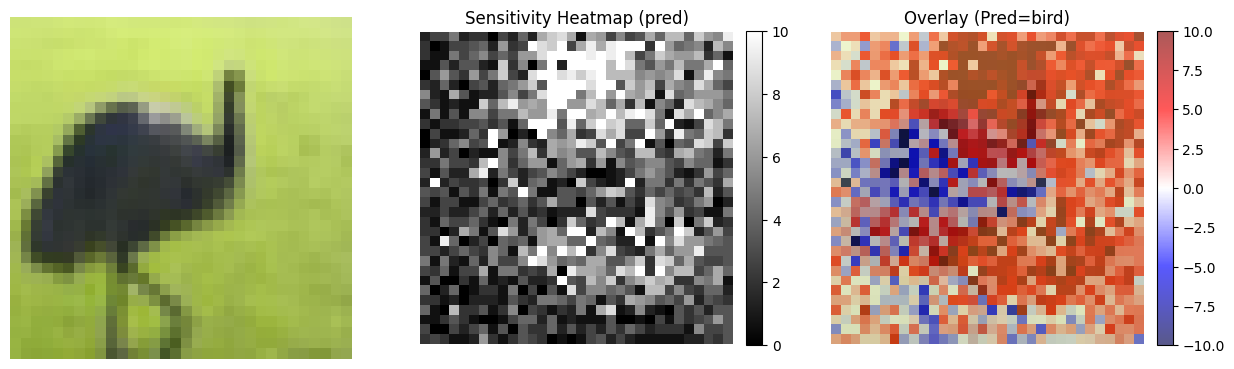

In [5]:

def gaussian_perturbation(img, r0, c0, ch0, delta=0.05, sigma=1.0):
    """
    在 (ch0, r0, c0) 為中心，加一個 Gaussian-shaped bump。
    sigma 控制 Gaussian 的擴散程度。
    """
    C, H, W = img.shape
    device = img.device

    yy, xx = torch.meshgrid(
        torch.arange(H, device=device),
        torch.arange(W, device=device),
        indexing="ij"
    )
    dist2 = (yy - r0) ** 2 + (xx - c0) ** 2
    # Gaussian kernel (center=1)
    kernel = torch.exp(- dist2 / (2 * sigma**2))

    img_mod = img.clone()
    img_mod[ch0] = torch.clamp(img_mod[ch0] + delta * kernel, 0.0, 1.0)

    return img_mod


def gaussian_sensitivity_map(img, delta=0.05, sigma=1.0, mode="avg", batch_size=128):
    """
    mode = "avg"  -> 所有 class 取絕對值後平均
    mode = "pred" -> 只看目前模型預測 class
    """
    H, W = img.shape[1], img.shape[2]

    # baseline
    x_orig = normalize(img).unsqueeze(0).to(device)
    acts_orig, _ = get_activations(model, x_orig)
    y_orig = acts_orig["fc"][0]
    pred_class = torch.argmax(y_orig).item()

    # 準備所有 pixel+channel 的 Gaussian perturbations
    perturbed_imgs = []
    coords = []
    for r in range(H):
        for c in range(W):
            for ch in range(3):
                img_mod = gaussian_perturbation(img, r, c, ch, delta=delta, sigma=sigma)
                perturbed_imgs.append(normalize(img_mod).unsqueeze(0))
                coords.append((r, c, ch))

    perturbed_imgs = torch.cat(perturbed_imgs).to(device)

    # forward in batches
    scores = []
    with torch.no_grad():
        for i in range(0, len(perturbed_imgs), batch_size):
            batch = perturbed_imgs[i:i+batch_size]
            acts_mod, _ = get_activations(model, batch)
            y_mod = acts_mod["fc"]  # shape [B, num_classes]
            dy = (y_mod - y_orig.unsqueeze(0)) / delta  # [B, num_classes]

            if mode == "avg":
                score = dy.abs().mean(dim=1)  # [B]
            elif mode == "pred":
                score = dy[:, pred_class]      # [B]
            else:
                raise ValueError("mode must be 'avg' or 'pred'")
            scores.append(score.cpu())

    scores = torch.cat(scores)  # [Npixels*3]

    # 聚合回 HxW，對 channel 取平均
    sensitivity_map = torch.zeros((H, W))
    count = torch.zeros((H, W))
    for (r, c, ch), s in zip(coords, scores):
        sensitivity_map[r, c] += s.item()
        count[r, c] += 1
    sensitivity_map /= count

    return sensitivity_map, pred_class

def visualize_sensitivity(img, sens_map, pred_class=None, mode="avg",thr=95):
    fig, ax = plt.subplots(1, 3, figsize=(15,5))

    sens_map_disp = sens_map.clone()

    # optional normalize
    threshold = np.percentile(np.abs(sens_map_disp),thr)
    sens_map_disp = np.clip(sens_map_disp, -threshold, threshold)
        
    
    ax[0].imshow(tensor_to_img(img))
    ax[0].axis("off")
    
    
    # Heatmap
    im1 = ax[1].imshow(sens_map_disp.abs().numpy(), cmap="gray")
    ax[1].set_title(f"Sensitivity Heatmap ({mode})")
    fig.colorbar(im1, ax=ax[1], fraction=0.046, pad=0.04)
    ax[1].axis("off")

    # Overlay on original
    img_disp = tensor_to_img(img)
    ax[2].imshow(img_disp)
    im2 = ax[2].imshow(sens_map_disp.numpy(), cmap="seismic", alpha=0.65)
    ax[2].set_title(f"Overlay (Pred={CIFAR10_CLASSES[pred_class]})")
    fig.colorbar(im2, ax=ax[2], fraction=0.046, pad=0.04)
    ax[2].axis("off")

    
    plt.show()

delta = [0.0001,0.0005,0.0007,0.001, 0.005, 0.01, 0.015, 0.02, 0.03, 0.1, 0.3, 0.5, 1.0]
sigma = [0.01, 0.05, 0.1, 0.15,0.2]
for d in delta:
    for s in sigma:
        print(d, s)
        sens_map_avg, pred_class = gaussian_sensitivity_map(img_raw, delta=d, mode="avg",sigma=s)
        # sens_map_avg = normalize_map(sens_map_avg, method="linear")
    
        visualize_sensitivity(img_raw, sens_map_avg, pred_class, mode="avg")

for d in delta:
    for s in sigma:
        print(d, s)
        sens_map_avg, pred_class = gaussian_sensitivity_map(img_raw, delta=d, mode="pred",sigma=s)
        # sens_map_avg = normalize_map(sens_map_avg, method="linear")
        visualize_sensitivity(img_raw, sens_map_avg, pred_class, mode="pred")
